In [1]:
import sys
sys.path.append("..")
from functions.functions import *

# Preprocessing

In [2]:
X_train, X_test, X_val, y_train, y_test, y_val = preprocess(file_paths)

# Feature Selection

In [3]:
# Selected features 
selected_features = ['minimum_nights', 
                     'number_of_reviews', 
                     'reviews_per_month', 
                     'calculated_host_listings_count', 
                     'availability_365',
                     'Host Response Rate', 
                     'Accommodates', 
                     'Bathrooms', 
                     'Bedrooms', 
                     'Beds', 
                     'Square Feet',
                     'recency_last_review' ,
                     'last_review_day', 
                     'last_review_month', 
                     'last_review_year', 
                     'room_type_Entire home/apt', 
                     'room_type_Private room', 
                     'room_type_Shared room',
                     'mean_target_neighbourhood',
                     'mean_target_neighbourhood_group',
                     'neighbourhood_group_Bronx', 
                     'neighbourhood_group_Brooklyn',
                     'neighbourhood_group_Manhattan',
                     'neighbourhood_group_Queens',
                     'neighbourhood_group_Staten Island',
                     'x', 
                     'y', 
                     'z',
                     'text_encoding_tsne_1',
                     'text_encoding_tsne_2']


# Prepare feature matrices
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_val_selected = X_val[selected_features]

X_train_np = X_train_selected.to_numpy()
X_test_np = X_test_selected.to_numpy()
X_val_np = X_val_selected.to_numpy()

scaler = MinMaxScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)
X_val_np = scaler.transform(X_val_np)

y_train_np = y_train.to_numpy().flatten()
y_test_np = y_test.to_numpy().flatten()
y_val_np = y_val.to_numpy().flatten()

X_test_selected.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Host Response Rate,Accommodates,Bathrooms,Bedrooms,Beds,...,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,x,y,z,text_encoding_tsne_1,text_encoding_tsne_2
27357,3,4,2.45,1,23,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208824,-0.728089,0.652900,-7.517027,-0.076676
17998,1,35,2.75,10,156,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208893,-0.728482,0.652440,-7.517027,-0.076676
11703,3,16,0.62,4,37,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209660,-0.728891,0.651737,-7.517027,-0.076676
25026,1,0,0.00,10,284,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,0,1,0,0,0.208956,-0.727793,0.653188,-7.517027,-0.076676
31283,1,0,0.00,1,43,-2.0,-2.0,-2.0,-2.0,-2.0,...,0,1,0,0,0,0.209579,-0.728689,0.651989,-7.517027,-0.076676


# Cat Boost Regressor

Learning rate set to 0.067355
0:	learn: 91.7605854	total: 149ms	remaining: 2m 29s
1:	learn: 89.3638973	total: 153ms	remaining: 1m 16s
2:	learn: 87.1891708	total: 157ms	remaining: 52s
3:	learn: 85.1956994	total: 160ms	remaining: 39.9s
4:	learn: 83.5323695	total: 164ms	remaining: 32.6s
5:	learn: 81.8993219	total: 167ms	remaining: 27.7s
6:	learn: 80.4195847	total: 171ms	remaining: 24.3s
7:	learn: 79.0868587	total: 175ms	remaining: 21.7s
8:	learn: 77.9114969	total: 179ms	remaining: 19.7s
9:	learn: 76.9432728	total: 183ms	remaining: 18.1s
10:	learn: 75.9689935	total: 186ms	remaining: 16.8s
11:	learn: 75.1117670	total: 190ms	remaining: 15.6s
12:	learn: 74.3392753	total: 194ms	remaining: 14.7s
13:	learn: 73.7060995	total: 199ms	remaining: 14s
14:	learn: 73.1148305	total: 204ms	remaining: 13.4s
15:	learn: 72.5324978	total: 208ms	remaining: 12.8s
16:	learn: 72.0291957	total: 212ms	remaining: 12.3s
17:	learn: 71.5326593	total: 216ms	remaining: 11.8s
18:	learn: 71.1044678	total: 220ms	remaining: 

184:	learn: 62.7268534	total: 799ms	remaining: 3.52s
185:	learn: 62.7186110	total: 803ms	remaining: 3.51s
186:	learn: 62.6981744	total: 807ms	remaining: 3.51s
187:	learn: 62.6844770	total: 811ms	remaining: 3.5s
188:	learn: 62.6602441	total: 815ms	remaining: 3.5s
189:	learn: 62.6411714	total: 819ms	remaining: 3.49s
190:	learn: 62.6264798	total: 823ms	remaining: 3.48s
191:	learn: 62.6084744	total: 827ms	remaining: 3.48s
192:	learn: 62.5849137	total: 831ms	remaining: 3.47s
193:	learn: 62.5664052	total: 834ms	remaining: 3.46s
194:	learn: 62.5459562	total: 838ms	remaining: 3.46s
195:	learn: 62.5282278	total: 842ms	remaining: 3.45s
196:	learn: 62.5235179	total: 845ms	remaining: 3.44s
197:	learn: 62.5144932	total: 849ms	remaining: 3.44s
198:	learn: 62.5011210	total: 852ms	remaining: 3.43s
199:	learn: 62.4923700	total: 856ms	remaining: 3.42s
200:	learn: 62.4689411	total: 860ms	remaining: 3.42s
201:	learn: 62.4537658	total: 863ms	remaining: 3.41s
202:	learn: 62.4340674	total: 867ms	remaining: 3

344:	learn: 60.3318764	total: 1.39s	remaining: 2.64s
345:	learn: 60.3254822	total: 1.39s	remaining: 2.63s
346:	learn: 60.3059893	total: 1.4s	remaining: 2.63s
347:	learn: 60.2889021	total: 1.4s	remaining: 2.63s
348:	learn: 60.2714619	total: 1.41s	remaining: 2.62s
349:	learn: 60.2592073	total: 1.41s	remaining: 2.62s
350:	learn: 60.2498928	total: 1.41s	remaining: 2.61s
351:	learn: 60.2432835	total: 1.42s	remaining: 2.61s
352:	learn: 60.2360971	total: 1.42s	remaining: 2.6s
353:	learn: 60.2235537	total: 1.42s	remaining: 2.6s
354:	learn: 60.2120998	total: 1.43s	remaining: 2.59s
355:	learn: 60.2033205	total: 1.43s	remaining: 2.59s
356:	learn: 60.1972789	total: 1.43s	remaining: 2.58s
357:	learn: 60.1785262	total: 1.44s	remaining: 2.58s
358:	learn: 60.1608199	total: 1.44s	remaining: 2.57s
359:	learn: 60.1473904	total: 1.44s	remaining: 2.57s
360:	learn: 60.1356758	total: 1.45s	remaining: 2.56s
361:	learn: 60.1255468	total: 1.45s	remaining: 2.56s
362:	learn: 60.1144919	total: 1.45s	remaining: 2.5

518:	learn: 58.4895981	total: 1.98s	remaining: 1.84s
519:	learn: 58.4893268	total: 1.99s	remaining: 1.83s
520:	learn: 58.4744462	total: 1.99s	remaining: 1.83s
521:	learn: 58.4652795	total: 1.99s	remaining: 1.83s
522:	learn: 58.4544016	total: 2s	remaining: 1.82s
523:	learn: 58.4496972	total: 2s	remaining: 1.82s
524:	learn: 58.4380836	total: 2.01s	remaining: 1.81s
525:	learn: 58.4284166	total: 2.01s	remaining: 1.81s
526:	learn: 58.4250865	total: 2.01s	remaining: 1.81s
527:	learn: 58.4226740	total: 2.02s	remaining: 1.8s
528:	learn: 58.4142464	total: 2.02s	remaining: 1.8s
529:	learn: 58.4054666	total: 2.02s	remaining: 1.79s
530:	learn: 58.4023409	total: 2.03s	remaining: 1.79s
531:	learn: 58.3974509	total: 2.03s	remaining: 1.79s
532:	learn: 58.3839799	total: 2.04s	remaining: 1.78s
533:	learn: 58.3745302	total: 2.04s	remaining: 1.78s
534:	learn: 58.3703546	total: 2.04s	remaining: 1.77s
535:	learn: 58.3512351	total: 2.04s	remaining: 1.77s
536:	learn: 58.3441854	total: 2.05s	remaining: 1.77s
5

688:	learn: 57.0612713	total: 2.58s	remaining: 1.16s
689:	learn: 57.0458538	total: 2.58s	remaining: 1.16s
690:	learn: 57.0362773	total: 2.59s	remaining: 1.16s
691:	learn: 57.0294197	total: 2.6s	remaining: 1.16s
692:	learn: 57.0215978	total: 2.6s	remaining: 1.15s
693:	learn: 57.0156661	total: 2.61s	remaining: 1.15s
694:	learn: 57.0066375	total: 2.61s	remaining: 1.15s
695:	learn: 57.0061484	total: 2.61s	remaining: 1.14s
696:	learn: 56.9965570	total: 2.62s	remaining: 1.14s
697:	learn: 56.9860019	total: 2.62s	remaining: 1.13s
698:	learn: 56.9766234	total: 2.62s	remaining: 1.13s
699:	learn: 56.9744910	total: 2.63s	remaining: 1.13s
700:	learn: 56.9734311	total: 2.63s	remaining: 1.12s
701:	learn: 56.9659006	total: 2.63s	remaining: 1.12s
702:	learn: 56.9583653	total: 2.64s	remaining: 1.11s
703:	learn: 56.9382371	total: 2.64s	remaining: 1.11s
704:	learn: 56.9292213	total: 2.65s	remaining: 1.11s
705:	learn: 56.9168317	total: 2.65s	remaining: 1.1s
706:	learn: 56.9082814	total: 2.65s	remaining: 1.

846:	learn: 55.8747296	total: 3.17s	remaining: 572ms
847:	learn: 55.8687054	total: 3.17s	remaining: 569ms
848:	learn: 55.8659509	total: 3.17s	remaining: 565ms
849:	learn: 55.8631690	total: 3.18s	remaining: 561ms
850:	learn: 55.8577718	total: 3.18s	remaining: 558ms
851:	learn: 55.8495610	total: 3.19s	remaining: 554ms
852:	learn: 55.8418408	total: 3.19s	remaining: 550ms
853:	learn: 55.8329451	total: 3.2s	remaining: 546ms
854:	learn: 55.8321956	total: 3.2s	remaining: 543ms
855:	learn: 55.8295972	total: 3.2s	remaining: 539ms
856:	learn: 55.8221830	total: 3.21s	remaining: 535ms
857:	learn: 55.8150741	total: 3.21s	remaining: 531ms
858:	learn: 55.8088024	total: 3.21s	remaining: 528ms
859:	learn: 55.8057673	total: 3.22s	remaining: 524ms
860:	learn: 55.7963629	total: 3.22s	remaining: 520ms
861:	learn: 55.7823561	total: 3.23s	remaining: 516ms
862:	learn: 55.7775425	total: 3.23s	remaining: 513ms
863:	learn: 55.7717437	total: 3.23s	remaining: 509ms
864:	learn: 55.7623592	total: 3.24s	remaining: 50

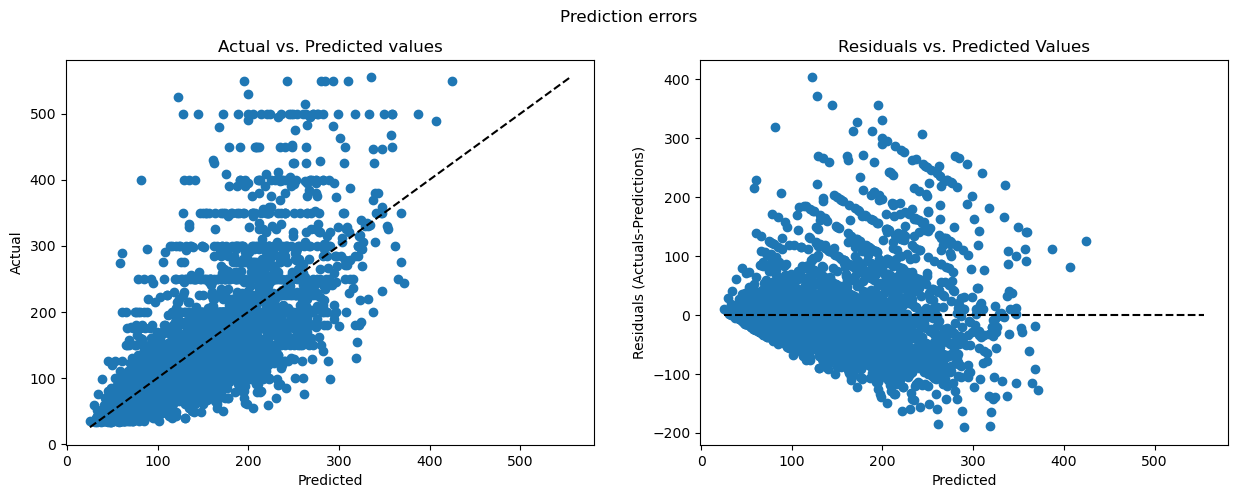

R²: 0.5620429781308558
MAE: 41.15665366457717
MSE: 3918.078408436913
RMSE: 62.594555741189765
MAPE: 0.31942780210790833
error_ratio_rmse: 0.45256880986483805
error_ratio_mae: 0.297569294109395


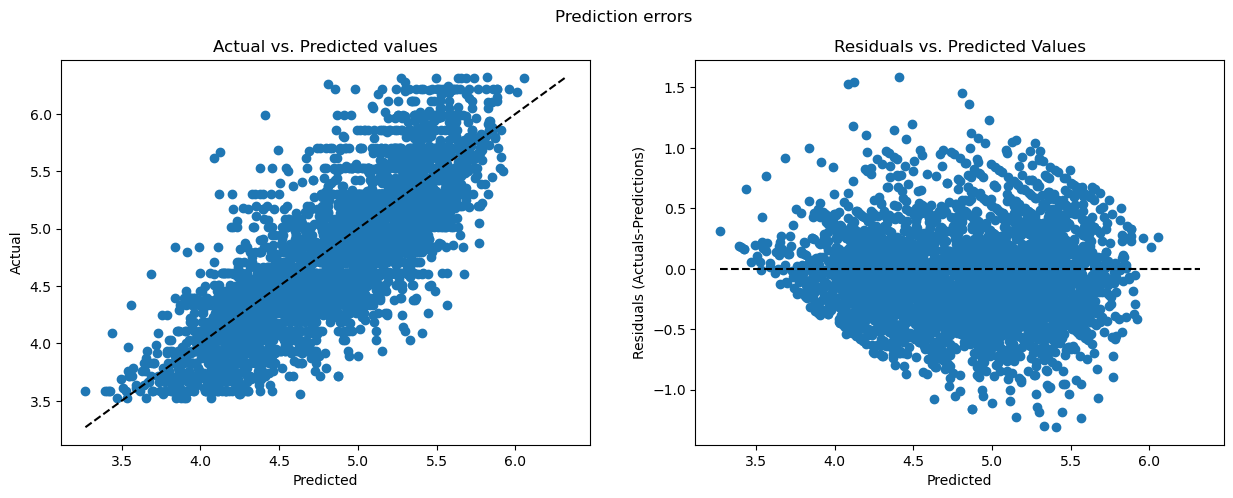

R²: 0.649451171405085
MAE: 0.28737757848534257
MSE: 0.1362339236135736
RMSE: 0.3690987992578323
MAPE: 0.061716577760620804
error_ratio_rmse: 0.07789972437228555
error_ratio_mae: 0.06065214571219713


In [4]:
model_init = CatBoostRegressor(loss_function = "RMSE").fit(X_train_np, y_train_np)
y_pred = np.maximum(0,model_init.predict(X_test_np))

# score for price
model_init_score=scores(y_test_np,y_pred,plot= True)

# score for log_price
model_init_logscore=scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

#### Model Tuning

In [8]:
space={'depth': hp.quniform("depth", 3, 10, 1),
        'l2_leaf_reg' : hp.quniform('l2_leaf_reg', 0,280,1),
        'model_size_reg' : hp.uniform('model_size_reg', 0,150),
        'learning_rate' : hp.uniform('learning_rate', 0.001,0.1),
        'colsample_bylevel' : hp.uniform('colsample_bylevel', 0.5,1),
        'subsample' : hp.uniform('subsample', 0.5,1),
        'min_child_samples' : hp.quniform('min_child_samples', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 10, 400, 1),
        'random_seed': hp.quniform('random_seed', 0, 400, 1),
    }


def objective(space):
    mod=CatBoostRegressor(**space)
    
    mod.fit(X_train_np, y_train_np)

    y_pred = mod.predict(X_test_np)
    score = scores(y_test_np, y_pred)['RMSE']
    print ("SCORE:", score)

    return {'loss': score, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]0:	learn: 93.3217718	total: 3.94ms	remaining: 422ms
1:	learn: 92.2655705	total: 7.68ms	remaining: 407ms
2:	learn: 91.2152955	total: 11.8ms	remaining: 414ms
3:	learn: 90.1992006	total: 15.5ms	remaining: 404ms
4:	learn: 89.2828225	total: 19.3ms	remaining: 397ms
5:	learn: 88.3948836	total: 22.6ms	remaining: 384ms
6:	learn: 87.5170926	total: 26ms	remaining: 375ms
7:	learn: 86.7010561	total: 29ms	remaining: 363ms
8:	learn: 85.9141992	total: 32.3ms	remaining: 355ms
9:	learn: 85.1340264	total: 35.5ms	remaining: 348ms
10:	learn: 84.3941842	total: 38.3ms	remaining: 338ms
11:	learn: 83.7646701	total: 41.5ms	remaining: 332ms
12:	learn: 83.1376430	total: 44.6ms	remaining: 326ms
13:	learn: 82.5087986	total: 48ms	remaining: 322ms
14:	learn: 81.9537459	total: 51.1ms	remaining: 317ms
15:	learn: 81.3747143	total: 54ms	remaining: 310ms
16:	learn: 80.8548340	total: 57.1ms	remaining: 306m

27:	learn: 69.0526209	total: 161ms	remaining: 241ms
28:	learn: 68.9458128	total: 167ms	remaining: 236ms
29:	learn: 68.7699051	total: 173ms	remaining: 231ms
30:	learn: 68.6291452	total: 180ms	remaining: 226ms
31:	learn: 68.4687147	total: 186ms	remaining: 221ms
32:	learn: 68.3681733	total: 191ms	remaining: 214ms
33:	learn: 68.2519429	total: 197ms	remaining: 209ms
34:	learn: 68.1569994	total: 203ms	remaining: 203ms
35:	learn: 68.1383250	total: 227ms	remaining: 215ms
36:	learn: 68.0821951	total: 241ms	remaining: 215ms
37:	learn: 68.0190641	total: 252ms	remaining: 212ms
38:	learn: 67.9419594	total: 261ms	remaining: 207ms
39:	learn: 67.8450707	total: 268ms	remaining: 201ms
40:	learn: 67.8184651	total: 274ms	remaining: 194ms
41:	learn: 67.7488798	total: 280ms	remaining: 187ms
42:	learn: 67.7401849	total: 286ms	remaining: 180ms
43:	learn: 67.6670813	total: 292ms	remaining: 172ms
44:	learn: 67.5615955	total: 297ms	remaining: 165ms
45:	learn: 67.5359772	total: 302ms	remaining: 158ms
46:	learn: 6

8:	learn: 81.4749701	total: 32.2ms	remaining: 526ms
9:	learn: 80.5289397	total: 35.8ms	remaining: 522ms
10:	learn: 79.6892111	total: 39.4ms	remaining: 519ms
11:	learn: 78.8715671	total: 43ms	remaining: 516ms
12:	learn: 78.1657549	total: 46.6ms	remaining: 512ms
13:	learn: 77.4561000	total: 50ms	remaining: 508ms
14:	learn: 76.7826682	total: 53.3ms	remaining: 501ms
15:	learn: 76.2218568	total: 56.8ms	remaining: 497ms
16:	learn: 75.6601670	total: 59.8ms	remaining: 489ms
17:	learn: 75.1986047	total: 63.6ms	remaining: 487ms
18:	learn: 74.7739807	total: 67.3ms	remaining: 486ms
19:	learn: 74.3606974	total: 71.3ms	remaining: 485ms
20:	learn: 73.9676579	total: 74.5ms	remaining: 479ms
21:	learn: 73.6206007	total: 77.6ms	remaining: 473ms
22:	learn: 73.3231166	total: 81.1ms	remaining: 469ms
23:	learn: 73.0416649	total: 84.2ms	remaining: 463ms
24:	learn: 72.7787882	total: 87.5ms	remaining: 459ms
25:	learn: 72.4927340	total: 90.9ms	remaining: 454ms
26:	learn: 72.1777433	total: 94.1ms	remaining: 450ms

RMSE: 66.28791950837804                                                                                                
MAPE: 0.3521262939494749                                                                                               
error_ratio_rmse: 0.4792724300874255                                                                                   
error_ratio_mae: 0.3194017745495348                                                                                    
SCORE:                                                                                                                 
66.28791950837804                                                                                                      
  4%|█▉                                               | 4/100 [00:02<00:51,  1.88trial/s, best loss: 66.28791950837804]0:	learn: 94.0973580	total: 4.06ms	remaining: 780ms
1:	learn: 93.7291793	total: 7.78ms	remaining: 743ms
2:	learn: 93.3442636	total: 11.7ms	remaining: 741ms
3:	le

168:	learn: 70.9039014	total: 727ms	remaining: 103ms
169:	learn: 70.8715344	total: 731ms	remaining: 98.9ms
170:	learn: 70.8379277	total: 736ms	remaining: 94.7ms
171:	learn: 70.8067317	total: 740ms	remaining: 90.4ms
172:	learn: 70.7697850	total: 745ms	remaining: 86.2ms
173:	learn: 70.7392805	total: 750ms	remaining: 81.8ms
174:	learn: 70.7057429	total: 754ms	remaining: 77.6ms
175:	learn: 70.6774513	total: 760ms	remaining: 73.4ms
176:	learn: 70.6444570	total: 764ms	remaining: 69.1ms
177:	learn: 70.6116763	total: 769ms	remaining: 64.8ms
178:	learn: 70.5778929	total: 773ms	remaining: 60.5ms
179:	learn: 70.5460264	total: 779ms	remaining: 56.3ms
180:	learn: 70.5195819	total: 784ms	remaining: 52ms
181:	learn: 70.4905645	total: 789ms	remaining: 47.7ms
182:	learn: 70.4612994	total: 794ms	remaining: 43.4ms
183:	learn: 70.4332297	total: 798ms	remaining: 39.1ms
184:	learn: 70.3984064	total: 804ms	remaining: 34.7ms
185:	learn: 70.3740581	total: 809ms	remaining: 30.4ms
186:	learn: 70.3470663	total: 8

24:	learn: 88.6215515	total: 132ms	remaining: 1.54s
25:	learn: 88.4168882	total: 138ms	remaining: 1.53s
26:	learn: 88.2119031	total: 142ms	remaining: 1.51s
27:	learn: 88.0090942	total: 146ms	remaining: 1.5s
28:	learn: 87.8139417	total: 151ms	remaining: 1.49s
29:	learn: 87.6122009	total: 156ms	remaining: 1.48s
30:	learn: 87.4116412	total: 160ms	remaining: 1.46s
31:	learn: 87.2137372	total: 164ms	remaining: 1.45s
32:	learn: 87.0207783	total: 168ms	remaining: 1.44s
33:	learn: 86.8311699	total: 172ms	remaining: 1.42s
34:	learn: 86.6447036	total: 177ms	remaining: 1.42s
35:	learn: 86.4584897	total: 182ms	remaining: 1.41s
36:	learn: 86.2725567	total: 186ms	remaining: 1.39s
37:	learn: 86.0919587	total: 191ms	remaining: 1.39s
38:	learn: 85.9176817	total: 195ms	remaining: 1.38s
39:	learn: 85.7405829	total: 198ms	remaining: 1.36s
40:	learn: 85.5655908	total: 202ms	remaining: 1.35s
41:	learn: 85.3953155	total: 207ms	remaining: 1.34s
42:	learn: 85.2241758	total: 211ms	remaining: 1.33s
43:	learn: 85

187:	learn: 72.1463259	total: 818ms	remaining: 553ms
188:	learn: 72.1117316	total: 822ms	remaining: 548ms
189:	learn: 72.0711674	total: 827ms	remaining: 544ms
190:	learn: 72.0310382	total: 833ms	remaining: 541ms
191:	learn: 71.9896645	total: 837ms	remaining: 536ms
192:	learn: 71.9519317	total: 841ms	remaining: 531ms
193:	learn: 71.9125268	total: 844ms	remaining: 527ms
194:	learn: 71.8723348	total: 849ms	remaining: 523ms
195:	learn: 71.8364786	total: 853ms	remaining: 518ms
196:	learn: 71.7974725	total: 858ms	remaining: 514ms
197:	learn: 71.7588004	total: 863ms	remaining: 510ms
198:	learn: 71.7226318	total: 868ms	remaining: 506ms
199:	learn: 71.6847627	total: 871ms	remaining: 501ms
200:	learn: 71.6516201	total: 875ms	remaining: 497ms
201:	learn: 71.6141076	total: 879ms	remaining: 492ms
202:	learn: 71.5764314	total: 884ms	remaining: 488ms
203:	learn: 71.5390321	total: 888ms	remaining: 483ms
204:	learn: 71.5022252	total: 893ms	remaining: 479ms
205:	learn: 71.4693402	total: 896ms	remaining:

17:	learn: 70.4045623	total: 69.8ms	remaining: 206ms
18:	learn: 70.0904588	total: 74ms	remaining: 203ms
19:	learn: 69.8347502	total: 77.7ms	remaining: 198ms
20:	learn: 69.5894459	total: 81.8ms	remaining: 195ms
21:	learn: 69.3603546	total: 86.5ms	remaining: 193ms
22:	learn: 69.1306018	total: 91.1ms	remaining: 190ms
23:	learn: 68.9211200	total: 95.3ms	remaining: 187ms
24:	learn: 68.7218052	total: 99.8ms	remaining: 184ms
25:	learn: 68.5490866	total: 104ms	remaining: 181ms
26:	learn: 68.4082261	total: 108ms	remaining: 176ms
27:	learn: 68.2521213	total: 112ms	remaining: 173ms
28:	learn: 68.1284106	total: 117ms	remaining: 169ms
29:	learn: 68.0174406	total: 121ms	remaining: 165ms
30:	learn: 67.8594085	total: 125ms	remaining: 162ms
31:	learn: 67.7445861	total: 129ms	remaining: 158ms
32:	learn: 67.6468867	total: 133ms	remaining: 154ms
33:	learn: 67.5347657	total: 138ms	remaining: 150ms
34:	learn: 67.4387761	total: 143ms	remaining: 147ms
35:	learn: 67.3634938	total: 147ms	remaining: 143ms
36:	le

81:	learn: 66.2445314	total: 309ms	remaining: 830ms
82:	learn: 66.2219743	total: 313ms	remaining: 827ms
83:	learn: 66.1976083	total: 318ms	remaining: 824ms
84:	learn: 66.1810462	total: 321ms	remaining: 819ms
85:	learn: 66.1525386	total: 326ms	remaining: 819ms
86:	learn: 66.1105084	total: 330ms	remaining: 814ms
87:	learn: 66.0786103	total: 334ms	remaining: 812ms
88:	learn: 66.0577685	total: 339ms	remaining: 810ms
89:	learn: 66.0404019	total: 343ms	remaining: 808ms
90:	learn: 66.0101197	total: 347ms	remaining: 806ms
91:	learn: 65.9836969	total: 352ms	remaining: 804ms
92:	learn: 65.9507897	total: 356ms	remaining: 799ms
93:	learn: 65.9248773	total: 359ms	remaining: 795ms
94:	learn: 65.8798096	total: 364ms	remaining: 792ms
95:	learn: 65.8743618	total: 368ms	remaining: 789ms
96:	learn: 65.8441695	total: 372ms	remaining: 786ms
97:	learn: 65.8301517	total: 376ms	remaining: 782ms
98:	learn: 65.8215793	total: 379ms	remaining: 778ms
99:	learn: 65.8008337	total: 383ms	remaining: 774ms
100:	learn: 

246:	learn: 64.0015853	total: 915ms	remaining: 204ms
247:	learn: 63.9872497	total: 919ms	remaining: 200ms
248:	learn: 63.9868113	total: 922ms	remaining: 196ms
249:	learn: 63.9708816	total: 926ms	remaining: 193ms
250:	learn: 63.9648780	total: 930ms	remaining: 189ms
251:	learn: 63.9638694	total: 933ms	remaining: 185ms
252:	learn: 63.9509020	total: 937ms	remaining: 181ms
253:	learn: 63.9501119	total: 940ms	remaining: 178ms
254:	learn: 63.9389775	total: 944ms	remaining: 174ms
255:	learn: 63.9378576	total: 947ms	remaining: 170ms
256:	learn: 63.9317902	total: 951ms	remaining: 166ms
257:	learn: 63.9151199	total: 954ms	remaining: 163ms
258:	learn: 63.9148075	total: 958ms	remaining: 159ms
259:	learn: 63.9010532	total: 961ms	remaining: 155ms
260:	learn: 63.8902399	total: 965ms	remaining: 152ms
261:	learn: 63.8779277	total: 968ms	remaining: 148ms
262:	learn: 63.8508971	total: 972ms	remaining: 144ms
263:	learn: 63.8374454	total: 976ms	remaining: 140ms
264:	learn: 63.8286662	total: 979ms	remaining:

81:	learn: 69.8566263	total: 708ms	remaining: 2.66s
82:	learn: 69.7911292	total: 717ms	remaining: 2.65s
83:	learn: 69.7197935	total: 725ms	remaining: 2.64s
84:	learn: 69.6480227	total: 733ms	remaining: 2.63s
85:	learn: 69.5738268	total: 741ms	remaining: 2.62s
86:	learn: 69.5045619	total: 750ms	remaining: 2.61s
87:	learn: 69.4394278	total: 759ms	remaining: 2.6s
88:	learn: 69.3752934	total: 767ms	remaining: 2.59s
89:	learn: 69.3181821	total: 775ms	remaining: 2.58s
90:	learn: 69.2598842	total: 784ms	remaining: 2.58s
91:	learn: 69.1999928	total: 792ms	remaining: 2.56s
92:	learn: 69.1409604	total: 810ms	remaining: 2.59s
93:	learn: 69.0901101	total: 818ms	remaining: 2.58s
94:	learn: 69.0312590	total: 826ms	remaining: 2.56s
95:	learn: 68.9743672	total: 834ms	remaining: 2.55s
96:	learn: 68.9185368	total: 843ms	remaining: 2.54s
97:	learn: 68.8674672	total: 851ms	remaining: 2.54s
98:	learn: 68.8041503	total: 860ms	remaining: 2.53s
99:	learn: 68.7463484	total: 869ms	remaining: 2.52s
100:	learn: 6

247:	learn: 65.7588541	total: 2.08s	remaining: 1.19s
248:	learn: 65.7559228	total: 2.09s	remaining: 1.18s
249:	learn: 65.7490578	total: 2.1s	remaining: 1.18s
250:	learn: 65.7477436	total: 2.11s	remaining: 1.17s
251:	learn: 65.7399182	total: 2.12s	remaining: 1.16s
252:	learn: 65.7288022	total: 2.12s	remaining: 1.15s
253:	learn: 65.7221739	total: 2.13s	remaining: 1.14s
254:	learn: 65.7136766	total: 2.14s	remaining: 1.13s
255:	learn: 65.7092070	total: 2.15s	remaining: 1.12s
256:	learn: 65.6967685	total: 2.15s	remaining: 1.11s
257:	learn: 65.6889883	total: 2.17s	remaining: 1.11s
258:	learn: 65.6805372	total: 2.17s	remaining: 1.1s
259:	learn: 65.6788858	total: 2.18s	remaining: 1.09s
260:	learn: 65.6739109	total: 2.19s	remaining: 1.08s
261:	learn: 65.6675126	total: 2.2s	remaining: 1.07s
262:	learn: 65.6629671	total: 2.21s	remaining: 1.06s
263:	learn: 65.6497072	total: 2.21s	remaining: 1.06s
264:	learn: 65.6372917	total: 2.22s	remaining: 1.05s
265:	learn: 65.6329416	total: 2.23s	remaining: 1.

error_ratio_rmse: 0.47406564482221                                                                                     
error_ratio_mae: 0.3149288253621229                                                                                    
SCORE:                                                                                                                 
65.56777175755695                                                                                                      
 10%|████▊                                           | 10/100 [00:09<02:33,  1.71s/trial, best loss: 64.65695619934137]0:	learn: 94.2898621	total: 5.59ms	remaining: 1.23s
1:	learn: 94.1084717	total: 11.6ms	remaining: 1.27s
2:	learn: 93.9264866	total: 17.7ms	remaining: 1.28s
3:	learn: 93.7475347	total: 24.3ms	remaining: 1.32s
4:	learn: 93.5660660	total: 29.7ms	remaining: 1.28s
5:	learn: 93.3923180	total: 36.3ms	remaining: 1.3s
6:	learn: 93.2202277	total: 41.8ms	remaining: 1.28s
7:	learn: 93.0442566	total: 48ms	remai

150:	learn: 77.2169261	total: 938ms	remaining: 435ms
151:	learn: 77.1548998	total: 944ms	remaining: 428ms
152:	learn: 77.0886125	total: 951ms	remaining: 423ms
153:	learn: 77.0268902	total: 959ms	remaining: 417ms
154:	learn: 76.9621301	total: 966ms	remaining: 411ms
155:	learn: 76.8960556	total: 973ms	remaining: 405ms
156:	learn: 76.8352185	total: 979ms	remaining: 399ms
157:	learn: 76.7714779	total: 985ms	remaining: 393ms
158:	learn: 76.7094525	total: 992ms	remaining: 387ms
159:	learn: 76.6466961	total: 999ms	remaining: 381ms
160:	learn: 76.5832716	total: 1.01s	remaining: 375ms
161:	learn: 76.5215563	total: 1.01s	remaining: 369ms
162:	learn: 76.4617658	total: 1.02s	remaining: 364ms
163:	learn: 76.4004486	total: 1.03s	remaining: 358ms
164:	learn: 76.3389000	total: 1.04s	remaining: 352ms
165:	learn: 76.2777746	total: 1.04s	remaining: 346ms
166:	learn: 76.2250683	total: 1.05s	remaining: 340ms
167:	learn: 76.1702801	total: 1.06s	remaining: 334ms
168:	learn: 76.1107409	total: 1.07s	remaining:

65:	learn: 77.3068342	total: 718ms	remaining: 1.99s
66:	learn: 77.1593326	total: 731ms	remaining: 1.99s
67:	learn: 77.0074100	total: 744ms	remaining: 1.98s
68:	learn: 76.8673971	total: 756ms	remaining: 1.97s
69:	learn: 76.7302111	total: 770ms	remaining: 1.97s
70:	learn: 76.5886258	total: 783ms	remaining: 1.96s
71:	learn: 76.4460865	total: 792ms	remaining: 1.95s
72:	learn: 76.3082766	total: 803ms	remaining: 1.94s
73:	learn: 76.1809414	total: 817ms	remaining: 1.93s
74:	learn: 76.0632718	total: 832ms	remaining: 1.93s
75:	learn: 75.9387362	total: 845ms	remaining: 1.92s
76:	learn: 75.8142797	total: 858ms	remaining: 1.92s
77:	learn: 75.7039658	total: 870ms	remaining: 1.91s
78:	learn: 75.5753550	total: 883ms	remaining: 1.9s
79:	learn: 75.4590232	total: 897ms	remaining: 1.89s
80:	learn: 75.3375721	total: 908ms	remaining: 1.88s
81:	learn: 75.2324609	total: 920ms	remaining: 1.87s
82:	learn: 75.1204596	total: 934ms	remaining: 1.87s
83:	learn: 75.0021002	total: 947ms	remaining: 1.86s
84:	learn: 74

222:	learn: 68.1065113	total: 2.48s	remaining: 289ms
223:	learn: 68.0826638	total: 2.49s	remaining: 278ms
224:	learn: 68.0641729	total: 2.5s	remaining: 267ms
225:	learn: 68.0416573	total: 2.51s	remaining: 256ms
226:	learn: 68.0250963	total: 2.52s	remaining: 245ms
227:	learn: 68.0057314	total: 2.54s	remaining: 234ms
228:	learn: 67.9894528	total: 2.55s	remaining: 222ms
229:	learn: 67.9696762	total: 2.56s	remaining: 211ms
230:	learn: 67.9500937	total: 2.57s	remaining: 200ms
231:	learn: 67.9263160	total: 2.58s	remaining: 189ms
232:	learn: 67.9097350	total: 2.59s	remaining: 178ms
233:	learn: 67.8937077	total: 2.6s	remaining: 167ms
234:	learn: 67.8737599	total: 2.61s	remaining: 156ms
235:	learn: 67.8690992	total: 2.62s	remaining: 144ms
236:	learn: 67.8510670	total: 2.63s	remaining: 133ms
237:	learn: 67.8311617	total: 2.65s	remaining: 122ms
238:	learn: 67.8168452	total: 2.66s	remaining: 111ms
239:	learn: 67.7967524	total: 2.67s	remaining: 100ms
240:	learn: 67.7829703	total: 2.68s	remaining: 8

136:	learn: 67.2173920	total: 791ms	remaining: 1.38s
137:	learn: 67.1914450	total: 797ms	remaining: 1.38s
138:	learn: 67.1820668	total: 801ms	remaining: 1.37s
139:	learn: 67.1436773	total: 806ms	remaining: 1.36s
140:	learn: 67.1155684	total: 812ms	remaining: 1.36s
141:	learn: 67.0924831	total: 818ms	remaining: 1.35s
142:	learn: 67.0879141	total: 823ms	remaining: 1.35s
143:	learn: 67.0641613	total: 829ms	remaining: 1.34s
144:	learn: 67.0465886	total: 835ms	remaining: 1.33s
145:	learn: 67.0249184	total: 841ms	remaining: 1.33s
146:	learn: 67.0201189	total: 847ms	remaining: 1.32s
147:	learn: 67.0169305	total: 853ms	remaining: 1.32s
148:	learn: 67.0099038	total: 858ms	remaining: 1.31s
149:	learn: 66.9803547	total: 864ms	remaining: 1.31s
150:	learn: 66.9732384	total: 869ms	remaining: 1.3s
151:	learn: 66.9590498	total: 875ms	remaining: 1.29s
152:	learn: 66.9553480	total: 881ms	remaining: 1.29s
153:	learn: 66.9286857	total: 887ms	remaining: 1.28s
154:	learn: 66.9147918	total: 893ms	remaining: 

312:	learn: 65.5105016	total: 1.77s	remaining: 362ms
313:	learn: 65.5047062	total: 1.78s	remaining: 357ms
314:	learn: 65.4967153	total: 1.78s	remaining: 351ms
315:	learn: 65.4828429	total: 1.8s	remaining: 347ms
316:	learn: 65.4664629	total: 1.8s	remaining: 342ms
317:	learn: 65.4644131	total: 1.81s	remaining: 336ms
318:	learn: 65.4486825	total: 1.82s	remaining: 330ms
319:	learn: 65.4464782	total: 1.82s	remaining: 325ms
320:	learn: 65.4388904	total: 1.83s	remaining: 319ms
321:	learn: 65.4210515	total: 1.83s	remaining: 313ms
322:	learn: 65.4200919	total: 1.84s	remaining: 308ms
323:	learn: 65.4069777	total: 1.84s	remaining: 302ms
324:	learn: 65.4010685	total: 1.85s	remaining: 296ms
325:	learn: 65.4008242	total: 1.86s	remaining: 291ms
326:	learn: 65.3853904	total: 1.86s	remaining: 285ms
327:	learn: 65.3848079	total: 1.87s	remaining: 279ms
328:	learn: 65.3799723	total: 1.88s	remaining: 274ms
329:	learn: 65.3752289	total: 1.88s	remaining: 268ms
330:	learn: 65.3582784	total: 1.89s	remaining: 2

74:	learn: 68.6584550	total: 173ms	remaining: 57.6ms
75:	learn: 68.6280412	total: 175ms	remaining: 55.4ms
76:	learn: 68.5819703	total: 177ms	remaining: 53ms
77:	learn: 68.5584946	total: 180ms	remaining: 50.7ms
78:	learn: 68.5268517	total: 182ms	remaining: 48.4ms
79:	learn: 68.4718157	total: 185ms	remaining: 46.2ms
80:	learn: 68.4206820	total: 187ms	remaining: 43.8ms
81:	learn: 68.3831621	total: 189ms	remaining: 41.6ms
82:	learn: 68.3406107	total: 192ms	remaining: 39.3ms
83:	learn: 68.3006491	total: 194ms	remaining: 37ms
84:	learn: 68.2816854	total: 196ms	remaining: 34.7ms
85:	learn: 68.2496379	total: 199ms	remaining: 32.3ms
86:	learn: 68.2224728	total: 201ms	remaining: 30.1ms
87:	learn: 68.1772292	total: 204ms	remaining: 27.8ms
88:	learn: 68.1406104	total: 206ms	remaining: 25.5ms
89:	learn: 68.1073749	total: 209ms	remaining: 23.2ms
90:	learn: 68.0822707	total: 211ms	remaining: 20.9ms
91:	learn: 68.0657046	total: 214ms	remaining: 18.6ms
92:	learn: 68.0522261	total: 216ms	remaining: 16.3

113:	learn: 66.4982887	total: 344ms	remaining: 526ms
114:	learn: 66.4887683	total: 348ms	remaining: 523ms
115:	learn: 66.4537998	total: 351ms	remaining: 520ms
116:	learn: 66.4292284	total: 354ms	remaining: 517ms
117:	learn: 66.4018295	total: 357ms	remaining: 514ms
118:	learn: 66.3965511	total: 360ms	remaining: 511ms
119:	learn: 66.3952767	total: 363ms	remaining: 508ms
120:	learn: 66.3859576	total: 365ms	remaining: 504ms
121:	learn: 66.3854174	total: 368ms	remaining: 501ms
122:	learn: 66.3553498	total: 371ms	remaining: 497ms
123:	learn: 66.3511556	total: 374ms	remaining: 494ms
124:	learn: 66.3293626	total: 377ms	remaining: 491ms
125:	learn: 66.3285283	total: 380ms	remaining: 488ms
126:	learn: 66.3258214	total: 382ms	remaining: 485ms
127:	learn: 66.3212660	total: 385ms	remaining: 481ms
128:	learn: 66.3205662	total: 388ms	remaining: 478ms
129:	learn: 66.3165252	total: 391ms	remaining: 475ms
130:	learn: 66.3145109	total: 394ms	remaining: 472ms
131:	learn: 66.3013300	total: 397ms	remaining:

279:	learn: 64.8883257	total: 813ms	remaining: 23.2ms
280:	learn: 64.8880480	total: 816ms	remaining: 20.3ms
281:	learn: 64.8799205	total: 818ms	remaining: 17.4ms
282:	learn: 64.8795762	total: 821ms	remaining: 14.5ms
283:	learn: 64.8734162	total: 824ms	remaining: 11.6ms
284:	learn: 64.8731200	total: 827ms	remaining: 8.71ms
285:	learn: 64.8644077	total: 830ms	remaining: 5.8ms
286:	learn: 64.8601356	total: 833ms	remaining: 2.9ms
287:	learn: 64.8526425	total: 836ms	remaining: 0us
R²: 0.5211208653332435                                                                                                 
MAE: 43.5704154852978                                                                                                  
MSE: 4284.178364765163                                                                                                 
RMSE: 65.4536352295666                                                                                                 
MAPE: 0.3434308176063102               

43:	learn: 68.5283883	total: 203ms	remaining: 272ms
44:	learn: 68.4641974	total: 207ms	remaining: 266ms
45:	learn: 68.3776806	total: 210ms	remaining: 260ms
46:	learn: 68.3399830	total: 213ms	remaining: 254ms
47:	learn: 68.2528042	total: 216ms	remaining: 248ms
48:	learn: 68.1772348	total: 220ms	remaining: 242ms
49:	learn: 68.1378334	total: 223ms	remaining: 236ms
50:	learn: 68.1211638	total: 227ms	remaining: 231ms
51:	learn: 68.0502733	total: 230ms	remaining: 225ms
52:	learn: 67.9767104	total: 233ms	remaining: 220ms
53:	learn: 67.9180090	total: 236ms	remaining: 214ms
54:	learn: 67.8620293	total: 240ms	remaining: 209ms
55:	learn: 67.7957309	total: 243ms	remaining: 204ms
56:	learn: 67.7869487	total: 247ms	remaining: 199ms
57:	learn: 67.7734784	total: 250ms	remaining: 194ms
58:	learn: 67.7651837	total: 253ms	remaining: 189ms
59:	learn: 67.7508952	total: 257ms	remaining: 184ms
60:	learn: 67.6970923	total: 260ms	remaining: 179ms
61:	learn: 67.6529254	total: 264ms	remaining: 175ms
62:	learn: 6

80:	learn: 67.5669694	total: 706ms	remaining: 2.46s
81:	learn: 67.5138829	total: 713ms	remaining: 2.44s
82:	learn: 67.4655096	total: 721ms	remaining: 2.43s
83:	learn: 67.4057134	total: 729ms	remaining: 2.42s
84:	learn: 67.3567424	total: 737ms	remaining: 2.41s
85:	learn: 67.3101692	total: 745ms	remaining: 2.4s
86:	learn: 67.2610086	total: 752ms	remaining: 2.39s
87:	learn: 67.2267980	total: 760ms	remaining: 2.37s
88:	learn: 67.1915524	total: 769ms	remaining: 2.37s
89:	learn: 67.1452939	total: 776ms	remaining: 2.35s
90:	learn: 67.1019328	total: 783ms	remaining: 2.34s
91:	learn: 67.0564530	total: 790ms	remaining: 2.33s
92:	learn: 67.0179353	total: 800ms	remaining: 2.32s
93:	learn: 66.9735067	total: 808ms	remaining: 2.31s
94:	learn: 66.9326719	total: 816ms	remaining: 2.3s
95:	learn: 66.9053177	total: 823ms	remaining: 2.29s
96:	learn: 66.8724663	total: 830ms	remaining: 2.28s
97:	learn: 66.8272310	total: 837ms	remaining: 2.26s
98:	learn: 66.8085274	total: 845ms	remaining: 2.25s
99:	learn: 66.

241:	learn: 64.5600003	total: 2.08s	remaining: 1.04s
242:	learn: 64.5440959	total: 2.09s	remaining: 1.03s
243:	learn: 64.5378105	total: 2.1s	remaining: 1.02s
244:	learn: 64.5374209	total: 2.1s	remaining: 1.01s
245:	learn: 64.5331801	total: 2.11s	remaining: 1s
246:	learn: 64.5284355	total: 2.12s	remaining: 997ms
247:	learn: 64.5234019	total: 2.13s	remaining: 989ms
248:	learn: 64.5098295	total: 2.14s	remaining: 981ms
249:	learn: 64.5054374	total: 2.15s	remaining: 973ms
250:	learn: 64.4905925	total: 2.16s	remaining: 965ms
251:	learn: 64.4793451	total: 2.17s	remaining: 957ms
252:	learn: 64.4704771	total: 2.18s	remaining: 949ms
253:	learn: 64.4541152	total: 2.19s	remaining: 941ms
254:	learn: 64.4374221	total: 2.2s	remaining: 932ms
255:	learn: 64.4215227	total: 2.21s	remaining: 923ms
256:	learn: 64.4128304	total: 2.22s	remaining: 915ms
257:	learn: 64.3979782	total: 2.23s	remaining: 906ms
258:	learn: 64.3884859	total: 2.23s	remaining: 898ms
259:	learn: 64.3881873	total: 2.24s	remaining: 889ms

15:	learn: 73.7454939	total: 147ms	remaining: 697ms
16:	learn: 73.2720288	total: 155ms	remaining: 684ms
17:	learn: 72.7798520	total: 164ms	remaining: 675ms
18:	learn: 72.3925306	total: 173ms	remaining: 663ms
19:	learn: 72.0378835	total: 181ms	remaining: 652ms
20:	learn: 71.7095892	total: 190ms	remaining: 643ms
21:	learn: 71.3782202	total: 199ms	remaining: 633ms
22:	learn: 71.1178878	total: 208ms	remaining: 623ms
23:	learn: 70.8326156	total: 216ms	remaining: 612ms
24:	learn: 70.5613874	total: 226ms	remaining: 606ms
25:	learn: 70.3436284	total: 235ms	remaining: 596ms
26:	learn: 70.1345451	total: 244ms	remaining: 588ms
27:	learn: 69.9633900	total: 250ms	remaining: 570ms
28:	learn: 69.7956961	total: 258ms	remaining: 561ms
29:	learn: 69.6165916	total: 266ms	remaining: 549ms
30:	learn: 69.4482354	total: 275ms	remaining: 542ms
31:	learn: 69.2950485	total: 283ms	remaining: 531ms
32:	learn: 69.1534841	total: 291ms	remaining: 520ms
33:	learn: 69.0236441	total: 299ms	remaining: 510ms
34:	learn: 6

64:	learn: 68.8344556	total: 422ms	remaining: 279ms
65:	learn: 68.7815864	total: 428ms	remaining: 273ms
66:	learn: 68.7169421	total: 435ms	remaining: 266ms
67:	learn: 68.6601708	total: 440ms	remaining: 259ms
68:	learn: 68.6281452	total: 446ms	remaining: 252ms
69:	learn: 68.5727162	total: 452ms	remaining: 246ms
70:	learn: 68.5155998	total: 459ms	remaining: 239ms
71:	learn: 68.4625881	total: 465ms	remaining: 233ms
72:	learn: 68.4129152	total: 472ms	remaining: 226ms
73:	learn: 68.3683510	total: 478ms	remaining: 220ms
74:	learn: 68.3219760	total: 484ms	remaining: 213ms
75:	learn: 68.2882245	total: 490ms	remaining: 206ms
76:	learn: 68.2300932	total: 497ms	remaining: 200ms
77:	learn: 68.1747048	total: 503ms	remaining: 193ms
78:	learn: 68.1308427	total: 509ms	remaining: 187ms
79:	learn: 68.1227051	total: 515ms	remaining: 180ms
80:	learn: 68.0823669	total: 521ms	remaining: 174ms
81:	learn: 68.0328107	total: 527ms	remaining: 167ms
82:	learn: 68.0220663	total: 533ms	remaining: 161ms
83:	learn: 6

93:	learn: 63.4574318	total: 2.14s	remaining: 5.68s
94:	learn: 63.4219939	total: 2.16s	remaining: 5.66s
95:	learn: 63.3874205	total: 2.18s	remaining: 5.64s
96:	learn: 63.3531579	total: 2.2s	remaining: 5.61s
97:	learn: 63.3219858	total: 2.23s	remaining: 5.59s
98:	learn: 63.2820959	total: 2.25s	remaining: 5.56s
99:	learn: 63.2309186	total: 2.27s	remaining: 5.54s
100:	learn: 63.2118362	total: 2.29s	remaining: 5.52s
101:	learn: 63.1781645	total: 2.32s	remaining: 5.5s
102:	learn: 63.1408618	total: 2.34s	remaining: 5.48s
103:	learn: 63.1207841	total: 2.37s	remaining: 5.46s
104:	learn: 63.0972343	total: 2.39s	remaining: 5.44s
105:	learn: 63.0784641	total: 2.41s	remaining: 5.42s
106:	learn: 63.0499594	total: 2.44s	remaining: 5.4s
107:	learn: 63.0256655	total: 2.46s	remaining: 5.38s
108:	learn: 63.0125173	total: 2.48s	remaining: 5.35s
109:	learn: 62.9683169	total: 2.51s	remaining: 5.33s
110:	learn: 62.9371059	total: 2.53s	remaining: 5.31s
111:	learn: 62.9054086	total: 2.56s	remaining: 5.29s
112

251:	learn: 59.7664942	total: 5.6s	remaining: 2.04s
252:	learn: 59.7657297	total: 5.63s	remaining: 2.02s
253:	learn: 59.7436471	total: 5.65s	remaining: 2s
254:	learn: 59.7411254	total: 5.68s	remaining: 1.98s
255:	learn: 59.7170356	total: 5.7s	remaining: 1.96s
256:	learn: 59.6946670	total: 5.72s	remaining: 1.94s
257:	learn: 59.6862191	total: 5.75s	remaining: 1.92s
258:	learn: 59.6746655	total: 5.77s	remaining: 1.89s
259:	learn: 59.6663084	total: 5.79s	remaining: 1.87s
260:	learn: 59.6620337	total: 5.82s	remaining: 1.85s
261:	learn: 59.6393603	total: 5.84s	remaining: 1.83s
262:	learn: 59.6385528	total: 5.87s	remaining: 1.81s
263:	learn: 59.6363412	total: 5.89s	remaining: 1.78s
264:	learn: 59.6344832	total: 5.92s	remaining: 1.76s
265:	learn: 59.6088146	total: 5.94s	remaining: 1.74s
266:	learn: 59.5747003	total: 5.96s	remaining: 1.72s
267:	learn: 59.5729526	total: 5.97s	remaining: 1.69s
268:	learn: 59.5716522	total: 5.99s	remaining: 1.67s
269:	learn: 59.5709283	total: 6.01s	remaining: 1.65

43:	learn: 65.3074557	total: 663ms	remaining: 4s
44:	learn: 65.2588942	total: 671ms	remaining: 3.94s
45:	learn: 65.1687530	total: 683ms	remaining: 3.91s
46:	learn: 65.0773674	total: 697ms	remaining: 3.89s
47:	learn: 64.9857187	total: 712ms	remaining: 3.87s
48:	learn: 64.9069202	total: 726ms	remaining: 3.85s
49:	learn: 64.8050078	total: 739ms	remaining: 3.83s
50:	learn: 64.6700457	total: 751ms	remaining: 3.8s
51:	learn: 64.5993438	total: 762ms	remaining: 3.77s
52:	learn: 64.4739480	total: 776ms	remaining: 3.75s
53:	learn: 64.4027597	total: 789ms	remaining: 3.73s
54:	learn: 64.3007517	total: 800ms	remaining: 3.69s
55:	learn: 64.2384741	total: 814ms	remaining: 3.67s
56:	learn: 64.1735661	total: 825ms	remaining: 3.65s
57:	learn: 64.0924563	total: 839ms	remaining: 3.63s
58:	learn: 64.0179899	total: 852ms	remaining: 3.61s
59:	learn: 63.9639776	total: 863ms	remaining: 3.58s
60:	learn: 63.9000100	total: 879ms	remaining: 3.57s
61:	learn: 63.8432125	total: 892ms	remaining: 3.55s
62:	learn: 63.77

201:	learn: 59.2982118	total: 2.88s	remaining: 1.52s
202:	learn: 59.2689765	total: 2.9s	remaining: 1.51s
203:	learn: 59.2531887	total: 2.91s	remaining: 1.5s
204:	learn: 59.2268445	total: 2.93s	remaining: 1.49s
205:	learn: 59.2020218	total: 2.94s	remaining: 1.47s
206:	learn: 59.1567334	total: 2.95s	remaining: 1.46s
207:	learn: 59.1217061	total: 2.97s	remaining: 1.44s
208:	learn: 59.0993918	total: 2.98s	remaining: 1.43s
209:	learn: 59.0600334	total: 2.99s	remaining: 1.41s
210:	learn: 59.0404888	total: 3s	remaining: 1.4s
211:	learn: 59.0168004	total: 3.02s	remaining: 1.38s
212:	learn: 58.9900743	total: 3.03s	remaining: 1.36s
213:	learn: 58.9670540	total: 3.04s	remaining: 1.35s
214:	learn: 58.9491299	total: 3.06s	remaining: 1.33s
215:	learn: 58.9079587	total: 3.07s	remaining: 1.32s
216:	learn: 58.8981663	total: 3.08s	remaining: 1.31s
217:	learn: 58.8738572	total: 3.1s	remaining: 1.29s
218:	learn: 58.8572136	total: 3.11s	remaining: 1.28s
219:	learn: 58.8443983	total: 3.12s	remaining: 1.26s


26:	learn: 67.2794752	total: 604ms	remaining: 6.98s
27:	learn: 66.9567381	total: 625ms	remaining: 6.95s
28:	learn: 66.6919781	total: 647ms	remaining: 6.92s
29:	learn: 66.4299353	total: 671ms	remaining: 6.91s
30:	learn: 66.1738176	total: 693ms	remaining: 6.88s
31:	learn: 65.8981703	total: 715ms	remaining: 6.86s
32:	learn: 65.7302533	total: 738ms	remaining: 6.84s
33:	learn: 65.4726222	total: 758ms	remaining: 6.8s
34:	learn: 65.2977003	total: 782ms	remaining: 6.79s
35:	learn: 65.1182890	total: 805ms	remaining: 6.78s
36:	learn: 64.9484532	total: 830ms	remaining: 6.77s
37:	learn: 64.8191830	total: 853ms	remaining: 6.76s
38:	learn: 64.7247393	total: 876ms	remaining: 6.74s
39:	learn: 64.6083564	total: 901ms	remaining: 6.74s
40:	learn: 64.3980558	total: 926ms	remaining: 6.73s
41:	learn: 64.2896939	total: 950ms	remaining: 6.72s
42:	learn: 64.1456453	total: 972ms	remaining: 6.69s
43:	learn: 63.9907937	total: 993ms	remaining: 6.66s
44:	learn: 63.8805268	total: 1.02s	remaining: 6.64s
45:	learn: 63

187:	learn: 56.2367063	total: 4.07s	remaining: 3.27s
188:	learn: 56.1844659	total: 4.1s	remaining: 3.25s
189:	learn: 56.1400024	total: 4.12s	remaining: 3.23s
190:	learn: 56.1070802	total: 4.14s	remaining: 3.21s
191:	learn: 56.0589632	total: 4.16s	remaining: 3.19s
192:	learn: 56.0116934	total: 4.18s	remaining: 3.17s
193:	learn: 55.9325958	total: 4.21s	remaining: 3.14s
194:	learn: 55.8808692	total: 4.23s	remaining: 3.12s
195:	learn: 55.8443342	total: 4.25s	remaining: 3.1s
196:	learn: 55.8043698	total: 4.27s	remaining: 3.08s
197:	learn: 55.7678457	total: 4.29s	remaining: 3.05s
198:	learn: 55.7123414	total: 4.31s	remaining: 3.03s
199:	learn: 55.6396039	total: 4.33s	remaining: 3.01s
200:	learn: 55.5780953	total: 4.35s	remaining: 2.99s
201:	learn: 55.5379755	total: 4.38s	remaining: 2.97s
202:	learn: 55.4490594	total: 4.39s	remaining: 2.94s
203:	learn: 55.4093942	total: 4.42s	remaining: 2.92s
204:	learn: 55.3711692	total: 4.43s	remaining: 2.9s
205:	learn: 55.2935265	total: 4.46s	remaining: 2.

MAE: 40.90479591232284                                                                                                 
MSE: 3893.1037876720716                                                                                                
RMSE: 62.39474166684298                                                                                                
MAPE: 0.3169895341922205                                                                                               
error_ratio_rmse: 0.45112412163675525                                                                                  
error_ratio_mae: 0.29574832163274284                                                                                   
SCORE:                                                                                                                 
62.39474166684298                                                                                                      
 23%|███████████                        

140:	learn: 63.5626433	total: 2.92s	remaining: 2.57s
141:	learn: 63.5418733	total: 2.94s	remaining: 2.55s
142:	learn: 63.5242873	total: 2.96s	remaining: 2.53s
143:	learn: 63.5120638	total: 2.98s	remaining: 2.5s
144:	learn: 63.4907069	total: 3s	remaining: 2.48s
145:	learn: 63.4649172	total: 3.02s	remaining: 2.46s
146:	learn: 63.4475344	total: 3.04s	remaining: 2.44s
147:	learn: 63.4099687	total: 3.07s	remaining: 2.42s
148:	learn: 63.3805474	total: 3.09s	remaining: 2.4s
149:	learn: 63.3529824	total: 3.11s	remaining: 2.38s
150:	learn: 63.3429676	total: 3.13s	remaining: 2.36s
151:	learn: 63.3265206	total: 3.15s	remaining: 2.34s
152:	learn: 63.3085630	total: 3.17s	remaining: 2.32s
153:	learn: 63.2848323	total: 3.19s	remaining: 2.3s
154:	learn: 63.2451829	total: 3.21s	remaining: 2.28s
155:	learn: 63.2316663	total: 3.23s	remaining: 2.26s
156:	learn: 63.2267090	total: 3.25s	remaining: 2.24s
157:	learn: 63.1966491	total: 3.27s	remaining: 2.22s
158:	learn: 63.1879343	total: 3.29s	remaining: 2.2s


12:	learn: 77.8118805	total: 138ms	remaining: 3.35s
13:	learn: 77.0631072	total: 150ms	remaining: 3.36s
14:	learn: 76.4294237	total: 162ms	remaining: 3.39s
15:	learn: 75.8176592	total: 174ms	remaining: 3.4s
16:	learn: 75.3210413	total: 187ms	remaining: 3.42s
17:	learn: 74.8381120	total: 198ms	remaining: 3.41s
18:	learn: 74.3392143	total: 212ms	remaining: 3.45s
19:	learn: 73.8949551	total: 231ms	remaining: 3.56s
20:	learn: 73.4683561	total: 244ms	remaining: 3.56s
21:	learn: 73.0425995	total: 256ms	remaining: 3.56s
22:	learn: 72.6880086	total: 277ms	remaining: 3.67s
23:	learn: 72.3577428	total: 289ms	remaining: 3.66s
24:	learn: 72.0174197	total: 301ms	remaining: 3.65s
25:	learn: 71.7279561	total: 314ms	remaining: 3.64s
26:	learn: 71.4307271	total: 326ms	remaining: 3.63s
27:	learn: 71.1892896	total: 338ms	remaining: 3.62s
28:	learn: 70.9437259	total: 351ms	remaining: 3.62s
29:	learn: 70.7168543	total: 363ms	remaining: 3.61s
30:	learn: 70.4639103	total: 377ms	remaining: 3.61s
31:	learn: 70

183:	learn: 64.6079508	total: 2.3s	remaining: 1.8s
184:	learn: 64.6001206	total: 2.31s	remaining: 1.78s
185:	learn: 64.5975743	total: 2.32s	remaining: 1.77s
186:	learn: 64.5955000	total: 2.33s	remaining: 1.76s
187:	learn: 64.5824181	total: 2.35s	remaining: 1.75s
188:	learn: 64.5755265	total: 2.36s	remaining: 1.73s
189:	learn: 64.5537004	total: 2.37s	remaining: 1.72s
190:	learn: 64.5458443	total: 2.38s	remaining: 1.71s
191:	learn: 64.5424655	total: 2.39s	remaining: 1.69s
192:	learn: 64.5143580	total: 2.4s	remaining: 1.68s
193:	learn: 64.4852273	total: 2.42s	remaining: 1.67s
194:	learn: 64.4714213	total: 2.43s	remaining: 1.66s
195:	learn: 64.4553786	total: 2.44s	remaining: 1.64s
196:	learn: 64.4266578	total: 2.45s	remaining: 1.63s
197:	learn: 64.4090802	total: 2.46s	remaining: 1.62s
198:	learn: 64.4057599	total: 2.48s	remaining: 1.6s
199:	learn: 64.3770418	total: 2.49s	remaining: 1.59s
200:	learn: 64.3736874	total: 2.5s	remaining: 1.58s
201:	learn: 64.3665008	total: 2.51s	remaining: 1.57

MAPE: 0.33522314309223317                                                                                              
error_ratio_rmse: 0.4660022539882234                                                                                   
error_ratio_mae: 0.3083452086054719                                                                                    
SCORE:                                                                                                                 
64.45252838236345                                                                                                      
 25%|████████████                                    | 25/100 [00:53<06:02,  4.84s/trial, best loss: 62.39474166684298]0:	learn: 92.6933078	total: 10.9ms	remaining: 2.95s
1:	learn: 91.0090272	total: 21.2ms	remaining: 2.86s
2:	learn: 89.3955141	total: 31.3ms	remaining: 2.8s
3:	learn: 87.9285562	total: 41.8ms	remaining: 2.8s
4:	learn: 86.5918617	total: 51.4ms	remaining: 2.74s
5:	learn: 85.3301991	to

146:	learn: 64.0547581	total: 1.61s	remaining: 1.37s
147:	learn: 64.0450035	total: 1.62s	remaining: 1.36s
148:	learn: 64.0196501	total: 1.63s	remaining: 1.35s
149:	learn: 63.9903105	total: 1.64s	remaining: 1.34s
150:	learn: 63.9811633	total: 1.65s	remaining: 1.32s
151:	learn: 63.9722389	total: 1.66s	remaining: 1.31s
152:	learn: 63.9659061	total: 1.67s	remaining: 1.3s
153:	learn: 63.9477104	total: 1.68s	remaining: 1.29s
154:	learn: 63.9257943	total: 1.7s	remaining: 1.28s
155:	learn: 63.9049827	total: 1.71s	remaining: 1.27s
156:	learn: 63.8908411	total: 1.72s	remaining: 1.26s
157:	learn: 63.8705363	total: 1.73s	remaining: 1.25s
158:	learn: 63.8464189	total: 1.74s	remaining: 1.24s
159:	learn: 63.8281153	total: 1.75s	remaining: 1.22s
160:	learn: 63.8198492	total: 1.76s	remaining: 1.21s
161:	learn: 63.8047323	total: 1.77s	remaining: 1.2s
162:	learn: 63.7886673	total: 1.78s	remaining: 1.19s
163:	learn: 63.7786611	total: 1.79s	remaining: 1.18s
164:	learn: 63.7538727	total: 1.8s	remaining: 1.1

8:	learn: 77.5135992	total: 164ms	remaining: 4.05s
9:	learn: 76.3192408	total: 188ms	remaining: 4.16s
10:	learn: 75.2770916	total: 213ms	remaining: 4.26s
11:	learn: 74.2960135	total: 234ms	remaining: 4.27s
12:	learn: 73.4209734	total: 267ms	remaining: 4.47s
13:	learn: 72.6464652	total: 288ms	remaining: 4.46s
14:	learn: 71.9206379	total: 309ms	remaining: 4.46s
15:	learn: 71.2491113	total: 329ms	remaining: 4.42s
16:	learn: 70.6230520	total: 350ms	remaining: 4.4s
17:	learn: 70.1231744	total: 371ms	remaining: 4.39s
18:	learn: 69.6470628	total: 392ms	remaining: 4.38s
19:	learn: 69.1850523	total: 414ms	remaining: 4.37s
20:	learn: 68.7498896	total: 435ms	remaining: 4.35s
21:	learn: 68.3572368	total: 457ms	remaining: 4.34s
22:	learn: 67.9744389	total: 479ms	remaining: 4.33s
23:	learn: 67.6779265	total: 500ms	remaining: 4.31s
24:	learn: 67.4159982	total: 521ms	remaining: 4.29s
25:	learn: 67.1179485	total: 541ms	remaining: 4.26s
26:	learn: 66.8834948	total: 562ms	remaining: 4.24s
27:	learn: 66.6

166:	learn: 58.4978552	total: 3.52s	remaining: 1.35s
167:	learn: 58.4475426	total: 3.54s	remaining: 1.33s
168:	learn: 58.3904474	total: 3.56s	remaining: 1.31s
169:	learn: 58.3092182	total: 3.58s	remaining: 1.29s
170:	learn: 58.2867228	total: 3.6s	remaining: 1.26s
171:	learn: 58.2769532	total: 3.61s	remaining: 1.24s
172:	learn: 58.2172492	total: 3.64s	remaining: 1.22s
173:	learn: 58.1906054	total: 3.66s	remaining: 1.2s
174:	learn: 58.1435737	total: 3.68s	remaining: 1.18s
175:	learn: 58.1267300	total: 3.7s	remaining: 1.16s
176:	learn: 58.1007988	total: 3.72s	remaining: 1.14s
177:	learn: 58.0478302	total: 3.74s	remaining: 1.11s
178:	learn: 58.0230636	total: 3.77s	remaining: 1.09s
179:	learn: 57.9962548	total: 3.79s	remaining: 1.07s
180:	learn: 57.9503623	total: 3.81s	remaining: 1.05s
181:	learn: 57.9231103	total: 3.83s	remaining: 1.03s
182:	learn: 57.8615805	total: 3.85s	remaining: 1.01s
183:	learn: 57.8109510	total: 3.87s	remaining: 989ms
184:	learn: 57.7728630	total: 3.89s	remaining: 96

71:	learn: 68.4225739	total: 917ms	remaining: 4.18s
72:	learn: 68.3548387	total: 932ms	remaining: 4.17s
73:	learn: 68.2905917	total: 944ms	remaining: 4.16s
74:	learn: 68.2289259	total: 957ms	remaining: 4.15s
75:	learn: 68.1777300	total: 970ms	remaining: 4.13s
76:	learn: 68.1127225	total: 980ms	remaining: 4.11s
77:	learn: 68.0444600	total: 991ms	remaining: 4.09s
78:	learn: 67.9862693	total: 1s	remaining: 4.08s
79:	learn: 67.9312427	total: 1.02s	remaining: 4.07s
80:	learn: 67.8854569	total: 1.03s	remaining: 4.05s
81:	learn: 67.8346108	total: 1.04s	remaining: 4.04s
82:	learn: 67.7875836	total: 1.05s	remaining: 4.02s
83:	learn: 67.7335483	total: 1.06s	remaining: 4s
84:	learn: 67.6805659	total: 1.07s	remaining: 3.98s
85:	learn: 67.6350795	total: 1.09s	remaining: 3.97s
86:	learn: 67.6037435	total: 1.1s	remaining: 3.96s
87:	learn: 67.5642970	total: 1.11s	remaining: 3.94s
88:	learn: 67.5258777	total: 1.12s	remaining: 3.92s
89:	learn: 67.5183857	total: 1.14s	remaining: 3.92s
90:	learn: 67.50150

228:	learn: 65.3012884	total: 2.75s	remaining: 2.06s
229:	learn: 65.3001643	total: 2.76s	remaining: 2.04s
230:	learn: 65.2913569	total: 2.77s	remaining: 2.03s
231:	learn: 65.2824482	total: 2.78s	remaining: 2.02s
232:	learn: 65.2802705	total: 2.79s	remaining: 2s
233:	learn: 65.2699667	total: 2.81s	remaining: 1.99s
234:	learn: 65.2617265	total: 2.82s	remaining: 1.98s
235:	learn: 65.2467302	total: 2.83s	remaining: 1.97s
236:	learn: 65.2457280	total: 2.85s	remaining: 1.96s
237:	learn: 65.2442008	total: 2.86s	remaining: 1.95s
238:	learn: 65.2386202	total: 2.87s	remaining: 1.93s
239:	learn: 65.2212084	total: 2.88s	remaining: 1.92s
240:	learn: 65.2121010	total: 2.89s	remaining: 1.91s
241:	learn: 65.2074898	total: 2.91s	remaining: 1.9s
242:	learn: 65.1950556	total: 2.92s	remaining: 1.88s
243:	learn: 65.1940685	total: 2.93s	remaining: 1.88s
244:	learn: 65.1928508	total: 2.94s	remaining: 1.86s
245:	learn: 65.1831197	total: 2.96s	remaining: 1.85s
246:	learn: 65.1733199	total: 2.97s	remaining: 1.8

385:	learn: 63.7372423	total: 4.65s	remaining: 169ms
386:	learn: 63.7364422	total: 4.67s	remaining: 157ms
387:	learn: 63.7289494	total: 4.68s	remaining: 145ms
388:	learn: 63.7143441	total: 4.69s	remaining: 133ms
389:	learn: 63.7136924	total: 4.7s	remaining: 121ms
390:	learn: 63.7024123	total: 4.71s	remaining: 109ms
391:	learn: 63.7016224	total: 4.72s	remaining: 96.4ms
392:	learn: 63.6900833	total: 4.74s	remaining: 84.4ms
393:	learn: 63.6812241	total: 4.75s	remaining: 72.3ms
394:	learn: 63.6698855	total: 4.76s	remaining: 60.3ms
395:	learn: 63.6692198	total: 4.77s	remaining: 48.2ms
396:	learn: 63.6653488	total: 4.78s	remaining: 36.1ms
397:	learn: 63.6492528	total: 4.8s	remaining: 24.1ms
398:	learn: 63.6426445	total: 4.81s	remaining: 12ms
399:	learn: 63.6364072	total: 4.82s	remaining: 0us
R²: 0.5313725771981854                                                                                                 
MAE: 42.86920844683087                                                             

126:	learn: 65.5938541	total: 2.39s	remaining: 4.15s
127:	learn: 65.5749125	total: 2.41s	remaining: 4.14s
128:	learn: 65.5490154	total: 2.43s	remaining: 4.12s
129:	learn: 65.5253922	total: 2.44s	remaining: 4.1s
130:	learn: 65.4985397	total: 2.46s	remaining: 4.08s
131:	learn: 65.4591260	total: 2.48s	remaining: 4.06s
132:	learn: 65.4376215	total: 2.5s	remaining: 4.04s
133:	learn: 65.4176307	total: 2.52s	remaining: 4.02s
134:	learn: 65.3944671	total: 2.54s	remaining: 4s
135:	learn: 65.3749536	total: 2.56s	remaining: 3.98s
136:	learn: 65.3621514	total: 2.58s	remaining: 3.97s
137:	learn: 65.3364727	total: 2.6s	remaining: 3.95s
138:	learn: 65.3115376	total: 2.62s	remaining: 3.93s
139:	learn: 65.2854415	total: 2.64s	remaining: 3.92s
140:	learn: 65.2674067	total: 2.66s	remaining: 3.9s
141:	learn: 65.2492290	total: 2.67s	remaining: 3.88s
142:	learn: 65.2258197	total: 2.69s	remaining: 3.86s
143:	learn: 65.2105518	total: 2.71s	remaining: 3.84s
144:	learn: 65.1797199	total: 2.73s	remaining: 3.82s


282:	learn: 63.4184178	total: 5.32s	remaining: 1.22s
283:	learn: 63.3964488	total: 5.34s	remaining: 1.2s
284:	learn: 63.3748117	total: 5.36s	remaining: 1.19s
285:	learn: 63.3688456	total: 5.38s	remaining: 1.17s
286:	learn: 63.3539561	total: 5.4s	remaining: 1.15s
287:	learn: 63.3451167	total: 5.42s	remaining: 1.13s
288:	learn: 63.3395654	total: 5.44s	remaining: 1.11s
289:	learn: 63.3330086	total: 5.46s	remaining: 1.09s
290:	learn: 63.3282587	total: 5.48s	remaining: 1.07s
291:	learn: 63.3264233	total: 5.5s	remaining: 1.05s
292:	learn: 63.3162258	total: 5.52s	remaining: 1.04s
293:	learn: 63.3141855	total: 5.54s	remaining: 1.02s
294:	learn: 63.3036111	total: 5.57s	remaining: 1000ms
295:	learn: 63.2978350	total: 5.58s	remaining: 981ms
296:	learn: 63.2925591	total: 5.6s	remaining: 962ms
297:	learn: 63.2836008	total: 5.62s	remaining: 944ms
298:	learn: 63.2756478	total: 5.64s	remaining: 925ms
299:	learn: 63.2731248	total: 5.67s	remaining: 907ms
300:	learn: 63.2546323	total: 5.68s	remaining: 88

70:	learn: 69.2278706	total: 890ms	remaining: 1.43s
71:	learn: 69.1305232	total: 904ms	remaining: 1.42s
72:	learn: 69.0344299	total: 918ms	remaining: 1.41s
73:	learn: 68.9554142	total: 931ms	remaining: 1.4s
74:	learn: 68.8635194	total: 941ms	remaining: 1.38s
75:	learn: 68.7780510	total: 956ms	remaining: 1.37s
76:	learn: 68.6828685	total: 968ms	remaining: 1.36s
77:	learn: 68.6209180	total: 977ms	remaining: 1.34s
78:	learn: 68.5409545	total: 989ms	remaining: 1.33s
79:	learn: 68.4598794	total: 1s	remaining: 1.31s
80:	learn: 68.3840271	total: 1.01s	remaining: 1.3s
81:	learn: 68.3088065	total: 1.03s	remaining: 1.29s
82:	learn: 68.2305811	total: 1.04s	remaining: 1.28s
83:	learn: 68.1575116	total: 1.05s	remaining: 1.26s
84:	learn: 68.0915265	total: 1.06s	remaining: 1.25s
85:	learn: 68.0214075	total: 1.07s	remaining: 1.24s
86:	learn: 67.9546962	total: 1.09s	remaining: 1.23s
87:	learn: 67.8856973	total: 1.1s	remaining: 1.21s
88:	learn: 67.8213418	total: 1.11s	remaining: 1.2s
89:	learn: 67.76135

29:	learn: 68.4187308	total: 241ms	remaining: 971ms
30:	learn: 68.2075415	total: 248ms	remaining: 959ms
31:	learn: 68.0223717	total: 255ms	remaining: 949ms
32:	learn: 67.7874777	total: 263ms	remaining: 939ms
33:	learn: 67.5984487	total: 270ms	remaining: 929ms
34:	learn: 67.4179124	total: 278ms	remaining: 920ms
35:	learn: 67.2499160	total: 288ms	remaining: 919ms
36:	learn: 67.1113404	total: 294ms	remaining: 906ms
37:	learn: 66.9426966	total: 301ms	remaining: 894ms
38:	learn: 66.7992722	total: 307ms	remaining: 883ms
39:	learn: 66.6762211	total: 314ms	remaining: 872ms
40:	learn: 66.5317651	total: 321ms	remaining: 861ms
41:	learn: 66.4072631	total: 327ms	remaining: 850ms
42:	learn: 66.3143919	total: 334ms	remaining: 839ms
43:	learn: 66.2164039	total: 343ms	remaining: 834ms
44:	learn: 66.0785562	total: 350ms	remaining: 824ms
45:	learn: 65.9967679	total: 358ms	remaining: 817ms
46:	learn: 65.9091908	total: 365ms	remaining: 807ms
47:	learn: 65.8063446	total: 374ms	remaining: 802ms
48:	learn: 6

13:	learn: 72.9606846	total: 254ms	remaining: 254ms
14:	learn: 72.3388758	total: 260ms	remaining: 225ms
15:	learn: 71.8311001	total: 281ms	remaining: 211ms
16:	learn: 71.3181726	total: 302ms	remaining: 195ms
17:	learn: 70.9093579	total: 321ms	remaining: 178ms
18:	learn: 70.5677039	total: 340ms	remaining: 161ms
19:	learn: 70.2263274	total: 360ms	remaining: 144ms
20:	learn: 69.9319834	total: 367ms	remaining: 122ms
21:	learn: 69.6259608	total: 389ms	remaining: 106ms
22:	learn: 69.3315473	total: 408ms	remaining: 88.8ms
23:	learn: 69.1115403	total: 428ms	remaining: 71.4ms
24:	learn: 68.8946771	total: 449ms	remaining: 53.9ms
25:	learn: 68.7072319	total: 470ms	remaining: 36.1ms
26:	learn: 68.5366066	total: 492ms	remaining: 18.2ms
27:	learn: 68.3307400	total: 513ms	remaining: 0us
R²: 0.4735818911695404                                                                                                 
MAE: 46.176490541847166                                                                          

124:	learn: 64.9144325	total: 1.57s	remaining: 2.55s
125:	learn: 64.9015258	total: 1.58s	remaining: 2.53s
126:	learn: 64.8445647	total: 1.59s	remaining: 2.52s
127:	learn: 64.8318485	total: 1.6s	remaining: 2.51s
128:	learn: 64.8045623	total: 1.62s	remaining: 2.5s
129:	learn: 64.7894074	total: 1.63s	remaining: 2.48s
130:	learn: 64.7883656	total: 1.64s	remaining: 2.47s
131:	learn: 64.7766020	total: 1.65s	remaining: 2.45s
132:	learn: 64.7437009	total: 1.67s	remaining: 2.44s
133:	learn: 64.7334842	total: 1.68s	remaining: 2.43s
134:	learn: 64.7145368	total: 1.69s	remaining: 2.42s
135:	learn: 64.7133013	total: 1.7s	remaining: 2.4s
136:	learn: 64.6792565	total: 1.72s	remaining: 2.39s
137:	learn: 64.6428778	total: 1.73s	remaining: 2.38s
138:	learn: 64.6103087	total: 1.74s	remaining: 2.36s
139:	learn: 64.6063290	total: 1.75s	remaining: 2.35s
140:	learn: 64.5797707	total: 1.76s	remaining: 2.34s
141:	learn: 64.5619724	total: 1.77s	remaining: 2.33s
142:	learn: 64.5505766	total: 1.79s	remaining: 2.3

280:	learn: 62.9923107	total: 3.5s	remaining: 585ms
281:	learn: 62.9919343	total: 3.51s	remaining: 572ms
282:	learn: 62.9913931	total: 3.52s	remaining: 560ms
283:	learn: 62.9909013	total: 3.53s	remaining: 547ms
284:	learn: 62.9659689	total: 3.55s	remaining: 535ms
285:	learn: 62.9654713	total: 3.56s	remaining: 522ms
286:	learn: 62.9650185	total: 3.57s	remaining: 510ms
287:	learn: 62.9645774	total: 3.58s	remaining: 497ms
288:	learn: 62.9640012	total: 3.59s	remaining: 485ms
289:	learn: 62.9636069	total: 3.6s	remaining: 472ms
290:	learn: 62.9416974	total: 3.62s	remaining: 460ms
291:	learn: 62.9412482	total: 3.63s	remaining: 448ms
292:	learn: 62.9408183	total: 3.64s	remaining: 435ms
293:	learn: 62.9273996	total: 3.65s	remaining: 422ms
294:	learn: 62.9270978	total: 3.66s	remaining: 410ms
295:	learn: 62.9041367	total: 3.67s	remaining: 397ms
296:	learn: 62.9036917	total: 3.69s	remaining: 385ms
297:	learn: 62.9033331	total: 3.7s	remaining: 372ms
298:	learn: 62.9027743	total: 3.71s	remaining: 36

97:	learn: 64.4760476	total: 771ms	remaining: 543ms
98:	learn: 64.4669471	total: 779ms	remaining: 535ms
99:	learn: 64.4499201	total: 788ms	remaining: 528ms
100:	learn: 64.4281459	total: 795ms	remaining: 520ms
101:	learn: 64.3836291	total: 803ms	remaining: 512ms
102:	learn: 64.3394966	total: 812ms	remaining: 504ms
103:	learn: 64.2999833	total: 819ms	remaining: 496ms
104:	learn: 64.2654925	total: 827ms	remaining: 488ms
105:	learn: 64.2325106	total: 835ms	remaining: 481ms
106:	learn: 64.2229307	total: 843ms	remaining: 473ms
107:	learn: 64.1929418	total: 851ms	remaining: 465ms
108:	learn: 64.1880736	total: 858ms	remaining: 457ms
109:	learn: 64.1615066	total: 866ms	remaining: 449ms
110:	learn: 64.1545517	total: 874ms	remaining: 441ms
111:	learn: 64.1538740	total: 879ms	remaining: 432ms
112:	learn: 64.1230744	total: 886ms	remaining: 424ms
113:	learn: 64.0865885	total: 894ms	remaining: 416ms
114:	learn: 64.0606447	total: 902ms	remaining: 408ms
115:	learn: 64.0156086	total: 909ms	remaining: 40

64:	learn: 67.6429754	total: 787ms	remaining: 2.59s
65:	learn: 67.5798536	total: 803ms	remaining: 2.59s
66:	learn: 67.5188827	total: 815ms	remaining: 2.58s
67:	learn: 67.4491560	total: 828ms	remaining: 2.57s
68:	learn: 67.3818637	total: 839ms	remaining: 2.55s
69:	learn: 67.3176033	total: 851ms	remaining: 2.54s
70:	learn: 67.2697371	total: 866ms	remaining: 2.54s
71:	learn: 67.2162861	total: 877ms	remaining: 2.52s
72:	learn: 67.1688164	total: 891ms	remaining: 2.51s
73:	learn: 67.1146634	total: 901ms	remaining: 2.49s
74:	learn: 67.0668545	total: 914ms	remaining: 2.48s
75:	learn: 67.0301078	total: 926ms	remaining: 2.47s
76:	learn: 66.9835218	total: 939ms	remaining: 2.46s
77:	learn: 66.9467918	total: 952ms	remaining: 2.45s
78:	learn: 66.9067869	total: 974ms	remaining: 2.46s
79:	learn: 66.8670363	total: 984ms	remaining: 2.45s
80:	learn: 66.8262390	total: 999ms	remaining: 2.44s
81:	learn: 66.7730288	total: 1.01s	remaining: 2.43s
82:	learn: 66.7456275	total: 1.02s	remaining: 2.41s
83:	learn: 6

223:	learn: 64.2459144	total: 2.67s	remaining: 655ms
224:	learn: 64.2253617	total: 2.68s	remaining: 643ms
225:	learn: 64.2061045	total: 2.69s	remaining: 632ms
226:	learn: 64.1989476	total: 2.7s	remaining: 620ms
227:	learn: 64.1810629	total: 2.71s	remaining: 607ms
228:	learn: 64.1621501	total: 2.73s	remaining: 595ms
229:	learn: 64.1407851	total: 2.74s	remaining: 584ms
230:	learn: 64.1328087	total: 2.75s	remaining: 572ms
231:	learn: 64.1196428	total: 2.77s	remaining: 561ms
232:	learn: 64.1160586	total: 2.78s	remaining: 550ms
233:	learn: 64.1034638	total: 2.79s	remaining: 537ms
234:	learn: 64.0965226	total: 2.81s	remaining: 525ms
235:	learn: 64.0806876	total: 2.82s	remaining: 514ms
236:	learn: 64.0725823	total: 2.83s	remaining: 501ms
237:	learn: 64.0513539	total: 2.84s	remaining: 490ms
238:	learn: 64.0466650	total: 2.85s	remaining: 477ms
239:	learn: 64.0325253	total: 2.86s	remaining: 465ms
240:	learn: 64.0206603	total: 2.88s	remaining: 454ms
241:	learn: 64.0073281	total: 2.89s	remaining: 

78:	learn: 66.0229060	total: 1.54s	remaining: 3.33s
79:	learn: 65.9650352	total: 1.56s	remaining: 3.32s
80:	learn: 65.9554864	total: 1.58s	remaining: 3.3s
81:	learn: 65.9343378	total: 1.6s	remaining: 3.29s
82:	learn: 65.9100268	total: 1.62s	remaining: 3.27s
83:	learn: 65.8660595	total: 1.64s	remaining: 3.25s
84:	learn: 65.8561226	total: 1.66s	remaining: 3.23s
85:	learn: 65.8458630	total: 1.68s	remaining: 3.21s
86:	learn: 65.8005575	total: 1.71s	remaining: 3.2s
87:	learn: 65.7736400	total: 1.73s	remaining: 3.18s
88:	learn: 65.7334714	total: 1.75s	remaining: 3.16s
89:	learn: 65.7133107	total: 1.77s	remaining: 3.15s
90:	learn: 65.6927297	total: 1.79s	remaining: 3.13s
91:	learn: 65.6841394	total: 1.81s	remaining: 3.1s
92:	learn: 65.6544027	total: 1.83s	remaining: 3.08s
93:	learn: 65.6197467	total: 1.85s	remaining: 3.06s
94:	learn: 65.6004789	total: 1.86s	remaining: 3.04s
95:	learn: 65.5722024	total: 1.89s	remaining: 3.02s
96:	learn: 65.5664269	total: 1.89s	remaining: 2.98s
97:	learn: 65.54

234:	learn: 63.3768203	total: 4.57s	remaining: 292ms
235:	learn: 63.3654758	total: 4.59s	remaining: 273ms
236:	learn: 63.3499886	total: 4.62s	remaining: 253ms
237:	learn: 63.3218560	total: 4.63s	remaining: 234ms
238:	learn: 63.3057132	total: 4.65s	remaining: 214ms
239:	learn: 63.2943150	total: 4.67s	remaining: 195ms
240:	learn: 63.2671423	total: 4.69s	remaining: 175ms
241:	learn: 63.2573442	total: 4.71s	remaining: 156ms
242:	learn: 63.2332610	total: 4.73s	remaining: 136ms
243:	learn: 63.2303877	total: 4.75s	remaining: 117ms
244:	learn: 63.2268952	total: 4.77s	remaining: 97.4ms
245:	learn: 63.2129804	total: 4.79s	remaining: 77.9ms
246:	learn: 63.1932387	total: 4.81s	remaining: 58.5ms
247:	learn: 63.1904576	total: 4.83s	remaining: 39ms
248:	learn: 63.1846708	total: 4.85s	remaining: 19.5ms
249:	learn: 63.1832493	total: 4.87s	remaining: 0us
R²: 0.5318130272277579                                                                                                 
MAE: 42.83062719283802         

129:	learn: 65.8754105	total: 636ms	remaining: 1.16s
130:	learn: 65.8584627	total: 641ms	remaining: 1.15s
131:	learn: 65.8434163	total: 646ms	remaining: 1.15s
132:	learn: 65.8344837	total: 651ms	remaining: 1.15s
133:	learn: 65.8165579	total: 656ms	remaining: 1.14s
134:	learn: 65.7976865	total: 661ms	remaining: 1.14s
135:	learn: 65.7863714	total: 665ms	remaining: 1.13s
136:	learn: 65.7834942	total: 670ms	remaining: 1.12s
137:	learn: 65.7816821	total: 672ms	remaining: 1.11s
138:	learn: 65.7718590	total: 676ms	remaining: 1.11s
139:	learn: 65.7360979	total: 681ms	remaining: 1.1s
140:	learn: 65.7310521	total: 686ms	remaining: 1.1s
141:	learn: 65.7131959	total: 690ms	remaining: 1.09s
142:	learn: 65.7079072	total: 695ms	remaining: 1.09s
143:	learn: 65.6976176	total: 699ms	remaining: 1.08s
144:	learn: 65.6754239	total: 703ms	remaining: 1.08s
145:	learn: 65.6743474	total: 708ms	remaining: 1.07s
146:	learn: 65.6730034	total: 712ms	remaining: 1.06s
147:	learn: 65.6551010	total: 717ms	remaining: 1

291:	learn: 64.4102844	total: 1.35s	remaining: 348ms
292:	learn: 64.4100884	total: 1.36s	remaining: 343ms
293:	learn: 64.3978839	total: 1.36s	remaining: 338ms
294:	learn: 64.3861829	total: 1.37s	remaining: 334ms
295:	learn: 64.3688673	total: 1.37s	remaining: 329ms
296:	learn: 64.3542220	total: 1.38s	remaining: 325ms
297:	learn: 64.3537570	total: 1.38s	remaining: 320ms
298:	learn: 64.3534826	total: 1.39s	remaining: 315ms
299:	learn: 64.3532749	total: 1.39s	remaining: 310ms
300:	learn: 64.3451554	total: 1.39s	remaining: 306ms
301:	learn: 64.3448152	total: 1.4s	remaining: 301ms
302:	learn: 64.3261989	total: 1.4s	remaining: 296ms
303:	learn: 64.3258639	total: 1.41s	remaining: 292ms
304:	learn: 64.3255499	total: 1.41s	remaining: 287ms
305:	learn: 64.3154238	total: 1.42s	remaining: 282ms
306:	learn: 64.2997167	total: 1.42s	remaining: 277ms
307:	learn: 64.2857812	total: 1.42s	remaining: 273ms
308:	learn: 64.2854352	total: 1.43s	remaining: 268ms
309:	learn: 64.2688843	total: 1.43s	remaining: 2

72:	learn: 66.9334743	total: 442ms	remaining: 1.33s
73:	learn: 66.9213877	total: 447ms	remaining: 1.32s
74:	learn: 66.8792005	total: 454ms	remaining: 1.32s
75:	learn: 66.8523008	total: 460ms	remaining: 1.31s
76:	learn: 66.7940998	total: 466ms	remaining: 1.31s
77:	learn: 66.7497666	total: 471ms	remaining: 1.3s
78:	learn: 66.7281914	total: 477ms	remaining: 1.29s
79:	learn: 66.6895671	total: 483ms	remaining: 1.29s
80:	learn: 66.6622598	total: 489ms	remaining: 1.28s
81:	learn: 66.6343603	total: 495ms	remaining: 1.27s
82:	learn: 66.5950711	total: 500ms	remaining: 1.26s
83:	learn: 66.5732363	total: 507ms	remaining: 1.26s
84:	learn: 66.5483059	total: 513ms	remaining: 1.25s
85:	learn: 66.5191614	total: 518ms	remaining: 1.25s
86:	learn: 66.4844937	total: 524ms	remaining: 1.24s
87:	learn: 66.4503394	total: 530ms	remaining: 1.23s
88:	learn: 66.4332587	total: 535ms	remaining: 1.23s
89:	learn: 66.4122520	total: 539ms	remaining: 1.22s
90:	learn: 66.3899647	total: 545ms	remaining: 1.21s
91:	learn: 66

228:	learn: 64.3243569	total: 1.31s	remaining: 366ms
229:	learn: 64.3238817	total: 1.31s	remaining: 360ms
230:	learn: 64.3234489	total: 1.32s	remaining: 355ms
231:	learn: 64.3068397	total: 1.33s	remaining: 349ms
232:	learn: 64.3062418	total: 1.33s	remaining: 343ms
233:	learn: 64.2880651	total: 1.34s	remaining: 337ms
234:	learn: 64.2873908	total: 1.34s	remaining: 331ms
235:	learn: 64.2855805	total: 1.35s	remaining: 325ms
236:	learn: 64.2850283	total: 1.35s	remaining: 319ms
237:	learn: 64.2712481	total: 1.36s	remaining: 313ms
238:	learn: 64.2707220	total: 1.36s	remaining: 307ms
239:	learn: 64.2690707	total: 1.37s	remaining: 302ms
240:	learn: 64.2522269	total: 1.37s	remaining: 296ms
241:	learn: 64.2517689	total: 1.38s	remaining: 291ms
242:	learn: 64.2501592	total: 1.38s	remaining: 285ms
243:	learn: 64.2495722	total: 1.39s	remaining: 279ms
244:	learn: 64.2489992	total: 1.39s	remaining: 273ms
245:	learn: 64.2484371	total: 1.4s	remaining: 267ms
246:	learn: 64.2478659	total: 1.4s	remaining: 2

71:	learn: 63.9535850	total: 1.36s	remaining: 6.18s
72:	learn: 63.9077547	total: 1.38s	remaining: 6.17s
73:	learn: 63.8702765	total: 1.4s	remaining: 6.15s
74:	learn: 63.8471748	total: 1.41s	remaining: 6.12s
75:	learn: 63.8256819	total: 1.43s	remaining: 6.1s
76:	learn: 63.7674011	total: 1.45s	remaining: 6.08s
77:	learn: 63.7477077	total: 1.47s	remaining: 6.06s
78:	learn: 63.7068947	total: 1.49s	remaining: 6.03s
79:	learn: 63.6534284	total: 1.5s	remaining: 6.01s
80:	learn: 63.6145940	total: 1.52s	remaining: 5.99s
81:	learn: 63.5968093	total: 1.54s	remaining: 5.96s
82:	learn: 63.5814828	total: 1.55s	remaining: 5.94s
83:	learn: 63.5460385	total: 1.57s	remaining: 5.92s
84:	learn: 63.5178633	total: 1.59s	remaining: 5.9s
85:	learn: 63.4730412	total: 1.61s	remaining: 5.88s
86:	learn: 63.4527503	total: 1.63s	remaining: 5.86s
87:	learn: 63.4277122	total: 1.65s	remaining: 5.84s
88:	learn: 63.3981955	total: 1.66s	remaining: 5.82s
89:	learn: 63.3521689	total: 1.68s	remaining: 5.79s
90:	learn: 63.31

229:	learn: 60.8199557	total: 4.13s	remaining: 3.05s
230:	learn: 60.7925927	total: 4.15s	remaining: 3.04s
231:	learn: 60.7608292	total: 4.17s	remaining: 3.02s
232:	learn: 60.7601972	total: 4.19s	remaining: 3s
233:	learn: 60.7588663	total: 4.21s	remaining: 2.98s
234:	learn: 60.7567313	total: 4.22s	remaining: 2.96s
235:	learn: 60.7146903	total: 4.24s	remaining: 2.95s
236:	learn: 60.7016003	total: 4.26s	remaining: 2.93s
237:	learn: 60.6740220	total: 4.28s	remaining: 2.91s
238:	learn: 60.6733778	total: 4.3s	remaining: 2.89s
239:	learn: 60.6199161	total: 4.32s	remaining: 2.88s
240:	learn: 60.6190031	total: 4.33s	remaining: 2.86s
241:	learn: 60.6183888	total: 4.34s	remaining: 2.83s
242:	learn: 60.5629340	total: 4.36s	remaining: 2.82s
243:	learn: 60.5609279	total: 4.38s	remaining: 2.8s
244:	learn: 60.5361704	total: 4.4s	remaining: 2.78s
245:	learn: 60.5118778	total: 4.42s	remaining: 2.77s
246:	learn: 60.4722610	total: 4.44s	remaining: 2.75s
247:	learn: 60.4714106	total: 4.46s	remaining: 2.73s

388:	learn: 58.0040442	total: 6.98s	remaining: 197ms
389:	learn: 58.0039680	total: 7s	remaining: 179ms
390:	learn: 57.9770405	total: 7.01s	remaining: 161ms
391:	learn: 57.9613225	total: 7.03s	remaining: 144ms
392:	learn: 57.9319670	total: 7.05s	remaining: 126ms
393:	learn: 57.9043321	total: 7.07s	remaining: 108ms
394:	learn: 57.8800337	total: 7.09s	remaining: 89.7ms
395:	learn: 57.8659383	total: 7.11s	remaining: 71.8ms
396:	learn: 57.8484896	total: 7.12s	remaining: 53.8ms
397:	learn: 57.8478699	total: 7.14s	remaining: 35.9ms
398:	learn: 57.8391631	total: 7.16s	remaining: 17.9ms
399:	learn: 57.8101461	total: 7.18s	remaining: 0us
R²: 0.5570554117433835                                                                                                 
MAE: 41.37654208177916                                                                                                 
MSE: 3962.698485744954                                                                                                 
RMSE

129:	learn: 63.1270437	total: 1.1s	remaining: 1.52s
130:	learn: 63.1180300	total: 1.11s	remaining: 1.51s
131:	learn: 63.1035608	total: 1.11s	remaining: 1.5s
132:	learn: 63.0733200	total: 1.12s	remaining: 1.5s
133:	learn: 63.0473521	total: 1.13s	remaining: 1.49s
134:	learn: 63.0327827	total: 1.14s	remaining: 1.48s
135:	learn: 63.0031761	total: 1.15s	remaining: 1.47s
136:	learn: 62.9919936	total: 1.16s	remaining: 1.46s
137:	learn: 62.9696806	total: 1.17s	remaining: 1.45s
138:	learn: 62.9391452	total: 1.17s	remaining: 1.44s
139:	learn: 62.9237659	total: 1.18s	remaining: 1.44s
140:	learn: 62.9084471	total: 1.19s	remaining: 1.43s
141:	learn: 62.8842311	total: 1.2s	remaining: 1.42s
142:	learn: 62.8560592	total: 1.21s	remaining: 1.41s
143:	learn: 62.8274833	total: 1.21s	remaining: 1.4s
144:	learn: 62.7987010	total: 1.22s	remaining: 1.39s
145:	learn: 62.7891798	total: 1.23s	remaining: 1.38s
146:	learn: 62.7767612	total: 1.24s	remaining: 1.37s
147:	learn: 62.7464735	total: 1.25s	remaining: 1.36

292:	learn: 60.8624370	total: 2.38s	remaining: 138ms
293:	learn: 60.8608841	total: 2.39s	remaining: 130ms
294:	learn: 60.8483884	total: 2.4s	remaining: 122ms
295:	learn: 60.8291171	total: 2.4s	remaining: 114ms
296:	learn: 60.8211239	total: 2.41s	remaining: 106ms
297:	learn: 60.7890205	total: 2.42s	remaining: 97.6ms
298:	learn: 60.7811807	total: 2.43s	remaining: 89.5ms
299:	learn: 60.7560497	total: 2.44s	remaining: 81.4ms
300:	learn: 60.7391083	total: 2.45s	remaining: 73.2ms
301:	learn: 60.7176430	total: 2.46s	remaining: 65.1ms
302:	learn: 60.7175253	total: 2.46s	remaining: 56.9ms
303:	learn: 60.6995978	total: 2.47s	remaining: 48.7ms
304:	learn: 60.6888991	total: 2.48s	remaining: 40.6ms
305:	learn: 60.6780531	total: 2.48s	remaining: 32.5ms
306:	learn: 60.6528972	total: 2.49s	remaining: 24.4ms
307:	learn: 60.6170829	total: 2.5s	remaining: 16.2ms
308:	learn: 60.6168611	total: 2.51s	remaining: 8.12ms
309:	learn: 60.6167285	total: 2.52s	remaining: 0us
R²: 0.5510991593238468                 

125:	learn: 63.7032498	total: 1.56s	remaining: 892ms
126:	learn: 63.6989259	total: 1.57s	remaining: 879ms
127:	learn: 63.6660260	total: 1.58s	remaining: 867ms
128:	learn: 63.6551260	total: 1.6s	remaining: 855ms
129:	learn: 63.6218293	total: 1.61s	remaining: 842ms
130:	learn: 63.6127744	total: 1.62s	remaining: 829ms
131:	learn: 63.5998835	total: 1.63s	remaining: 817ms
132:	learn: 63.5691803	total: 1.64s	remaining: 804ms
133:	learn: 63.5682760	total: 1.65s	remaining: 787ms
134:	learn: 63.5559318	total: 1.66s	remaining: 774ms
135:	learn: 63.5546442	total: 1.67s	remaining: 759ms
136:	learn: 63.5227328	total: 1.68s	remaining: 748ms
137:	learn: 63.5174213	total: 1.69s	remaining: 736ms
138:	learn: 63.4785011	total: 1.7s	remaining: 723ms
139:	learn: 63.4358846	total: 1.72s	remaining: 711ms
140:	learn: 63.4350218	total: 1.73s	remaining: 698ms
141:	learn: 63.4100924	total: 1.74s	remaining: 686ms
142:	learn: 63.4087617	total: 1.75s	remaining: 671ms
143:	learn: 63.3993828	total: 1.75s	remaining: 6

69:	learn: 70.2481378	total: 313ms	remaining: 702ms
70:	learn: 70.1713524	total: 317ms	remaining: 697ms
71:	learn: 70.0946310	total: 322ms	remaining: 692ms
72:	learn: 70.0263704	total: 326ms	remaining: 687ms
73:	learn: 69.9513454	total: 330ms	remaining: 683ms
74:	learn: 69.8885918	total: 334ms	remaining: 677ms
75:	learn: 69.8232032	total: 338ms	remaining: 671ms
76:	learn: 69.7547291	total: 342ms	remaining: 666ms
77:	learn: 69.6888133	total: 346ms	remaining: 660ms
78:	learn: 69.6279730	total: 350ms	remaining: 656ms
79:	learn: 69.5640195	total: 354ms	remaining: 651ms
80:	learn: 69.4974872	total: 358ms	remaining: 645ms
81:	learn: 69.4320014	total: 362ms	remaining: 640ms
82:	learn: 69.3792927	total: 366ms	remaining: 636ms
83:	learn: 69.3271087	total: 371ms	remaining: 631ms
84:	learn: 69.2721953	total: 375ms	remaining: 627ms
85:	learn: 69.2124965	total: 380ms	remaining: 623ms
86:	learn: 69.1563701	total: 384ms	remaining: 618ms
87:	learn: 69.1115739	total: 388ms	remaining: 613ms
88:	learn: 6

R²: 0.5010467755555994                                                                                                 
MAE: 44.50097711587891                                                                                                 
MSE: 4463.766438022068                                                                                                 
RMSE: 66.81142445736408                                                                                                
MAPE: 0.35904832583195984                                                                                              
error_ratio_rmse: 0.4830574559401621                                                                                   
error_ratio_mae: 0.32174929612772907                                                                                   
SCORE:                                                                                                                 
66.81142445736408                       

135:	learn: 70.2932003	total: 438ms	remaining: 615ms
136:	learn: 70.2553980	total: 441ms	remaining: 612ms
137:	learn: 70.2231441	total: 445ms	remaining: 609ms
138:	learn: 70.1885298	total: 448ms	remaining: 606ms
139:	learn: 70.1592221	total: 451ms	remaining: 603ms
140:	learn: 70.1270637	total: 455ms	remaining: 600ms
141:	learn: 70.0882562	total: 458ms	remaining: 597ms
142:	learn: 70.0555255	total: 461ms	remaining: 593ms
143:	learn: 70.0191738	total: 464ms	remaining: 590ms
144:	learn: 69.9887688	total: 467ms	remaining: 586ms
145:	learn: 69.9626710	total: 470ms	remaining: 583ms
146:	learn: 69.9367047	total: 473ms	remaining: 580ms
147:	learn: 69.9109000	total: 476ms	remaining: 576ms
148:	learn: 69.8793541	total: 479ms	remaining: 572ms
149:	learn: 69.8426933	total: 482ms	remaining: 569ms
150:	learn: 69.8092381	total: 486ms	remaining: 566ms
151:	learn: 69.7867657	total: 489ms	remaining: 563ms
152:	learn: 69.7597539	total: 492ms	remaining: 559ms
153:	learn: 69.7352962	total: 495ms	remaining:

291:	learn: 67.5675151	total: 938ms	remaining: 112ms
292:	learn: 67.5563511	total: 941ms	remaining: 109ms
293:	learn: 67.5431536	total: 945ms	remaining: 106ms
294:	learn: 67.5352206	total: 948ms	remaining: 103ms
295:	learn: 67.5206758	total: 952ms	remaining: 99.7ms
296:	learn: 67.5141844	total: 956ms	remaining: 96.5ms
297:	learn: 67.5044222	total: 959ms	remaining: 93.3ms
298:	learn: 67.4945056	total: 962ms	remaining: 90.1ms
299:	learn: 67.4777892	total: 965ms	remaining: 86.8ms
300:	learn: 67.4713060	total: 968ms	remaining: 83.6ms
301:	learn: 67.4576700	total: 971ms	remaining: 80.4ms
302:	learn: 67.4507386	total: 974ms	remaining: 77.2ms
303:	learn: 67.4426112	total: 977ms	remaining: 74ms
304:	learn: 67.4327517	total: 981ms	remaining: 70.8ms
305:	learn: 67.4249502	total: 985ms	remaining: 67.6ms
306:	learn: 67.4194370	total: 988ms	remaining: 64.4ms
307:	learn: 67.4127056	total: 992ms	remaining: 61.2ms
308:	learn: 67.4004841	total: 995ms	remaining: 58ms
309:	learn: 67.3944505	total: 998ms	

103:	learn: 65.2687652	total: 526ms	remaining: 172ms
104:	learn: 65.2667740	total: 531ms	remaining: 167ms
105:	learn: 65.2409295	total: 537ms	remaining: 162ms
106:	learn: 65.2311602	total: 542ms	remaining: 157ms
107:	learn: 65.1854484	total: 548ms	remaining: 152ms
108:	learn: 65.1517755	total: 553ms	remaining: 147ms
109:	learn: 65.1306093	total: 558ms	remaining: 142ms
110:	learn: 65.1236477	total: 563ms	remaining: 137ms
111:	learn: 65.1182565	total: 568ms	remaining: 132ms
112:	learn: 65.0885616	total: 573ms	remaining: 127ms
113:	learn: 65.0647896	total: 578ms	remaining: 122ms
114:	learn: 65.0629490	total: 583ms	remaining: 117ms
115:	learn: 65.0616033	total: 588ms	remaining: 111ms
116:	learn: 65.0337765	total: 593ms	remaining: 106ms
117:	learn: 65.0266058	total: 598ms	remaining: 101ms
118:	learn: 65.0126031	total: 603ms	remaining: 96.2ms
119:	learn: 65.0067076	total: 608ms	remaining: 91.3ms
120:	learn: 64.9784109	total: 613ms	remaining: 86.1ms
121:	learn: 64.9413203	total: 618ms	remaini

101:	learn: 65.6607809	total: 2.3s	remaining: 6.31s
102:	learn: 65.6374254	total: 2.32s	remaining: 6.3s
103:	learn: 65.6175988	total: 2.35s	remaining: 6.27s
104:	learn: 65.6046272	total: 2.37s	remaining: 6.25s
105:	learn: 65.5701466	total: 2.39s	remaining: 6.22s
106:	learn: 65.5279819	total: 2.42s	remaining: 6.21s
107:	learn: 65.4931412	total: 2.44s	remaining: 6.18s
108:	learn: 65.4829274	total: 2.44s	remaining: 6.12s
109:	learn: 65.4573310	total: 2.46s	remaining: 6.09s
110:	learn: 65.4236646	total: 2.49s	remaining: 6.07s
111:	learn: 65.3921676	total: 2.51s	remaining: 6.05s
112:	learn: 65.3558716	total: 2.53s	remaining: 6.03s
113:	learn: 65.3418848	total: 2.54s	remaining: 5.97s
114:	learn: 65.3048710	total: 2.56s	remaining: 5.95s
115:	learn: 65.2945368	total: 2.59s	remaining: 5.93s
116:	learn: 65.2767042	total: 2.61s	remaining: 5.91s
117:	learn: 65.2594279	total: 2.63s	remaining: 5.89s
118:	learn: 65.2290249	total: 2.65s	remaining: 5.87s
119:	learn: 65.1992299	total: 2.68s	remaining: 5

259:	learn: 63.3261048	total: 5.79s	remaining: 2.72s
260:	learn: 63.3185778	total: 5.81s	remaining: 2.69s
261:	learn: 63.3154920	total: 5.83s	remaining: 2.67s
262:	learn: 63.3119968	total: 5.85s	remaining: 2.65s
263:	learn: 63.3013769	total: 5.88s	remaining: 2.63s
264:	learn: 63.2840489	total: 5.9s	remaining: 2.6s
265:	learn: 63.2776699	total: 5.92s	remaining: 2.58s
266:	learn: 63.2658693	total: 5.94s	remaining: 2.56s
267:	learn: 63.2541047	total: 5.96s	remaining: 2.54s
268:	learn: 63.2386102	total: 5.99s	remaining: 2.51s
269:	learn: 63.2234110	total: 6.01s	remaining: 2.49s
270:	learn: 63.1994002	total: 6.03s	remaining: 2.47s
271:	learn: 63.1960545	total: 6.05s	remaining: 2.45s
272:	learn: 63.1706196	total: 6.07s	remaining: 2.42s
273:	learn: 63.1572609	total: 6.1s	remaining: 2.4s
274:	learn: 63.1393198	total: 6.12s	remaining: 2.38s
275:	learn: 63.1358237	total: 6.14s	remaining: 2.36s
276:	learn: 63.1271844	total: 6.17s	remaining: 2.34s
277:	learn: 63.1229600	total: 6.19s	remaining: 2.3

16:	learn: 69.7302237	total: 138ms	remaining: 1.91s
17:	learn: 69.3549233	total: 147ms	remaining: 1.92s
18:	learn: 69.0916909	total: 156ms	remaining: 1.91s
19:	learn: 68.8271966	total: 165ms	remaining: 1.91s
20:	learn: 68.5643650	total: 173ms	remaining: 1.9s
21:	learn: 68.3428392	total: 181ms	remaining: 1.89s
22:	learn: 68.1573850	total: 189ms	remaining: 1.88s
23:	learn: 67.9265198	total: 197ms	remaining: 1.87s
24:	learn: 67.7424210	total: 205ms	remaining: 1.86s
25:	learn: 67.5628857	total: 214ms	remaining: 1.86s
26:	learn: 67.3908652	total: 223ms	remaining: 1.86s
27:	learn: 67.2362482	total: 253ms	remaining: 2.02s
28:	learn: 67.1294546	total: 268ms	remaining: 2.06s
29:	learn: 66.9901876	total: 280ms	remaining: 2.07s
30:	learn: 66.8716564	total: 289ms	remaining: 2.06s
31:	learn: 66.8115380	total: 297ms	remaining: 2.04s
32:	learn: 66.7085123	total: 306ms	remaining: 2.03s
33:	learn: 66.5908305	total: 314ms	remaining: 2.01s
34:	learn: 66.5362300	total: 321ms	remaining: 1.99s
35:	learn: 66

177:	learn: 62.8226754	total: 1.46s	remaining: 605ms
178:	learn: 62.8213652	total: 1.46s	remaining: 597ms
179:	learn: 62.8208666	total: 1.47s	remaining: 589ms
180:	learn: 62.8199737	total: 1.48s	remaining: 581ms
181:	learn: 62.8193080	total: 1.49s	remaining: 573ms
182:	learn: 62.8187187	total: 1.5s	remaining: 565ms
183:	learn: 62.7886490	total: 1.5s	remaining: 556ms
184:	learn: 62.7862586	total: 1.51s	remaining: 548ms
185:	learn: 62.7637892	total: 1.52s	remaining: 540ms
186:	learn: 62.7630173	total: 1.53s	remaining: 531ms
187:	learn: 62.7450625	total: 1.54s	remaining: 523ms
188:	learn: 62.7441618	total: 1.54s	remaining: 515ms
189:	learn: 62.7119982	total: 1.55s	remaining: 506ms
190:	learn: 62.6675186	total: 1.56s	remaining: 498ms
191:	learn: 62.6669648	total: 1.57s	remaining: 490ms
192:	learn: 62.6663094	total: 1.58s	remaining: 482ms
193:	learn: 62.6656547	total: 1.58s	remaining: 474ms
194:	learn: 62.6473111	total: 1.59s	remaining: 466ms
195:	learn: 62.6468754	total: 1.6s	remaining: 45

59:	learn: 69.4464641	total: 734ms	remaining: 3.6s
60:	learn: 69.3689916	total: 748ms	remaining: 3.59s
61:	learn: 69.2739889	total: 761ms	remaining: 3.58s
62:	learn: 69.1895097	total: 774ms	remaining: 3.58s
63:	learn: 69.1170509	total: 786ms	remaining: 3.56s
64:	learn: 69.0429969	total: 800ms	remaining: 3.56s
65:	learn: 68.9711890	total: 813ms	remaining: 3.55s
66:	learn: 68.9010301	total: 825ms	remaining: 3.53s
67:	learn: 68.8159022	total: 837ms	remaining: 3.52s
68:	learn: 68.7582301	total: 849ms	remaining: 3.51s
69:	learn: 68.7084481	total: 862ms	remaining: 3.5s
70:	learn: 68.6321251	total: 875ms	remaining: 3.49s
71:	learn: 68.5674562	total: 888ms	remaining: 3.48s
72:	learn: 68.5067223	total: 901ms	remaining: 3.47s
73:	learn: 68.4491384	total: 914ms	remaining: 3.46s
74:	learn: 68.3854094	total: 927ms	remaining: 3.45s
75:	learn: 68.3229733	total: 941ms	remaining: 3.44s
76:	learn: 68.2692501	total: 956ms	remaining: 3.44s
77:	learn: 68.2209720	total: 968ms	remaining: 3.43s
78:	learn: 68.

217:	learn: 65.6592803	total: 2.64s	remaining: 1.65s
218:	learn: 65.6582412	total: 2.65s	remaining: 1.64s
219:	learn: 65.6499845	total: 2.67s	remaining: 1.62s
220:	learn: 65.6387073	total: 2.68s	remaining: 1.61s
221:	learn: 65.6169820	total: 2.69s	remaining: 1.6s
222:	learn: 65.5933477	total: 2.7s	remaining: 1.59s
223:	learn: 65.5737914	total: 2.71s	remaining: 1.57s
224:	learn: 65.5569175	total: 2.72s	remaining: 1.56s
225:	learn: 65.5365650	total: 2.74s	remaining: 1.55s
226:	learn: 65.5267616	total: 2.74s	remaining: 1.53s
227:	learn: 65.5134544	total: 2.75s	remaining: 1.52s
228:	learn: 65.5122960	total: 2.76s	remaining: 1.51s
229:	learn: 65.5084759	total: 2.77s	remaining: 1.49s
230:	learn: 65.4953335	total: 2.78s	remaining: 1.48s
231:	learn: 65.4757037	total: 2.79s	remaining: 1.47s
232:	learn: 65.4609597	total: 2.81s	remaining: 1.46s
233:	learn: 65.4473729	total: 2.82s	remaining: 1.44s
234:	learn: 65.4439053	total: 2.83s	remaining: 1.43s
235:	learn: 65.4399112	total: 2.84s	remaining: 1

SCORE:                                                                                                                 
65.26667063853608                                                                                                      
 47%|██████████████████████▌                         | 47/100 [02:07<03:19,  3.77s/trial, best loss: 62.39474166684298]0:	learn: 91.5264398	total: 3.99ms	remaining: 850ms
1:	learn: 88.8496752	total: 8.73ms	remaining: 926ms
2:	learn: 86.5469241	total: 13.2ms	remaining: 927ms
3:	learn: 84.6641268	total: 17.6ms	remaining: 924ms
4:	learn: 82.9468641	total: 22.6ms	remaining: 945ms
5:	learn: 81.3555564	total: 27.1ms	remaining: 939ms
6:	learn: 79.9947790	total: 31.3ms	remaining: 926ms
7:	learn: 78.7853685	total: 35.6ms	remaining: 917ms
8:	learn: 77.5763309	total: 40.2ms	remaining: 916ms
9:	learn: 76.7099156	total: 46.2ms	remaining: 942ms
10:	learn: 75.8543842	total: 50.7ms	remaining: 936ms
11:	learn: 75.0338262	total: 54.8ms	remaining: 922ms
12:	learn: 74.3

153:	learn: 63.7017276	total: 670ms	remaining: 261ms
154:	learn: 63.6789080	total: 674ms	remaining: 257ms
155:	learn: 63.6588803	total: 678ms	remaining: 252ms
156:	learn: 63.6420796	total: 683ms	remaining: 248ms
157:	learn: 63.6230104	total: 687ms	remaining: 244ms
158:	learn: 63.5943893	total: 691ms	remaining: 239ms
159:	learn: 63.5845288	total: 695ms	remaining: 234ms
160:	learn: 63.5585763	total: 699ms	remaining: 230ms
161:	learn: 63.5243846	total: 703ms	remaining: 226ms
162:	learn: 63.5086631	total: 707ms	remaining: 221ms
163:	learn: 63.4804852	total: 710ms	remaining: 217ms
164:	learn: 63.4465848	total: 714ms	remaining: 212ms
165:	learn: 63.4313764	total: 718ms	remaining: 208ms
166:	learn: 63.4132137	total: 722ms	remaining: 203ms
167:	learn: 63.3891849	total: 726ms	remaining: 199ms
168:	learn: 63.3633911	total: 730ms	remaining: 194ms
169:	learn: 63.3424434	total: 734ms	remaining: 190ms
170:	learn: 63.3239681	total: 738ms	remaining: 186ms
171:	learn: 63.3053594	total: 742ms	remaining:

72:	learn: 64.9825934	total: 352ms	remaining: 1.1s
73:	learn: 64.9495430	total: 356ms	remaining: 1.1s
74:	learn: 64.9136357	total: 361ms	remaining: 1.09s
75:	learn: 64.8509626	total: 367ms	remaining: 1.09s
76:	learn: 64.8174242	total: 371ms	remaining: 1.08s
77:	learn: 64.8031762	total: 376ms	remaining: 1.08s
78:	learn: 64.7890050	total: 381ms	remaining: 1.07s
79:	learn: 64.7552490	total: 386ms	remaining: 1.07s
80:	learn: 64.7308604	total: 391ms	remaining: 1.07s
81:	learn: 64.7242302	total: 397ms	remaining: 1.06s
82:	learn: 64.6757326	total: 401ms	remaining: 1.06s
83:	learn: 64.6607721	total: 406ms	remaining: 1.05s
84:	learn: 64.6276292	total: 412ms	remaining: 1.05s
85:	learn: 64.6027510	total: 417ms	remaining: 1.05s
86:	learn: 64.5626881	total: 423ms	remaining: 1.04s
87:	learn: 64.5529416	total: 427ms	remaining: 1.04s
88:	learn: 64.5425122	total: 432ms	remaining: 1.03s
89:	learn: 64.5344564	total: 437ms	remaining: 1.03s
90:	learn: 64.5003414	total: 442ms	remaining: 1.02s
91:	learn: 64.

231:	learn: 62.4865613	total: 1.16s	remaining: 351ms
232:	learn: 62.4644698	total: 1.17s	remaining: 346ms
233:	learn: 62.4642103	total: 1.17s	remaining: 341ms
234:	learn: 62.4529368	total: 1.18s	remaining: 336ms
235:	learn: 62.4316715	total: 1.18s	remaining: 331ms
236:	learn: 62.4208219	total: 1.19s	remaining: 326ms
237:	learn: 62.4206647	total: 1.19s	remaining: 320ms
238:	learn: 62.4198400	total: 1.2s	remaining: 315ms
239:	learn: 62.4099941	total: 1.2s	remaining: 310ms
240:	learn: 62.3891892	total: 1.2s	remaining: 305ms
241:	learn: 62.3890487	total: 1.21s	remaining: 300ms
242:	learn: 62.3793682	total: 1.21s	remaining: 295ms
243:	learn: 62.3740058	total: 1.22s	remaining: 289ms
244:	learn: 62.3428001	total: 1.22s	remaining: 284ms
245:	learn: 62.3236533	total: 1.23s	remaining: 279ms
246:	learn: 62.3228855	total: 1.23s	remaining: 274ms
247:	learn: 62.3221920	total: 1.24s	remaining: 269ms
248:	learn: 62.3131673	total: 1.24s	remaining: 264ms
249:	learn: 62.3018781	total: 1.25s	remaining: 25

75:	learn: 90.4870906	total: 551ms	remaining: 1.91s
76:	learn: 90.4389566	total: 558ms	remaining: 1.9s
77:	learn: 90.3904589	total: 571ms	remaining: 1.91s
78:	learn: 90.3420284	total: 578ms	remaining: 1.9s
79:	learn: 90.2930586	total: 586ms	remaining: 1.9s
80:	learn: 90.2462349	total: 592ms	remaining: 1.89s
81:	learn: 90.1997874	total: 599ms	remaining: 1.88s
82:	learn: 90.1533673	total: 606ms	remaining: 1.87s
83:	learn: 90.1050220	total: 613ms	remaining: 1.86s
84:	learn: 90.0575555	total: 620ms	remaining: 1.85s
85:	learn: 90.0096563	total: 626ms	remaining: 1.84s
86:	learn: 89.9621849	total: 634ms	remaining: 1.83s
87:	learn: 89.9164568	total: 641ms	remaining: 1.83s
88:	learn: 89.8686108	total: 648ms	remaining: 1.82s
89:	learn: 89.8199598	total: 655ms	remaining: 1.81s
90:	learn: 89.7717241	total: 662ms	remaining: 1.8s
91:	learn: 89.7246162	total: 669ms	remaining: 1.8s
92:	learn: 89.6770770	total: 676ms	remaining: 1.79s
93:	learn: 89.6314685	total: 683ms	remaining: 1.78s
94:	learn: 89.585

237:	learn: 83.8636453	total: 1.57s	remaining: 665ms
238:	learn: 83.8286303	total: 1.57s	remaining: 659ms
239:	learn: 83.7953209	total: 1.58s	remaining: 652ms
240:	learn: 83.7622947	total: 1.59s	remaining: 646ms
241:	learn: 83.7279178	total: 1.59s	remaining: 639ms
242:	learn: 83.6925195	total: 1.6s	remaining: 632ms
243:	learn: 83.6590507	total: 1.61s	remaining: 626ms
244:	learn: 83.6259540	total: 1.61s	remaining: 618ms
245:	learn: 83.5921455	total: 1.62s	remaining: 612ms
246:	learn: 83.5598486	total: 1.62s	remaining: 605ms
247:	learn: 83.5270291	total: 1.63s	remaining: 598ms
248:	learn: 83.4940685	total: 1.63s	remaining: 590ms
249:	learn: 83.4603575	total: 1.64s	remaining: 583ms
250:	learn: 83.4258670	total: 1.64s	remaining: 576ms
251:	learn: 83.3929291	total: 1.65s	remaining: 569ms
252:	learn: 83.3615636	total: 1.66s	remaining: 563ms
253:	learn: 83.3297187	total: 1.66s	remaining: 556ms
254:	learn: 83.2965166	total: 1.67s	remaining: 549ms
255:	learn: 83.2643259	total: 1.67s	remaining: 

38:	learn: 68.5396843	total: 418ms	remaining: 3.57s
39:	learn: 68.4121271	total: 426ms	remaining: 3.53s
40:	learn: 68.3229155	total: 439ms	remaining: 3.54s
41:	learn: 68.2035187	total: 447ms	remaining: 3.51s
42:	learn: 68.1090373	total: 455ms	remaining: 3.48s
43:	learn: 68.0240140	total: 464ms	remaining: 3.46s
44:	learn: 67.9427549	total: 472ms	remaining: 3.43s
45:	learn: 67.8578439	total: 481ms	remaining: 3.41s
46:	learn: 67.7878890	total: 490ms	remaining: 3.39s
47:	learn: 67.6891775	total: 499ms	remaining: 3.37s
48:	learn: 67.5949820	total: 508ms	remaining: 3.35s
49:	learn: 67.5231347	total: 518ms	remaining: 3.33s
50:	learn: 67.4645606	total: 526ms	remaining: 3.31s
51:	learn: 67.4233311	total: 533ms	remaining: 3.28s
52:	learn: 67.3343301	total: 542ms	remaining: 3.26s
53:	learn: 67.2604500	total: 550ms	remaining: 3.24s
54:	learn: 67.1865496	total: 558ms	remaining: 3.22s
55:	learn: 67.1626926	total: 565ms	remaining: 3.19s
56:	learn: 67.0885163	total: 574ms	remaining: 3.17s
57:	learn: 6

203:	learn: 63.9938077	total: 1.79s	remaining: 1.47s
204:	learn: 63.9806054	total: 1.79s	remaining: 1.46s
205:	learn: 63.9709006	total: 1.81s	remaining: 1.46s
206:	learn: 63.9476300	total: 1.82s	remaining: 1.45s
207:	learn: 63.9186864	total: 1.83s	remaining: 1.44s
208:	learn: 63.8987919	total: 1.84s	remaining: 1.43s
209:	learn: 63.8732191	total: 1.85s	remaining: 1.42s
210:	learn: 63.8587000	total: 1.85s	remaining: 1.42s
211:	learn: 63.8404484	total: 1.86s	remaining: 1.41s
212:	learn: 63.8391947	total: 1.87s	remaining: 1.4s
213:	learn: 63.8386449	total: 1.88s	remaining: 1.39s
214:	learn: 63.8375523	total: 1.89s	remaining: 1.38s
215:	learn: 63.8366931	total: 1.9s	remaining: 1.37s
216:	learn: 63.8133832	total: 1.9s	remaining: 1.36s
217:	learn: 63.7889572	total: 1.91s	remaining: 1.35s
218:	learn: 63.7883432	total: 1.92s	remaining: 1.34s
219:	learn: 63.7692365	total: 1.93s	remaining: 1.33s
220:	learn: 63.7686904	total: 1.94s	remaining: 1.32s
221:	learn: 63.7681407	total: 1.94s	remaining: 1.

369:	learn: 62.9851990	total: 3.21s	remaining: 17.4ms
370:	learn: 62.9624010	total: 3.22s	remaining: 8.69ms
371:	learn: 62.9621939	total: 3.24s	remaining: 0us
R²: 0.5349629884707291                                                                                                 
MAE: 42.714073729524564                                                                                                
MSE: 4160.3430999246975                                                                                                
RMSE: 64.500721700805                                                                                                  
MAPE: 0.33485350533877556                                                                                              
error_ratio_rmse: 0.4663506995121554                                                                                   
error_ratio_mae: 0.30882969426571477                                                                                   
S

132:	learn: 63.9732058	total: 2.8s	remaining: 5.46s
133:	learn: 63.9529717	total: 2.82s	remaining: 5.43s
134:	learn: 63.9237271	total: 2.85s	remaining: 5.42s
135:	learn: 63.8844887	total: 2.87s	remaining: 5.4s
136:	learn: 63.8753952	total: 2.89s	remaining: 5.38s
137:	learn: 63.8437204	total: 2.91s	remaining: 5.36s
138:	learn: 63.8225496	total: 2.94s	remaining: 5.34s
139:	learn: 63.8058865	total: 2.96s	remaining: 5.33s
140:	learn: 63.7902614	total: 2.98s	remaining: 5.31s
141:	learn: 63.7722527	total: 3s	remaining: 5.29s
142:	learn: 63.7301749	total: 3.02s	remaining: 5.26s
143:	learn: 63.7105667	total: 3.05s	remaining: 5.26s
144:	learn: 63.7018707	total: 3.07s	remaining: 5.23s
145:	learn: 63.6780760	total: 3.09s	remaining: 5.21s
146:	learn: 63.6669121	total: 3.11s	remaining: 5.19s
147:	learn: 63.6571915	total: 3.13s	remaining: 5.17s
148:	learn: 63.6428790	total: 3.15s	remaining: 5.14s
149:	learn: 63.6100777	total: 3.18s	remaining: 5.13s
150:	learn: 63.5843122	total: 3.2s	remaining: 5.1s


291:	learn: 61.8275205	total: 6.01s	remaining: 2.06s
292:	learn: 61.8270967	total: 6.03s	remaining: 2.04s
293:	learn: 61.7983101	total: 6.06s	remaining: 2.02s
294:	learn: 61.7977883	total: 6.08s	remaining: 2s
295:	learn: 61.7973630	total: 6.1s	remaining: 1.98s
296:	learn: 61.7756309	total: 6.12s	remaining: 1.96s
297:	learn: 61.7752347	total: 6.14s	remaining: 1.94s
298:	learn: 61.7727437	total: 6.16s	remaining: 1.92s
299:	learn: 61.7535063	total: 6.18s	remaining: 1.9s
300:	learn: 61.7527851	total: 6.2s	remaining: 1.87s
301:	learn: 61.7518939	total: 6.22s	remaining: 1.85s
302:	learn: 61.7507384	total: 6.24s	remaining: 1.83s
303:	learn: 61.7500332	total: 6.26s	remaining: 1.81s
304:	learn: 61.7297894	total: 6.28s	remaining: 1.79s
305:	learn: 61.7290554	total: 6.29s	remaining: 1.77s
306:	learn: 61.7279796	total: 6.31s	remaining: 1.75s
307:	learn: 61.7272914	total: 6.33s	remaining: 1.73s
308:	learn: 61.7054536	total: 6.35s	remaining: 1.71s
309:	learn: 61.6775930	total: 6.37s	remaining: 1.68s

37:	learn: 74.1780304	total: 445ms	remaining: 2.38s
38:	learn: 73.9615581	total: 456ms	remaining: 2.36s
39:	learn: 73.7336465	total: 462ms	remaining: 2.32s
40:	learn: 73.5340454	total: 474ms	remaining: 2.31s
41:	learn: 73.3174847	total: 485ms	remaining: 2.3s
42:	learn: 73.1193920	total: 498ms	remaining: 2.29s
43:	learn: 72.9328055	total: 509ms	remaining: 2.28s
44:	learn: 72.7394708	total: 522ms	remaining: 2.27s
45:	learn: 72.5633951	total: 532ms	remaining: 2.25s
46:	learn: 72.3971080	total: 546ms	remaining: 2.25s
47:	learn: 72.2344616	total: 569ms	remaining: 2.29s
48:	learn: 72.0865578	total: 582ms	remaining: 2.28s
49:	learn: 71.9494983	total: 592ms	remaining: 2.26s
50:	learn: 71.8123385	total: 605ms	remaining: 2.25s
51:	learn: 71.6484777	total: 618ms	remaining: 2.24s
52:	learn: 71.5141212	total: 628ms	remaining: 2.23s
53:	learn: 71.3797742	total: 638ms	remaining: 2.21s
54:	learn: 71.2487747	total: 652ms	remaining: 2.2s
55:	learn: 71.1227633	total: 662ms	remaining: 2.19s
56:	learn: 70.

199:	learn: 66.3397457	total: 2.4s	remaining: 493ms
200:	learn: 66.3254600	total: 2.42s	remaining: 482ms
201:	learn: 66.3228173	total: 2.44s	remaining: 470ms
202:	learn: 66.3109595	total: 2.45s	remaining: 459ms
203:	learn: 66.3060591	total: 2.46s	remaining: 447ms
204:	learn: 66.3022898	total: 2.47s	remaining: 433ms
205:	learn: 66.2931889	total: 2.48s	remaining: 421ms
206:	learn: 66.2912107	total: 2.49s	remaining: 409ms
207:	learn: 66.2880156	total: 2.5s	remaining: 397ms
208:	learn: 66.2854742	total: 2.52s	remaining: 385ms
209:	learn: 66.2831068	total: 2.53s	remaining: 373ms
210:	learn: 66.2621237	total: 2.54s	remaining: 361ms
211:	learn: 66.2552514	total: 2.55s	remaining: 349ms
212:	learn: 66.2451717	total: 2.56s	remaining: 337ms
213:	learn: 66.2237283	total: 2.57s	remaining: 325ms
214:	learn: 66.2085762	total: 2.59s	remaining: 313ms
215:	learn: 66.1950988	total: 2.6s	remaining: 301ms
216:	learn: 66.1916278	total: 2.6s	remaining: 288ms
217:	learn: 66.1863544	total: 2.62s	remaining: 276

98:	learn: 66.2256791	total: 323ms	remaining: 257ms
99:	learn: 66.2080811	total: 326ms	remaining: 254ms
100:	learn: 66.1959629	total: 329ms	remaining: 251ms
101:	learn: 66.1813379	total: 332ms	remaining: 248ms
102:	learn: 66.1613446	total: 336ms	remaining: 245ms
103:	learn: 66.1480442	total: 339ms	remaining: 241ms
104:	learn: 66.1462670	total: 343ms	remaining: 238ms
105:	learn: 66.1453922	total: 345ms	remaining: 235ms
106:	learn: 66.1438370	total: 348ms	remaining: 231ms
107:	learn: 66.1289006	total: 351ms	remaining: 228ms
108:	learn: 66.1186795	total: 355ms	remaining: 224ms
109:	learn: 66.0907826	total: 358ms	remaining: 221ms
110:	learn: 66.0785090	total: 361ms	remaining: 218ms
111:	learn: 66.0592315	total: 364ms	remaining: 214ms
112:	learn: 66.0514181	total: 367ms	remaining: 211ms
113:	learn: 66.0502129	total: 370ms	remaining: 208ms
114:	learn: 66.0360662	total: 373ms	remaining: 205ms
115:	learn: 66.0065489	total: 376ms	remaining: 201ms
116:	learn: 65.9878499	total: 379ms	remaining: 1

53:	learn: 69.0984124	total: 139ms	remaining: 673ms
54:	learn: 69.0574806	total: 141ms	remaining: 671ms
55:	learn: 68.9814064	total: 144ms	remaining: 667ms
56:	learn: 68.9228792	total: 147ms	remaining: 666ms
57:	learn: 68.8682599	total: 149ms	remaining: 663ms
58:	learn: 68.8257356	total: 152ms	remaining: 662ms
59:	learn: 68.7761209	total: 155ms	remaining: 660ms
60:	learn: 68.7460970	total: 157ms	remaining: 657ms
61:	learn: 68.6945648	total: 160ms	remaining: 655ms
62:	learn: 68.6297509	total: 162ms	remaining: 652ms
63:	learn: 68.5906225	total: 165ms	remaining: 649ms
64:	learn: 68.5246724	total: 168ms	remaining: 649ms
65:	learn: 68.4742073	total: 171ms	remaining: 647ms
66:	learn: 68.4319176	total: 174ms	remaining: 646ms
67:	learn: 68.3823555	total: 177ms	remaining: 644ms
68:	learn: 68.3626667	total: 179ms	remaining: 642ms
69:	learn: 68.3182652	total: 182ms	remaining: 640ms
70:	learn: 68.2619807	total: 185ms	remaining: 638ms
71:	learn: 68.2273642	total: 187ms	remaining: 635ms
72:	learn: 6

230:	learn: 65.7820025	total: 678ms	remaining: 250ms
231:	learn: 65.7750577	total: 681ms	remaining: 247ms
232:	learn: 65.7629387	total: 684ms	remaining: 244ms
233:	learn: 65.7624082	total: 687ms	remaining: 241ms
234:	learn: 65.7478876	total: 690ms	remaining: 238ms
235:	learn: 65.7474353	total: 692ms	remaining: 235ms
236:	learn: 65.7368147	total: 695ms	remaining: 232ms
237:	learn: 65.7294053	total: 697ms	remaining: 229ms
238:	learn: 65.7287613	total: 700ms	remaining: 226ms
239:	learn: 65.7223646	total: 703ms	remaining: 223ms
240:	learn: 65.7146940	total: 705ms	remaining: 219ms
241:	learn: 65.7056428	total: 708ms	remaining: 216ms
242:	learn: 65.6980000	total: 710ms	remaining: 213ms
243:	learn: 65.6973108	total: 713ms	remaining: 210ms
244:	learn: 65.6892854	total: 716ms	remaining: 207ms
245:	learn: 65.6814286	total: 718ms	remaining: 204ms
246:	learn: 65.6779527	total: 721ms	remaining: 201ms
247:	learn: 65.6565083	total: 723ms	remaining: 198ms
248:	learn: 65.6558962	total: 726ms	remaining:

47:	learn: 67.7327683	total: 438ms	remaining: 1.47s
48:	learn: 67.6294560	total: 447ms	remaining: 1.46s
49:	learn: 67.5176685	total: 455ms	remaining: 1.45s
50:	learn: 67.4147058	total: 464ms	remaining: 1.44s
51:	learn: 67.3137316	total: 471ms	remaining: 1.42s
52:	learn: 67.2231807	total: 479ms	remaining: 1.41s
53:	learn: 67.1456636	total: 487ms	remaining: 1.4s
54:	learn: 67.0551819	total: 495ms	remaining: 1.39s
55:	learn: 66.9625187	total: 503ms	remaining: 1.37s
56:	learn: 66.8958274	total: 512ms	remaining: 1.36s
57:	learn: 66.7945889	total: 521ms	remaining: 1.36s
58:	learn: 66.7246052	total: 529ms	remaining: 1.34s
59:	learn: 66.6467942	total: 538ms	remaining: 1.33s
60:	learn: 66.5805862	total: 546ms	remaining: 1.32s
61:	learn: 66.5331562	total: 554ms	remaining: 1.31s
62:	learn: 66.4626343	total: 563ms	remaining: 1.3s
63:	learn: 66.4013795	total: 571ms	remaining: 1.29s
64:	learn: 66.3394858	total: 580ms	remaining: 1.28s
65:	learn: 66.2683761	total: 588ms	remaining: 1.27s
66:	learn: 66.

204:	learn: 62.9452450	total: 1.87s	remaining: 36.5ms
205:	learn: 62.9371296	total: 1.88s	remaining: 27.4ms
206:	learn: 62.9191477	total: 1.89s	remaining: 18.3ms
207:	learn: 62.9053301	total: 1.9s	remaining: 9.16ms
208:	learn: 62.8857463	total: 1.91s	remaining: 0us
R²: 0.5354248239264225                                                                                                 
MAE: 42.62699016328197                                                                                                 
MSE: 4156.211398783154                                                                                                 
RMSE: 64.46868541224612                                                                                                
MAPE: 0.33407343294526826                                                                                              
error_ratio_rmse: 0.4661190719398546                                                                                   
error_ratio_ma

131:	learn: 61.7251385	total: 3s	remaining: 2.91s
132:	learn: 61.7219700	total: 3.04s	remaining: 2.9s
133:	learn: 61.7199477	total: 3.07s	remaining: 2.88s
134:	learn: 61.7180449	total: 3.1s	remaining: 2.87s
135:	learn: 61.6531857	total: 3.13s	remaining: 2.85s
136:	learn: 61.6113504	total: 3.16s	remaining: 2.84s
137:	learn: 61.6101173	total: 3.19s	remaining: 2.82s
138:	learn: 61.5894811	total: 3.22s	remaining: 2.8s
139:	learn: 61.5653694	total: 3.24s	remaining: 2.78s
140:	learn: 61.5633968	total: 3.27s	remaining: 2.76s
141:	learn: 61.5624128	total: 3.29s	remaining: 2.73s
142:	learn: 61.5610330	total: 3.31s	remaining: 2.71s
143:	learn: 61.5100641	total: 3.34s	remaining: 2.69s
144:	learn: 61.4612308	total: 3.37s	remaining: 2.68s
145:	learn: 61.4597723	total: 3.41s	remaining: 2.66s
146:	learn: 61.4566790	total: 3.44s	remaining: 2.64s
147:	learn: 61.4383964	total: 3.47s	remaining: 2.62s
148:	learn: 61.3762019	total: 3.49s	remaining: 2.6s
149:	learn: 61.3375747	total: 3.53s	remaining: 2.59s


10:	learn: 81.3970578	total: 130ms	remaining: 3.35s
11:	learn: 80.5993815	total: 149ms	remaining: 3.49s
12:	learn: 79.8409425	total: 167ms	remaining: 3.6s
13:	learn: 79.0916760	total: 174ms	remaining: 3.47s
14:	learn: 78.4669936	total: 192ms	remaining: 3.56s
15:	learn: 77.9192577	total: 207ms	remaining: 3.6s
16:	learn: 77.3684574	total: 214ms	remaining: 3.49s
17:	learn: 76.8308753	total: 231ms	remaining: 3.54s
18:	learn: 76.3305951	total: 247ms	remaining: 3.58s
19:	learn: 75.8511043	total: 257ms	remaining: 3.52s
20:	learn: 75.4014069	total: 273ms	remaining: 3.55s
21:	learn: 75.0171559	total: 282ms	remaining: 3.49s
22:	learn: 74.6291838	total: 299ms	remaining: 3.52s
23:	learn: 74.2652144	total: 315ms	remaining: 3.55s
24:	learn: 73.9105810	total: 331ms	remaining: 3.57s
25:	learn: 73.5467924	total: 349ms	remaining: 3.59s
26:	learn: 73.2173493	total: 363ms	remaining: 3.59s
27:	learn: 72.9095410	total: 378ms	remaining: 3.59s
28:	learn: 72.6217859	total: 395ms	remaining: 3.61s
29:	learn: 72.

167:	learn: 65.2840979	total: 2.48s	remaining: 1.86s
168:	learn: 65.2729693	total: 2.49s	remaining: 1.84s
169:	learn: 65.2625081	total: 2.51s	remaining: 1.83s
170:	learn: 65.2574970	total: 2.53s	remaining: 1.82s
171:	learn: 65.2488262	total: 2.55s	remaining: 1.81s
172:	learn: 65.2349701	total: 2.57s	remaining: 1.79s
173:	learn: 65.2325359	total: 2.59s	remaining: 1.78s
174:	learn: 65.2252503	total: 2.61s	remaining: 1.77s
175:	learn: 65.2223422	total: 2.63s	remaining: 1.76s
176:	learn: 65.2098596	total: 2.64s	remaining: 1.75s
177:	learn: 65.1956656	total: 2.66s	remaining: 1.73s
178:	learn: 65.1790910	total: 2.68s	remaining: 1.72s
179:	learn: 65.1673207	total: 2.7s	remaining: 1.71s
180:	learn: 65.1441228	total: 2.71s	remaining: 1.69s
181:	learn: 65.1238907	total: 2.73s	remaining: 1.68s
182:	learn: 65.1071045	total: 2.75s	remaining: 1.67s
183:	learn: 65.1001828	total: 2.76s	remaining: 1.65s
184:	learn: 65.0977887	total: 2.78s	remaining: 1.64s
185:	learn: 65.0745597	total: 2.8s	remaining: 1

10:	learn: 85.0592601	total: 121ms	remaining: 3.81s
11:	learn: 84.4739000	total: 135ms	remaining: 3.9s
12:	learn: 83.8455797	total: 149ms	remaining: 3.97s
13:	learn: 83.1991682	total: 160ms	remaining: 3.93s
14:	learn: 82.6198975	total: 173ms	remaining: 3.96s
15:	learn: 82.0513040	total: 186ms	remaining: 3.98s
16:	learn: 81.4939408	total: 200ms	remaining: 4.02s
17:	learn: 80.9403454	total: 213ms	remaining: 4.02s
18:	learn: 80.4358998	total: 227ms	remaining: 4.05s
19:	learn: 79.9302002	total: 240ms	remaining: 4.06s
20:	learn: 79.4614694	total: 254ms	remaining: 4.07s
21:	learn: 79.0063394	total: 267ms	remaining: 4.07s
22:	learn: 78.5651239	total: 279ms	remaining: 4.07s
23:	learn: 78.1243753	total: 293ms	remaining: 4.08s
24:	learn: 77.7343052	total: 306ms	remaining: 4.08s
25:	learn: 77.3727298	total: 319ms	remaining: 4.08s
26:	learn: 76.9876786	total: 333ms	remaining: 4.08s
27:	learn: 76.6543524	total: 347ms	remaining: 4.09s
28:	learn: 76.3120670	total: 360ms	remaining: 4.08s
29:	learn: 75

168:	learn: 65.8613173	total: 2.24s	remaining: 2.51s
169:	learn: 65.8498972	total: 2.26s	remaining: 2.5s
170:	learn: 65.8439287	total: 2.27s	remaining: 2.48s
171:	learn: 65.8211353	total: 2.28s	remaining: 2.47s
172:	learn: 65.8141240	total: 2.29s	remaining: 2.45s
173:	learn: 65.7980092	total: 2.31s	remaining: 2.44s
174:	learn: 65.7803235	total: 2.32s	remaining: 2.42s
175:	learn: 65.7696457	total: 2.33s	remaining: 2.41s
176:	learn: 65.7582970	total: 2.35s	remaining: 2.4s
177:	learn: 65.7438926	total: 2.36s	remaining: 2.39s
178:	learn: 65.7311292	total: 2.37s	remaining: 2.37s
179:	learn: 65.7162370	total: 2.38s	remaining: 2.36s
180:	learn: 65.7108117	total: 2.4s	remaining: 2.35s
181:	learn: 65.7030085	total: 2.41s	remaining: 2.33s
182:	learn: 65.6867281	total: 2.42s	remaining: 2.32s
183:	learn: 65.6651685	total: 2.44s	remaining: 2.3s
184:	learn: 65.6455926	total: 2.45s	remaining: 2.29s
185:	learn: 65.6349125	total: 2.46s	remaining: 2.27s
186:	learn: 65.6294808	total: 2.47s	remaining: 2.2

338:	learn: 64.2763912	total: 4.4s	remaining: 247ms
339:	learn: 64.2662253	total: 4.41s	remaining: 234ms
340:	learn: 64.2577512	total: 4.43s	remaining: 221ms
341:	learn: 64.2481897	total: 4.44s	remaining: 208ms
342:	learn: 64.2432495	total: 4.45s	remaining: 195ms
343:	learn: 64.2370212	total: 4.47s	remaining: 182ms
344:	learn: 64.2203292	total: 4.48s	remaining: 169ms
345:	learn: 64.2123248	total: 4.5s	remaining: 156ms
346:	learn: 64.2115951	total: 4.5s	remaining: 143ms
347:	learn: 64.1975395	total: 4.51s	remaining: 130ms
348:	learn: 64.1865715	total: 4.53s	remaining: 117ms
349:	learn: 64.1760535	total: 4.54s	remaining: 104ms
350:	learn: 64.1755713	total: 4.55s	remaining: 90.8ms
351:	learn: 64.1679868	total: 4.57s	remaining: 77.9ms
352:	learn: 64.1632071	total: 4.58s	remaining: 64.9ms
353:	learn: 64.1584226	total: 4.59s	remaining: 51.9ms
354:	learn: 64.1503470	total: 4.6s	remaining: 38.9ms
355:	learn: 64.1484562	total: 4.62s	remaining: 25.9ms
356:	learn: 64.1388289	total: 4.63s	remainin

130:	learn: 66.5118652	total: 521ms	remaining: 597ms
131:	learn: 66.4906185	total: 526ms	remaining: 594ms
132:	learn: 66.4805254	total: 529ms	remaining: 589ms
133:	learn: 66.4582828	total: 534ms	remaining: 585ms
134:	learn: 66.4437894	total: 537ms	remaining: 581ms
135:	learn: 66.4413432	total: 540ms	remaining: 576ms
136:	learn: 66.4379427	total: 545ms	remaining: 573ms
137:	learn: 66.4138265	total: 548ms	remaining: 568ms
138:	learn: 66.3908557	total: 552ms	remaining: 564ms
139:	learn: 66.3873034	total: 555ms	remaining: 559ms
140:	learn: 66.3827351	total: 559ms	remaining: 555ms
141:	learn: 66.3709742	total: 563ms	remaining: 551ms
142:	learn: 66.3448049	total: 567ms	remaining: 548ms
143:	learn: 66.3343166	total: 571ms	remaining: 543ms
144:	learn: 66.3178739	total: 574ms	remaining: 539ms
145:	learn: 66.3040771	total: 578ms	remaining: 534ms
146:	learn: 66.2893944	total: 582ms	remaining: 530ms
147:	learn: 66.2860922	total: 585ms	remaining: 526ms
148:	learn: 66.2736952	total: 589ms	remaining:

MAE: 43.768823691985325                                                                                                
MSE: 4326.285095007421                                                                                                 
RMSE: 65.77450186057985                                                                                                
MAPE: 0.3451424099771519                                                                                               
error_ratio_rmse: 0.47556033706150225                                                                                  
error_ratio_mae: 0.31645570789523136                                                                                   
SCORE:                                                                                                                 
65.77450186057985                                                                                                      
 60%|████████████████████████████▊      

146:	learn: 65.7687259	total: 864ms	remaining: 529ms
147:	learn: 65.7490681	total: 872ms	remaining: 524ms
148:	learn: 65.7236429	total: 878ms	remaining: 518ms
149:	learn: 65.7005749	total: 884ms	remaining: 513ms
150:	learn: 65.6729148	total: 890ms	remaining: 507ms
151:	learn: 65.6566561	total: 898ms	remaining: 502ms
152:	learn: 65.6430349	total: 905ms	remaining: 497ms
153:	learn: 65.6269637	total: 910ms	remaining: 491ms
154:	learn: 65.6032396	total: 915ms	remaining: 484ms
155:	learn: 65.5764364	total: 920ms	remaining: 478ms
156:	learn: 65.5623068	total: 925ms	remaining: 472ms
157:	learn: 65.5443331	total: 932ms	remaining: 466ms
158:	learn: 65.5314880	total: 937ms	remaining: 459ms
159:	learn: 65.5139963	total: 942ms	remaining: 453ms
160:	learn: 65.4896435	total: 947ms	remaining: 447ms
161:	learn: 65.4702216	total: 953ms	remaining: 441ms
162:	learn: 65.4555348	total: 958ms	remaining: 435ms
163:	learn: 65.4406715	total: 964ms	remaining: 429ms
164:	learn: 65.4215877	total: 971ms	remaining:

44:	learn: 66.8288642	total: 211ms	remaining: 1.38s
45:	learn: 66.7632399	total: 216ms	remaining: 1.38s
46:	learn: 66.7215125	total: 221ms	remaining: 1.38s
47:	learn: 66.6613073	total: 227ms	remaining: 1.37s
48:	learn: 66.6415305	total: 231ms	remaining: 1.37s
49:	learn: 66.5967939	total: 235ms	remaining: 1.36s
50:	learn: 66.5582685	total: 240ms	remaining: 1.35s
51:	learn: 66.5244969	total: 244ms	remaining: 1.35s
52:	learn: 66.4403756	total: 249ms	remaining: 1.34s
53:	learn: 66.4198818	total: 252ms	remaining: 1.33s
54:	learn: 66.3525306	total: 257ms	remaining: 1.32s
55:	learn: 66.3157227	total: 261ms	remaining: 1.32s
56:	learn: 66.2398791	total: 266ms	remaining: 1.31s
57:	learn: 66.2015078	total: 270ms	remaining: 1.31s
58:	learn: 66.1616693	total: 275ms	remaining: 1.3s
59:	learn: 66.1204948	total: 279ms	remaining: 1.3s
60:	learn: 66.0789994	total: 284ms	remaining: 1.3s
61:	learn: 66.0635775	total: 289ms	remaining: 1.29s
62:	learn: 66.0337893	total: 293ms	remaining: 1.28s
63:	learn: 65.9

204:	learn: 63.7054559	total: 955ms	remaining: 624ms
205:	learn: 63.7015754	total: 960ms	remaining: 620ms
206:	learn: 63.7010249	total: 965ms	remaining: 615ms
207:	learn: 63.7003218	total: 970ms	remaining: 611ms
208:	learn: 63.7000696	total: 975ms	remaining: 607ms
209:	learn: 63.6991513	total: 980ms	remaining: 602ms
210:	learn: 63.6788635	total: 984ms	remaining: 597ms
211:	learn: 63.6549828	total: 989ms	remaining: 592ms
212:	learn: 63.6493553	total: 993ms	remaining: 587ms
213:	learn: 63.6485137	total: 997ms	remaining: 582ms
214:	learn: 63.6252011	total: 1s	remaining: 578ms
215:	learn: 63.6109236	total: 1.01s	remaining: 573ms
216:	learn: 63.5744631	total: 1.01s	remaining: 569ms
217:	learn: 63.5491230	total: 1.02s	remaining: 565ms
218:	learn: 63.5343851	total: 1.02s	remaining: 561ms
219:	learn: 63.5036837	total: 1.03s	remaining: 556ms
220:	learn: 63.5031446	total: 1.03s	remaining: 551ms
221:	learn: 63.4890685	total: 1.04s	remaining: 547ms
222:	learn: 63.4885200	total: 1.04s	remaining: 54

63.882448791788555                                                                                                     
 62%|█████████████████████████████▊                  | 62/100 [02:51<01:35,  2.51s/trial, best loss: 62.39474166684298]0:	learn: 93.2275102	total: 12.2ms	remaining: 171ms
1:	learn: 92.0057943	total: 28.4ms	remaining: 185ms
2:	learn: 90.8037826	total: 44.8ms	remaining: 179ms
3:	learn: 89.7144645	total: 62.9ms	remaining: 173ms
4:	learn: 88.5945654	total: 87.7ms	remaining: 175ms
5:	learn: 87.5609292	total: 110ms	remaining: 165ms
6:	learn: 86.5837871	total: 131ms	remaining: 150ms
7:	learn: 85.6784128	total: 159ms	remaining: 139ms
8:	learn: 84.8184502	total: 178ms	remaining: 119ms
9:	learn: 83.9535838	total: 199ms	remaining: 99.3ms
10:	learn: 83.2294722	total: 218ms	remaining: 79.4ms
11:	learn: 82.4537200	total: 229ms	remaining: 57.2ms
12:	learn: 81.8027977	total: 245ms	remaining: 37.7ms
13:	learn: 81.0893011	total: 261ms	remaining: 18.7ms
14:	learn: 80.4545615	total: 276m

134:	learn: 63.9685184	total: 854ms	remaining: 1.55s
135:	learn: 63.9364121	total: 860ms	remaining: 1.55s
136:	learn: 63.9206960	total: 868ms	remaining: 1.54s
137:	learn: 63.9065294	total: 875ms	remaining: 1.54s
138:	learn: 63.8854250	total: 881ms	remaining: 1.53s
139:	learn: 63.8641405	total: 887ms	remaining: 1.53s
140:	learn: 63.8504193	total: 893ms	remaining: 1.52s
141:	learn: 63.8144356	total: 900ms	remaining: 1.51s
142:	learn: 63.7995445	total: 906ms	remaining: 1.51s
143:	learn: 63.7541099	total: 913ms	remaining: 1.5s
144:	learn: 63.7521120	total: 919ms	remaining: 1.5s
145:	learn: 63.7265975	total: 926ms	remaining: 1.49s
146:	learn: 63.7200367	total: 932ms	remaining: 1.48s
147:	learn: 63.7019815	total: 939ms	remaining: 1.48s
148:	learn: 63.6771794	total: 945ms	remaining: 1.47s
149:	learn: 63.6758644	total: 951ms	remaining: 1.46s
150:	learn: 63.6377944	total: 957ms	remaining: 1.46s
151:	learn: 63.6288201	total: 963ms	remaining: 1.45s
152:	learn: 63.6006165	total: 969ms	remaining: 1

290:	learn: 62.0181458	total: 1.87s	remaining: 579ms
291:	learn: 62.0175169	total: 1.88s	remaining: 573ms
292:	learn: 62.0036372	total: 1.89s	remaining: 567ms
293:	learn: 61.9942662	total: 1.89s	remaining: 560ms
294:	learn: 61.9837052	total: 1.9s	remaining: 554ms
295:	learn: 61.9824032	total: 1.91s	remaining: 548ms
296:	learn: 61.9787001	total: 1.91s	remaining: 541ms
297:	learn: 61.9752500	total: 1.92s	remaining: 535ms
298:	learn: 61.9544753	total: 1.93s	remaining: 529ms
299:	learn: 61.9373371	total: 1.94s	remaining: 522ms
300:	learn: 61.9170072	total: 1.94s	remaining: 516ms
301:	learn: 61.9168745	total: 1.95s	remaining: 510ms
302:	learn: 61.9163093	total: 1.95s	remaining: 503ms
303:	learn: 61.8954038	total: 1.96s	remaining: 497ms
304:	learn: 61.8952996	total: 1.97s	remaining: 490ms
305:	learn: 61.8880098	total: 1.97s	remaining: 484ms
306:	learn: 61.8640097	total: 1.98s	remaining: 477ms
307:	learn: 61.8550564	total: 1.99s	remaining: 471ms
308:	learn: 61.8546831	total: 1.99s	remaining: 

54:	learn: 75.0997329	total: 544ms	remaining: 2.06s
55:	learn: 74.9437682	total: 553ms	remaining: 2.04s
56:	learn: 74.7823222	total: 562ms	remaining: 2.03s
57:	learn: 74.6247210	total: 570ms	remaining: 2.02s
58:	learn: 74.4706923	total: 578ms	remaining: 2s
59:	learn: 74.3346115	total: 586ms	remaining: 1.98s
60:	learn: 74.1960549	total: 594ms	remaining: 1.97s
61:	learn: 74.0586850	total: 602ms	remaining: 1.95s
62:	learn: 73.9289423	total: 609ms	remaining: 1.93s
63:	learn: 73.7821018	total: 617ms	remaining: 1.92s
64:	learn: 73.6508725	total: 624ms	remaining: 1.9s
65:	learn: 73.5165147	total: 631ms	remaining: 1.88s
66:	learn: 73.3870847	total: 638ms	remaining: 1.87s
67:	learn: 73.2658748	total: 646ms	remaining: 1.85s
68:	learn: 73.1384761	total: 653ms	remaining: 1.84s
69:	learn: 73.0186737	total: 661ms	remaining: 1.82s
70:	learn: 72.9066260	total: 669ms	remaining: 1.81s
71:	learn: 72.7898342	total: 677ms	remaining: 1.8s
72:	learn: 72.6698911	total: 686ms	remaining: 1.78s
73:	learn: 72.554

221:	learn: 66.9661202	total: 2.12s	remaining: 392ms
222:	learn: 66.9532947	total: 2.13s	remaining: 382ms
223:	learn: 66.9345172	total: 2.14s	remaining: 373ms
224:	learn: 66.9195038	total: 2.15s	remaining: 363ms
225:	learn: 66.9092931	total: 2.16s	remaining: 353ms
226:	learn: 66.9066335	total: 2.17s	remaining: 343ms
227:	learn: 66.8941490	total: 2.17s	remaining: 334ms
228:	learn: 66.8884403	total: 2.18s	remaining: 324ms
229:	learn: 66.8728491	total: 2.2s	remaining: 315ms
230:	learn: 66.8648020	total: 2.2s	remaining: 305ms
231:	learn: 66.8541813	total: 2.21s	remaining: 296ms
232:	learn: 66.8443881	total: 2.22s	remaining: 286ms
233:	learn: 66.8265838	total: 2.23s	remaining: 276ms
234:	learn: 66.8207889	total: 2.24s	remaining: 267ms
235:	learn: 66.8105805	total: 2.25s	remaining: 257ms
236:	learn: 66.8030207	total: 2.26s	remaining: 248ms
237:	learn: 66.7983892	total: 2.26s	remaining: 238ms
238:	learn: 66.7856983	total: 2.27s	remaining: 228ms
239:	learn: 66.7810925	total: 2.28s	remaining: 2

95:	learn: 60.0973213	total: 2.25s	remaining: 1.05s
96:	learn: 60.0645977	total: 2.28s	remaining: 1.03s
97:	learn: 60.0199194	total: 2.31s	remaining: 1.01s
98:	learn: 59.9763764	total: 2.34s	remaining: 993ms
99:	learn: 59.9150907	total: 2.37s	remaining: 973ms
100:	learn: 59.8533309	total: 2.4s	remaining: 950ms
101:	learn: 59.7703723	total: 2.42s	remaining: 926ms
102:	learn: 59.7455334	total: 2.44s	remaining: 902ms
103:	learn: 59.6916103	total: 2.47s	remaining: 878ms
104:	learn: 59.6058032	total: 2.49s	remaining: 854ms
105:	learn: 59.5640929	total: 2.51s	remaining: 829ms
106:	learn: 59.5231841	total: 2.54s	remaining: 806ms
107:	learn: 59.4892480	total: 2.56s	remaining: 782ms
108:	learn: 59.4447607	total: 2.58s	remaining: 759ms
109:	learn: 59.3922623	total: 2.61s	remaining: 737ms
110:	learn: 59.3820425	total: 2.64s	remaining: 714ms
111:	learn: 59.3305686	total: 2.66s	remaining: 690ms
112:	learn: 59.2989539	total: 2.69s	remaining: 667ms
113:	learn: 59.2779336	total: 2.71s	remaining: 643ms

92:	learn: 63.9300995	total: 2.06s	remaining: 2.93s
93:	learn: 63.8910320	total: 2.09s	remaining: 2.91s
94:	learn: 63.8410922	total: 2.11s	remaining: 2.88s
95:	learn: 63.8257191	total: 2.13s	remaining: 2.86s
96:	learn: 63.8064149	total: 2.15s	remaining: 2.84s
97:	learn: 63.7769718	total: 2.17s	remaining: 2.82s
98:	learn: 63.7469620	total: 2.2s	remaining: 2.79s
99:	learn: 63.7280691	total: 2.22s	remaining: 2.77s
100:	learn: 63.7008844	total: 2.24s	remaining: 2.75s
101:	learn: 63.6811883	total: 2.26s	remaining: 2.73s
102:	learn: 63.6459911	total: 2.29s	remaining: 2.71s
103:	learn: 63.6072411	total: 2.31s	remaining: 2.68s
104:	learn: 63.5805038	total: 2.33s	remaining: 2.66s
105:	learn: 63.5512746	total: 2.35s	remaining: 2.64s
106:	learn: 63.5240882	total: 2.37s	remaining: 2.61s
107:	learn: 63.5009288	total: 2.39s	remaining: 2.59s
108:	learn: 63.4625835	total: 2.41s	remaining: 2.56s
109:	learn: 63.4294785	total: 2.43s	remaining: 2.54s
110:	learn: 63.3948824	total: 2.45s	remaining: 2.52s
11

 67%|████████████████████████████████▏               | 67/100 [03:06<01:51,  3.38s/trial, best loss: 62.39474166684298]0:	learn: 92.3714035	total: 23.6ms	remaining: 6.47s
1:	learn: 90.3981112	total: 47.3ms	remaining: 6.46s
2:	learn: 88.5870639	total: 70.6ms	remaining: 6.4s
3:	learn: 86.9017451	total: 76.9ms	remaining: 5.21s
4:	learn: 85.2855019	total: 124ms	remaining: 6.69s
5:	learn: 83.8554075	total: 146ms	remaining: 6.55s
6:	learn: 82.5873964	total: 168ms	remaining: 6.44s
7:	learn: 81.3797573	total: 189ms	remaining: 6.31s
8:	learn: 80.2429766	total: 211ms	remaining: 6.23s
9:	learn: 79.1972394	total: 231ms	remaining: 6.13s
10:	learn: 78.2343330	total: 257ms	remaining: 6.16s
11:	learn: 77.3462164	total: 278ms	remaining: 6.09s
12:	learn: 76.5525050	total: 301ms	remaining: 6.07s
13:	learn: 75.8104954	total: 322ms	remaining: 6.01s
14:	learn: 75.1322294	total: 346ms	remaining: 5.99s
15:	learn: 74.5099271	total: 368ms	remaining: 5.96s
16:	learn: 73.9481996	total: 390ms	remaining: 5.92s
17:	

158:	learn: 62.8536025	total: 3.6s	remaining: 2.62s
159:	learn: 62.8310527	total: 3.62s	remaining: 2.6s
160:	learn: 62.7958220	total: 3.64s	remaining: 2.58s
161:	learn: 62.7599282	total: 3.67s	remaining: 2.56s
162:	learn: 62.7305347	total: 3.69s	remaining: 2.53s
163:	learn: 62.7040430	total: 3.71s	remaining: 2.51s
164:	learn: 62.6926682	total: 3.74s	remaining: 2.49s
165:	learn: 62.6756247	total: 3.76s	remaining: 2.47s
166:	learn: 62.6535035	total: 3.78s	remaining: 2.45s
167:	learn: 62.6295598	total: 3.81s	remaining: 2.42s
168:	learn: 62.5890847	total: 3.83s	remaining: 2.4s
169:	learn: 62.5742644	total: 3.85s	remaining: 2.38s
170:	learn: 62.5612707	total: 3.88s	remaining: 2.36s
171:	learn: 62.5329798	total: 3.9s	remaining: 2.34s
172:	learn: 62.5101375	total: 3.93s	remaining: 2.32s
173:	learn: 62.5009591	total: 3.96s	remaining: 2.3s
174:	learn: 62.4855667	total: 3.98s	remaining: 2.27s
175:	learn: 62.4649886	total: 4.01s	remaining: 2.25s
176:	learn: 62.4639082	total: 4.03s	remaining: 2.23

21:	learn: 72.6744870	total: 356ms	remaining: 1.6s
22:	learn: 72.2201969	total: 377ms	remaining: 1.6s
23:	learn: 71.7977986	total: 397ms	remaining: 1.6s
24:	learn: 71.4028758	total: 415ms	remaining: 1.59s
25:	learn: 71.0739794	total: 435ms	remaining: 1.59s
26:	learn: 70.7250532	total: 454ms	remaining: 1.58s
27:	learn: 70.4140950	total: 471ms	remaining: 1.56s
28:	learn: 70.1356495	total: 488ms	remaining: 1.55s
29:	learn: 69.8243838	total: 502ms	remaining: 1.52s
30:	learn: 69.5504692	total: 521ms	remaining: 1.51s
31:	learn: 69.3155677	total: 539ms	remaining: 1.5s
32:	learn: 69.0842070	total: 551ms	remaining: 1.47s
33:	learn: 68.8377069	total: 578ms	remaining: 1.48s
34:	learn: 68.5956939	total: 600ms	remaining: 1.48s
35:	learn: 68.3804742	total: 618ms	remaining: 1.46s
36:	learn: 68.1962374	total: 637ms	remaining: 1.45s
37:	learn: 68.0195005	total: 656ms	remaining: 1.43s
38:	learn: 67.8399832	total: 672ms	remaining: 1.41s
39:	learn: 67.6478763	total: 697ms	remaining: 1.41s
40:	learn: 67.45

35:	learn: 66.5462508	total: 1.02s	remaining: 8.12s
36:	learn: 66.4299175	total: 1.05s	remaining: 8.07s
37:	learn: 66.3335020	total: 1.08s	remaining: 8.02s
38:	learn: 66.2417127	total: 1.1s	remaining: 7.96s
39:	learn: 66.1679068	total: 1.13s	remaining: 7.91s
40:	learn: 66.0795543	total: 1.15s	remaining: 7.87s
41:	learn: 66.0142923	total: 1.18s	remaining: 7.81s
42:	learn: 65.9353386	total: 1.2s	remaining: 7.76s
43:	learn: 65.8182005	total: 1.22s	remaining: 7.71s
44:	learn: 65.7505215	total: 1.25s	remaining: 7.67s
45:	learn: 65.6564959	total: 1.28s	remaining: 7.63s
46:	learn: 65.5688340	total: 1.3s	remaining: 7.57s
47:	learn: 65.4853885	total: 1.32s	remaining: 7.52s
48:	learn: 65.4029829	total: 1.34s	remaining: 7.46s
49:	learn: 65.3552024	total: 1.37s	remaining: 7.41s
50:	learn: 65.2725286	total: 1.39s	remaining: 7.35s
51:	learn: 65.2084624	total: 1.42s	remaining: 7.34s
52:	learn: 65.1518098	total: 1.44s	remaining: 7.29s
53:	learn: 65.0856951	total: 1.48s	remaining: 7.31s
54:	learn: 65.0

196:	learn: 61.3363317	total: 4.81s	remaining: 3.03s
197:	learn: 61.3065311	total: 4.84s	remaining: 3s
198:	learn: 61.3051738	total: 4.86s	remaining: 2.98s
199:	learn: 61.2660023	total: 4.88s	remaining: 2.95s
200:	learn: 61.2311707	total: 4.91s	remaining: 2.93s
201:	learn: 61.2080907	total: 4.93s	remaining: 2.9s
202:	learn: 61.1718050	total: 4.95s	remaining: 2.88s
203:	learn: 61.1707637	total: 4.97s	remaining: 2.85s
204:	learn: 61.1696435	total: 5s	remaining: 2.83s
205:	learn: 61.1357716	total: 5.02s	remaining: 2.8s
206:	learn: 61.1012254	total: 5.04s	remaining: 2.78s
207:	learn: 61.1004793	total: 5.06s	remaining: 2.75s
208:	learn: 61.0997060	total: 5.09s	remaining: 2.73s
209:	learn: 61.0806453	total: 5.11s	remaining: 2.7s
210:	learn: 61.0544626	total: 5.13s	remaining: 2.67s
211:	learn: 61.0532015	total: 5.15s	remaining: 2.65s
212:	learn: 61.0517124	total: 5.17s	remaining: 2.62s
213:	learn: 61.0507282	total: 5.2s	remaining: 2.6s
214:	learn: 61.0337048	total: 5.21s	remaining: 2.57s
215:

9:	learn: 76.1120238	total: 126ms	remaining: 3.7s
10:	learn: 75.1808356	total: 141ms	remaining: 3.76s
11:	learn: 74.2886764	total: 153ms	remaining: 3.74s
12:	learn: 73.5861429	total: 169ms	remaining: 3.79s
13:	learn: 72.8851961	total: 185ms	remaining: 3.84s
14:	learn: 72.2516345	total: 197ms	remaining: 3.81s
15:	learn: 71.6866959	total: 213ms	remaining: 3.86s
16:	learn: 71.1905690	total: 230ms	remaining: 3.9s
17:	learn: 70.7333575	total: 246ms	remaining: 3.91s
18:	learn: 70.2896037	total: 260ms	remaining: 3.91s
19:	learn: 69.9476171	total: 274ms	remaining: 3.9s
20:	learn: 69.6038864	total: 287ms	remaining: 3.88s
21:	learn: 69.2862360	total: 301ms	remaining: 3.87s
22:	learn: 69.0357385	total: 316ms	remaining: 3.87s
23:	learn: 68.7874434	total: 330ms	remaining: 3.87s
24:	learn: 68.6227516	total: 342ms	remaining: 3.83s
25:	learn: 68.4118566	total: 355ms	remaining: 3.81s
26:	learn: 68.1751098	total: 368ms	remaining: 3.79s
27:	learn: 68.0095783	total: 377ms	remaining: 3.72s
28:	learn: 67.83

166:	learn: 62.6246112	total: 2.29s	remaining: 1.89s
167:	learn: 62.6234071	total: 2.3s	remaining: 1.88s
168:	learn: 62.6220204	total: 2.32s	remaining: 1.86s
169:	learn: 62.6212508	total: 2.33s	remaining: 1.85s
170:	learn: 62.6181991	total: 2.34s	remaining: 1.84s
171:	learn: 62.6168611	total: 2.36s	remaining: 1.82s
172:	learn: 62.6158193	total: 2.38s	remaining: 1.82s
173:	learn: 62.6146732	total: 2.4s	remaining: 1.8s
174:	learn: 62.6136422	total: 2.41s	remaining: 1.79s
175:	learn: 62.6128490	total: 2.42s	remaining: 1.78s
176:	learn: 62.6117274	total: 2.44s	remaining: 1.76s
177:	learn: 62.6106179	total: 2.45s	remaining: 1.75s
178:	learn: 62.6096943	total: 2.46s	remaining: 1.74s
179:	learn: 62.6086906	total: 2.48s	remaining: 1.72s
180:	learn: 62.6079082	total: 2.49s	remaining: 1.71s
181:	learn: 62.6069212	total: 2.51s	remaining: 1.69s
182:	learn: 62.6061522	total: 2.53s	remaining: 1.69s
183:	learn: 62.6053910	total: 2.54s	remaining: 1.67s
184:	learn: 62.6047102	total: 2.56s	remaining: 1.

SCORE:                                                                                                                 
63.54742672004962                                                                                                      
 71%|██████████████████████████████████              | 71/100 [03:27<02:18,  4.78s/trial, best loss: 62.39474166684298]0:	learn: 92.1316514	total: 18.6ms	remaining: 3.31s
1:	learn: 89.9463721	total: 36.2ms	remaining: 3.21s
2:	learn: 87.9332704	total: 47.5ms	remaining: 2.79s
3:	learn: 86.2462360	total: 66.1ms	remaining: 2.89s
4:	learn: 84.5273034	total: 87ms	remaining: 3.03s
5:	learn: 83.0835721	total: 107ms	remaining: 3.08s
6:	learn: 81.6702591	total: 124ms	remaining: 3.05s
7:	learn: 80.4328464	total: 144ms	remaining: 3.07s
8:	learn: 79.2749433	total: 162ms	remaining: 3.06s
9:	learn: 78.2356264	total: 178ms	remaining: 3.01s
10:	learn: 77.3049044	total: 196ms	remaining: 2.99s
11:	learn: 76.4465796	total: 213ms	remaining: 2.96s
12:	learn: 75.6947899	to

155:	learn: 63.4266973	total: 2.65s	remaining: 390ms
156:	learn: 63.3904339	total: 2.66s	remaining: 373ms
157:	learn: 63.3524080	total: 2.68s	remaining: 356ms
158:	learn: 63.3512376	total: 2.68s	remaining: 338ms
159:	learn: 63.3486602	total: 2.7s	remaining: 321ms
160:	learn: 63.3084144	total: 2.72s	remaining: 304ms
161:	learn: 63.3041119	total: 2.74s	remaining: 287ms
162:	learn: 63.2828116	total: 2.75s	remaining: 270ms
163:	learn: 63.2815586	total: 2.77s	remaining: 253ms
164:	learn: 63.2804674	total: 2.78s	remaining: 236ms
165:	learn: 63.2480523	total: 2.8s	remaining: 219ms
166:	learn: 63.2258175	total: 2.82s	remaining: 203ms
167:	learn: 63.2245853	total: 2.83s	remaining: 186ms
168:	learn: 63.1910724	total: 2.85s	remaining: 169ms
169:	learn: 63.1900565	total: 2.87s	remaining: 152ms
170:	learn: 63.1889945	total: 2.88s	remaining: 135ms
171:	learn: 63.1600299	total: 2.9s	remaining: 118ms
172:	learn: 63.1589586	total: 2.92s	remaining: 101ms
173:	learn: 63.1355127	total: 2.93s	remaining: 84

113:	learn: 63.0593282	total: 1.51s	remaining: 1.61s
114:	learn: 63.0311925	total: 1.52s	remaining: 1.59s
115:	learn: 63.0107814	total: 1.54s	remaining: 1.58s
116:	learn: 62.9913067	total: 1.55s	remaining: 1.56s
117:	learn: 62.9673783	total: 1.56s	remaining: 1.55s
118:	learn: 62.9457957	total: 1.58s	remaining: 1.54s
119:	learn: 62.9246541	total: 1.59s	remaining: 1.52s
120:	learn: 62.9121281	total: 1.61s	remaining: 1.51s
121:	learn: 62.8832605	total: 1.63s	remaining: 1.5s
122:	learn: 62.8643001	total: 1.64s	remaining: 1.49s
123:	learn: 62.8465428	total: 1.65s	remaining: 1.48s
124:	learn: 62.8276938	total: 1.66s	remaining: 1.46s
125:	learn: 62.8059402	total: 1.68s	remaining: 1.45s
126:	learn: 62.7735035	total: 1.69s	remaining: 1.44s
127:	learn: 62.7524397	total: 1.7s	remaining: 1.42s
128:	learn: 62.7401051	total: 1.71s	remaining: 1.41s
129:	learn: 62.6939245	total: 1.73s	remaining: 1.4s
130:	learn: 62.6713609	total: 1.74s	remaining: 1.38s
131:	learn: 62.6267813	total: 1.76s	remaining: 1.

16:	learn: 72.7599120	total: 125ms	remaining: 2.01s
17:	learn: 72.2748038	total: 131ms	remaining: 1.98s
18:	learn: 71.7932277	total: 142ms	remaining: 2.03s
19:	learn: 71.3803662	total: 152ms	remaining: 2.05s
20:	learn: 71.0068508	total: 159ms	remaining: 2.05s
21:	learn: 70.6585916	total: 167ms	remaining: 2.04s
22:	learn: 70.3087033	total: 176ms	remaining: 2.05s
23:	learn: 69.9741329	total: 183ms	remaining: 2.03s
24:	learn: 69.6796133	total: 191ms	remaining: 2.03s
25:	learn: 69.4120238	total: 197ms	remaining: 2.01s
26:	learn: 69.1947974	total: 204ms	remaining: 1.99s
27:	learn: 68.9675008	total: 210ms	remaining: 1.97s
28:	learn: 68.7663969	total: 218ms	remaining: 1.97s
29:	learn: 68.5719238	total: 225ms	remaining: 1.96s
30:	learn: 68.3804236	total: 234ms	remaining: 1.97s
31:	learn: 68.2025628	total: 241ms	remaining: 1.95s
32:	learn: 68.0607725	total: 248ms	remaining: 1.94s
33:	learn: 67.8835398	total: 257ms	remaining: 1.94s
34:	learn: 67.7476492	total: 264ms	remaining: 1.93s
35:	learn: 6

173:	learn: 62.8690999	total: 1.48s	remaining: 993ms
174:	learn: 62.8676614	total: 1.48s	remaining: 984ms
175:	learn: 62.8658559	total: 1.49s	remaining: 974ms
176:	learn: 62.8286839	total: 1.5s	remaining: 968ms
177:	learn: 62.8044609	total: 1.51s	remaining: 959ms
178:	learn: 62.8038167	total: 1.52s	remaining: 950ms
179:	learn: 62.7702111	total: 1.53s	remaining: 943ms
180:	learn: 62.7691450	total: 1.53s	remaining: 933ms
181:	learn: 62.7475394	total: 1.54s	remaining: 924ms
182:	learn: 62.7407636	total: 1.55s	remaining: 915ms
183:	learn: 62.7183709	total: 1.56s	remaining: 907ms
184:	learn: 62.6916833	total: 1.57s	remaining: 898ms
185:	learn: 62.6780513	total: 1.57s	remaining: 889ms
186:	learn: 62.6768260	total: 1.58s	remaining: 882ms
187:	learn: 62.6687353	total: 1.59s	remaining: 873ms
188:	learn: 62.6663691	total: 1.6s	remaining: 864ms
189:	learn: 62.6646081	total: 1.61s	remaining: 855ms
190:	learn: 62.6360626	total: 1.62s	remaining: 847ms
191:	learn: 62.6344920	total: 1.62s	remaining: 8

18:	learn: 77.4094424	total: 361ms	remaining: 3.36s
19:	learn: 76.8961026	total: 374ms	remaining: 3.29s
20:	learn: 76.4086180	total: 396ms	remaining: 3.3s
21:	learn: 75.9241844	total: 401ms	remaining: 3.17s
22:	learn: 75.5272143	total: 422ms	remaining: 3.18s
23:	learn: 75.0889856	total: 443ms	remaining: 3.18s
24:	learn: 74.7185185	total: 465ms	remaining: 3.18s
25:	learn: 74.3580339	total: 486ms	remaining: 3.18s
26:	learn: 74.0532448	total: 507ms	remaining: 3.17s
27:	learn: 73.7596899	total: 533ms	remaining: 3.2s
28:	learn: 73.4478691	total: 569ms	remaining: 3.28s
29:	learn: 73.1483188	total: 599ms	remaining: 3.31s
30:	learn: 72.9037528	total: 628ms	remaining: 3.34s
31:	learn: 72.6359445	total: 662ms	remaining: 3.4s
32:	learn: 72.4007397	total: 690ms	remaining: 3.41s
33:	learn: 72.1393724	total: 716ms	remaining: 3.41s
34:	learn: 71.9331863	total: 743ms	remaining: 3.42s
35:	learn: 71.7466525	total: 766ms	remaining: 3.4s
36:	learn: 71.5643480	total: 789ms	remaining: 3.39s
37:	learn: 71.36

175:	learn: 65.7448255	total: 3.71s	remaining: 421ms
176:	learn: 65.7151595	total: 3.73s	remaining: 400ms
177:	learn: 65.7076477	total: 3.75s	remaining: 379ms
178:	learn: 65.6947383	total: 3.77s	remaining: 358ms
179:	learn: 65.6935543	total: 3.79s	remaining: 337ms
180:	learn: 65.6899585	total: 3.8s	remaining: 315ms
181:	learn: 65.6607044	total: 3.82s	remaining: 294ms
182:	learn: 65.6362810	total: 3.84s	remaining: 273ms
183:	learn: 65.6178575	total: 3.87s	remaining: 252ms
184:	learn: 65.6070566	total: 3.89s	remaining: 231ms
185:	learn: 65.5996863	total: 3.91s	remaining: 210ms
186:	learn: 65.5979832	total: 3.91s	remaining: 188ms
187:	learn: 65.5942431	total: 3.93s	remaining: 167ms
188:	learn: 65.5849802	total: 3.95s	remaining: 146ms
189:	learn: 65.5730172	total: 3.97s	remaining: 125ms
190:	learn: 65.5688828	total: 4s	remaining: 105ms
191:	learn: 65.5405046	total: 4.02s	remaining: 83.7ms
192:	learn: 65.5375261	total: 4.04s	remaining: 62.8ms
193:	learn: 65.5180769	total: 4.06s	remaining: 4

117:	learn: 64.6455252	total: 1.62s	remaining: 521ms
118:	learn: 64.5958143	total: 1.64s	remaining: 510ms
119:	learn: 64.5564493	total: 1.65s	remaining: 496ms
120:	learn: 64.5412702	total: 1.67s	remaining: 482ms
121:	learn: 64.5106212	total: 1.68s	remaining: 468ms
122:	learn: 64.4972168	total: 1.69s	remaining: 454ms
123:	learn: 64.4790012	total: 1.71s	remaining: 441ms
124:	learn: 64.4688525	total: 1.72s	remaining: 427ms
125:	learn: 64.4581183	total: 1.73s	remaining: 413ms
126:	learn: 64.4538773	total: 1.75s	remaining: 399ms
127:	learn: 64.4478498	total: 1.75s	remaining: 383ms
128:	learn: 64.4215446	total: 1.76s	remaining: 369ms
129:	learn: 64.4201722	total: 1.78s	remaining: 355ms
130:	learn: 64.3955754	total: 1.79s	remaining: 342ms
131:	learn: 64.3874347	total: 1.8s	remaining: 328ms
132:	learn: 64.3727564	total: 1.81s	remaining: 314ms
133:	learn: 64.3523035	total: 1.83s	remaining: 300ms
134:	learn: 64.3184978	total: 1.84s	remaining: 287ms
135:	learn: 64.2923579	total: 1.86s	remaining: 

96:	learn: 62.7792504	total: 2.03s	remaining: 5.03s
97:	learn: 62.7496587	total: 2.06s	remaining: 5.01s
98:	learn: 62.7144552	total: 2.08s	remaining: 4.99s
99:	learn: 62.7008480	total: 2.1s	remaining: 4.97s
100:	learn: 62.6713334	total: 2.12s	remaining: 4.95s
101:	learn: 62.6466001	total: 2.14s	remaining: 4.93s
102:	learn: 62.6144979	total: 2.16s	remaining: 4.9s
103:	learn: 62.6020022	total: 2.18s	remaining: 4.88s
104:	learn: 62.5810718	total: 2.2s	remaining: 4.86s
105:	learn: 62.5417022	total: 2.22s	remaining: 4.83s
106:	learn: 62.5256123	total: 2.24s	remaining: 4.81s
107:	learn: 62.4842590	total: 2.26s	remaining: 4.79s
108:	learn: 62.4591856	total: 2.28s	remaining: 4.77s
109:	learn: 62.4457832	total: 2.3s	remaining: 4.75s
110:	learn: 62.3975941	total: 2.32s	remaining: 4.72s
111:	learn: 62.3610119	total: 2.34s	remaining: 4.7s
112:	learn: 62.3432192	total: 2.36s	remaining: 4.68s
113:	learn: 62.3121905	total: 2.38s	remaining: 4.66s
114:	learn: 62.2760715	total: 2.4s	remaining: 4.64s
115

260:	learn: 59.3868915	total: 5.45s	remaining: 1.59s
261:	learn: 59.3858869	total: 5.47s	remaining: 1.57s
262:	learn: 59.3841783	total: 5.5s	remaining: 1.55s
263:	learn: 59.3754418	total: 5.52s	remaining: 1.52s
264:	learn: 59.3556954	total: 5.54s	remaining: 1.5s
265:	learn: 59.3123394	total: 5.56s	remaining: 1.48s
266:	learn: 59.2832590	total: 5.58s	remaining: 1.46s
267:	learn: 59.2470262	total: 5.6s	remaining: 1.44s
268:	learn: 59.2448599	total: 5.62s	remaining: 1.42s
269:	learn: 59.2045779	total: 5.64s	remaining: 1.4s
270:	learn: 59.1913359	total: 5.66s	remaining: 1.38s
271:	learn: 59.1520929	total: 5.68s	remaining: 1.36s
272:	learn: 59.1493435	total: 5.7s	remaining: 1.34s
273:	learn: 59.1491401	total: 5.72s	remaining: 1.31s
274:	learn: 59.1489430	total: 5.74s	remaining: 1.29s
275:	learn: 59.1486724	total: 5.76s	remaining: 1.27s
276:	learn: 59.1297522	total: 5.78s	remaining: 1.25s
277:	learn: 59.1080002	total: 5.8s	remaining: 1.23s
278:	learn: 59.0997408	total: 5.82s	remaining: 1.21s

error_ratio_mae: 0.3264233682429795                                                                                    
SCORE:                                                                                                                 
67.45383028889152                                                                                                      
 78%|█████████████████████████████████████▍          | 78/100 [03:51<01:16,  3.47s/trial, best loss: 62.39474166684298]0:	learn: 91.0873209	total: 3.5ms	remaining: 892ms
1:	learn: 88.3857862	total: 18.5ms	remaining: 2.35s
2:	learn: 86.0452430	total: 34.8ms	remaining: 2.94s
3:	learn: 84.2035672	total: 50.3ms	remaining: 3.17s
4:	learn: 82.3686163	total: 66.1ms	remaining: 3.32s
5:	learn: 80.7959061	total: 81.9ms	remaining: 3.41s
6:	learn: 79.3107753	total: 99ms	remaining: 3.52s
7:	learn: 77.9893796	total: 117ms	remaining: 3.63s
8:	learn: 76.8168871	total: 136ms	remaining: 3.73s
9:	learn: 75.8789376	total: 155ms	remaining: 3.8s
10:	lear

151:	learn: 63.5504263	total: 2.25s	remaining: 1.54s
152:	learn: 63.5495894	total: 2.27s	remaining: 1.53s
153:	learn: 63.5487489	total: 2.29s	remaining: 1.51s
154:	learn: 63.5464878	total: 2.3s	remaining: 1.5s
155:	learn: 63.5267502	total: 2.31s	remaining: 1.48s
156:	learn: 63.5096775	total: 2.33s	remaining: 1.47s
157:	learn: 63.5088821	total: 2.34s	remaining: 1.45s
158:	learn: 63.4682153	total: 2.36s	remaining: 1.44s
159:	learn: 63.4657520	total: 2.37s	remaining: 1.42s
160:	learn: 63.4302925	total: 2.38s	remaining: 1.41s
161:	learn: 63.4032710	total: 2.4s	remaining: 1.39s
162:	learn: 63.3664586	total: 2.41s	remaining: 1.38s
163:	learn: 63.3654874	total: 2.42s	remaining: 1.36s
164:	learn: 63.3641749	total: 2.44s	remaining: 1.34s
165:	learn: 63.3471925	total: 2.45s	remaining: 1.33s
166:	learn: 63.3226701	total: 2.47s	remaining: 1.31s
167:	learn: 63.2989763	total: 2.48s	remaining: 1.3s
168:	learn: 63.2803603	total: 2.49s	remaining: 1.28s
169:	learn: 63.2797437	total: 2.51s	remaining: 1.2

30:	learn: 67.4037872	total: 251ms	remaining: 1.92s
31:	learn: 67.2467602	total: 262ms	remaining: 1.94s
32:	learn: 67.1104232	total: 271ms	remaining: 1.93s
33:	learn: 66.9834886	total: 280ms	remaining: 1.93s
34:	learn: 66.9000744	total: 288ms	remaining: 1.92s
35:	learn: 66.8118404	total: 297ms	remaining: 1.91s
36:	learn: 66.6856023	total: 304ms	remaining: 1.9s
37:	learn: 66.5865112	total: 312ms	remaining: 1.89s
38:	learn: 66.4949786	total: 319ms	remaining: 1.87s
39:	learn: 66.4126548	total: 326ms	remaining: 1.86s
40:	learn: 66.3321472	total: 334ms	remaining: 1.85s
41:	learn: 66.2335129	total: 343ms	remaining: 1.85s
42:	learn: 66.1642267	total: 352ms	remaining: 1.84s
43:	learn: 66.1005770	total: 361ms	remaining: 1.84s
44:	learn: 66.0124069	total: 369ms	remaining: 1.83s
45:	learn: 65.9218396	total: 377ms	remaining: 1.82s
46:	learn: 65.8633259	total: 384ms	remaining: 1.81s
47:	learn: 65.8117323	total: 392ms	remaining: 1.8s
48:	learn: 65.7676012	total: 400ms	remaining: 1.78s
49:	learn: 65.

203:	learn: 62.6575628	total: 1.5s	remaining: 469ms
204:	learn: 62.6567987	total: 1.5s	remaining: 462ms
205:	learn: 62.6561772	total: 1.51s	remaining: 455ms
206:	learn: 62.6544684	total: 1.52s	remaining: 448ms
207:	learn: 62.6538537	total: 1.53s	remaining: 440ms
208:	learn: 62.6275865	total: 1.53s	remaining: 433ms
209:	learn: 62.6158859	total: 1.54s	remaining: 426ms
210:	learn: 62.6153830	total: 1.55s	remaining: 418ms
211:	learn: 62.6146103	total: 1.55s	remaining: 411ms
212:	learn: 62.6140900	total: 1.56s	remaining: 404ms
213:	learn: 62.6128868	total: 1.57s	remaining: 396ms
214:	learn: 62.6124257	total: 1.58s	remaining: 389ms
215:	learn: 62.6115611	total: 1.58s	remaining: 381ms
216:	learn: 62.5697866	total: 1.59s	remaining: 374ms
217:	learn: 62.5396629	total: 1.6s	remaining: 366ms
218:	learn: 62.5114385	total: 1.6s	remaining: 359ms
219:	learn: 62.5034165	total: 1.61s	remaining: 352ms
220:	learn: 62.5029133	total: 1.62s	remaining: 344ms
221:	learn: 62.4737239	total: 1.62s	remaining: 337

73:	learn: 64.2915491	total: 955ms	remaining: 155ms
74:	learn: 64.2754944	total: 970ms	remaining: 142ms
75:	learn: 64.2657584	total: 983ms	remaining: 129ms
76:	learn: 64.2310207	total: 996ms	remaining: 116ms
77:	learn: 64.2149314	total: 1.01s	remaining: 103ms
78:	learn: 64.2070321	total: 1.02s	remaining: 90.3ms
79:	learn: 64.1863543	total: 1.03s	remaining: 77.4ms
80:	learn: 64.1451022	total: 1.04s	remaining: 64.5ms
81:	learn: 64.1223477	total: 1.06s	remaining: 51.6ms
82:	learn: 64.0606632	total: 1.07s	remaining: 38.7ms
83:	learn: 64.0102692	total: 1.08s	remaining: 25.8ms
84:	learn: 63.9605245	total: 1.1s	remaining: 12.9ms
85:	learn: 63.9335077	total: 1.11s	remaining: 0us
R²: 0.5256815937570892                                                                                                 
MAE: 43.16436342384294                                                                                                 
MSE: 4243.376891853619                                                          

123:	learn: 60.3717246	total: 2.63s	remaining: 4.78s
124:	learn: 60.3527736	total: 2.66s	remaining: 4.76s
125:	learn: 60.3328214	total: 2.68s	remaining: 4.74s
126:	learn: 60.3103546	total: 2.7s	remaining: 4.72s
127:	learn: 60.2677225	total: 2.72s	remaining: 4.7s
128:	learn: 60.2380245	total: 2.74s	remaining: 4.68s
129:	learn: 60.2065051	total: 2.77s	remaining: 4.66s
130:	learn: 60.1786727	total: 2.79s	remaining: 4.64s
131:	learn: 60.1403808	total: 2.81s	remaining: 4.62s
132:	learn: 60.1034197	total: 2.83s	remaining: 4.59s
133:	learn: 60.0652560	total: 2.85s	remaining: 4.58s
134:	learn: 60.0302580	total: 2.88s	remaining: 4.56s
135:	learn: 60.0032053	total: 2.9s	remaining: 4.54s
136:	learn: 59.9802073	total: 2.93s	remaining: 4.54s
137:	learn: 59.9319372	total: 2.96s	remaining: 4.52s
138:	learn: 59.9014316	total: 2.98s	remaining: 4.5s
139:	learn: 59.8474916	total: 3s	remaining: 4.48s
140:	learn: 59.8291325	total: 3.02s	remaining: 4.46s
141:	learn: 59.7866330	total: 3.04s	remaining: 4.44s


286:	learn: 54.9259385	total: 6.09s	remaining: 1.32s
287:	learn: 54.8700372	total: 6.12s	remaining: 1.3s
288:	learn: 54.8457081	total: 6.14s	remaining: 1.27s
289:	learn: 54.8274918	total: 6.16s	remaining: 1.25s
290:	learn: 54.7941934	total: 6.18s	remaining: 1.23s
291:	learn: 54.7736940	total: 6.2s	remaining: 1.21s
292:	learn: 54.7660259	total: 6.22s	remaining: 1.19s
293:	learn: 54.7424950	total: 6.25s	remaining: 1.17s
294:	learn: 54.7209594	total: 6.26s	remaining: 1.15s
295:	learn: 54.7057443	total: 6.29s	remaining: 1.13s
296:	learn: 54.6751157	total: 6.31s	remaining: 1.1s
297:	learn: 54.6445195	total: 6.33s	remaining: 1.08s
298:	learn: 54.5944965	total: 6.35s	remaining: 1.06s
299:	learn: 54.5853465	total: 6.37s	remaining: 1.04s
300:	learn: 54.5630631	total: 6.39s	remaining: 1.02s
301:	learn: 54.5424913	total: 6.41s	remaining: 998ms
302:	learn: 54.5222855	total: 6.43s	remaining: 977ms
303:	learn: 54.4971750	total: 6.46s	remaining: 956ms
304:	learn: 54.4855516	total: 6.48s	remaining: 93

72:	learn: 66.4545948	total: 1.4s	remaining: 6.18s
73:	learn: 66.4008414	total: 1.43s	remaining: 6.17s
74:	learn: 66.3646326	total: 1.45s	remaining: 6.15s
75:	learn: 66.3297586	total: 1.46s	remaining: 6.13s
76:	learn: 66.2976561	total: 1.48s	remaining: 6.1s
77:	learn: 66.2434715	total: 1.5s	remaining: 6.08s
78:	learn: 66.1923337	total: 1.52s	remaining: 6.05s
79:	learn: 66.1528914	total: 1.54s	remaining: 6.04s
80:	learn: 66.1185106	total: 1.56s	remaining: 6.02s
81:	learn: 66.0837880	total: 1.58s	remaining: 6s
82:	learn: 66.0581008	total: 1.59s	remaining: 5.98s
83:	learn: 66.0215218	total: 1.61s	remaining: 5.96s
84:	learn: 65.9902245	total: 1.63s	remaining: 5.94s
85:	learn: 65.9724911	total: 1.66s	remaining: 5.93s
86:	learn: 65.9369788	total: 1.67s	remaining: 5.91s
87:	learn: 65.9105312	total: 1.69s	remaining: 5.89s
88:	learn: 65.8681275	total: 1.71s	remaining: 5.87s
89:	learn: 65.8438900	total: 1.73s	remaining: 5.85s
90:	learn: 65.8188916	total: 1.75s	remaining: 5.82s
91:	learn: 65.7768

233:	learn: 63.4252661	total: 4.35s	remaining: 2.98s
234:	learn: 63.3971862	total: 4.37s	remaining: 2.96s
235:	learn: 63.3942291	total: 4.39s	remaining: 2.94s
236:	learn: 63.3934166	total: 4.4s	remaining: 2.91s
237:	learn: 63.3910158	total: 4.42s	remaining: 2.9s
238:	learn: 63.3900882	total: 4.44s	remaining: 2.88s
239:	learn: 63.3627438	total: 4.46s	remaining: 2.86s
240:	learn: 63.3394762	total: 4.49s	remaining: 2.85s
241:	learn: 63.3238474	total: 4.51s	remaining: 2.83s
242:	learn: 63.3080450	total: 4.53s	remaining: 2.81s
243:	learn: 63.3071830	total: 4.54s	remaining: 2.79s
244:	learn: 63.2749307	total: 4.56s	remaining: 2.78s
245:	learn: 63.2631603	total: 4.58s	remaining: 2.76s
246:	learn: 63.2606959	total: 4.6s	remaining: 2.74s
247:	learn: 63.2580223	total: 4.62s	remaining: 2.72s
248:	learn: 63.2352255	total: 4.65s	remaining: 2.71s
249:	learn: 63.2241962	total: 4.67s	remaining: 2.69s
250:	learn: 63.2175601	total: 4.69s	remaining: 2.67s
251:	learn: 63.2163801	total: 4.71s	remaining: 2.

393:	learn: 61.7486413	total: 7.33s	remaining: 0us
R²: 0.5425597715233019                                                                                                 
MAE: 42.17742599571717                                                                                                 
MSE: 4092.3802858457425                                                                                                
RMSE: 63.97171473272967                                                                                                
MAPE: 0.32977859122556996                                                                                              
error_ratio_rmse: 0.462525893167304                                                                                    
error_ratio_mae: 0.3049496439429667                                                                                    
SCORE:                                                                                                       

137:	learn: 65.5732005	total: 1.73s	remaining: 2.69s
138:	learn: 65.5693477	total: 1.75s	remaining: 2.68s
139:	learn: 65.5657819	total: 1.76s	remaining: 2.67s
140:	learn: 65.5464090	total: 1.78s	remaining: 2.66s
141:	learn: 65.5402038	total: 1.79s	remaining: 2.64s
142:	learn: 65.5220794	total: 1.81s	remaining: 2.64s
143:	learn: 65.5098684	total: 1.82s	remaining: 2.63s
144:	learn: 65.4766618	total: 1.84s	remaining: 2.62s
145:	learn: 65.4555967	total: 1.85s	remaining: 2.61s
146:	learn: 65.4417778	total: 1.86s	remaining: 2.6s
147:	learn: 65.4280776	total: 1.87s	remaining: 2.58s
148:	learn: 65.4200734	total: 1.89s	remaining: 2.57s
149:	learn: 65.3907461	total: 1.9s	remaining: 2.56s
150:	learn: 65.3860554	total: 1.91s	remaining: 2.55s
151:	learn: 65.3835789	total: 1.93s	remaining: 2.54s
152:	learn: 65.3613610	total: 1.94s	remaining: 2.52s
153:	learn: 65.3588056	total: 1.96s	remaining: 2.52s
154:	learn: 65.3488078	total: 1.98s	remaining: 2.51s
155:	learn: 65.3208026	total: 1.99s	remaining: 2

300:	learn: 63.6993884	total: 3.87s	remaining: 656ms
301:	learn: 63.6846411	total: 3.88s	remaining: 643ms
302:	learn: 63.6760826	total: 3.9s	remaining: 631ms
303:	learn: 63.6757070	total: 3.91s	remaining: 617ms
304:	learn: 63.6754739	total: 3.92s	remaining: 605ms
305:	learn: 63.6750606	total: 3.94s	remaining: 592ms
306:	learn: 63.6748160	total: 3.95s	remaining: 579ms
307:	learn: 63.6538913	total: 3.96s	remaining: 566ms
308:	learn: 63.6433163	total: 3.97s	remaining: 553ms
309:	learn: 63.6271763	total: 3.98s	remaining: 540ms
310:	learn: 63.6241485	total: 3.99s	remaining: 527ms
311:	learn: 63.6060551	total: 4.01s	remaining: 514ms
312:	learn: 63.6058331	total: 4.02s	remaining: 501ms
313:	learn: 63.6041925	total: 4.03s	remaining: 488ms
314:	learn: 63.5813180	total: 4.04s	remaining: 475ms
315:	learn: 63.5810417	total: 4.05s	remaining: 462ms
316:	learn: 63.5610834	total: 4.07s	remaining: 449ms
317:	learn: 63.5608107	total: 4.08s	remaining: 436ms
318:	learn: 63.5606233	total: 4.09s	remaining: 

82:	learn: 76.9855835	total: 1.72s	remaining: 5.94s
83:	learn: 76.8713913	total: 1.75s	remaining: 5.92s
84:	learn: 76.7575384	total: 1.77s	remaining: 5.9s
85:	learn: 76.6373128	total: 1.79s	remaining: 5.88s
86:	learn: 76.5204717	total: 1.81s	remaining: 5.86s
87:	learn: 76.4004786	total: 1.83s	remaining: 5.85s
88:	learn: 76.2845355	total: 1.84s	remaining: 5.79s
89:	learn: 76.1699648	total: 1.85s	remaining: 5.73s
90:	learn: 76.0564909	total: 1.87s	remaining: 5.71s
91:	learn: 75.9426496	total: 1.89s	remaining: 5.7s
92:	learn: 75.8363552	total: 1.91s	remaining: 5.68s
93:	learn: 75.7305584	total: 1.94s	remaining: 5.67s
94:	learn: 75.6217632	total: 1.96s	remaining: 5.66s
95:	learn: 75.5157033	total: 1.99s	remaining: 5.64s
96:	learn: 75.4151778	total: 2.01s	remaining: 5.63s
97:	learn: 75.3086035	total: 2.03s	remaining: 5.61s
98:	learn: 75.2063138	total: 2.05s	remaining: 5.59s
99:	learn: 75.1080203	total: 2.08s	remaining: 5.61s
100:	learn: 75.0073830	total: 2.11s	remaining: 5.59s
101:	learn: 7

241:	learn: 67.9540440	total: 5.18s	remaining: 2.72s
242:	learn: 67.9337078	total: 5.21s	remaining: 2.7s
243:	learn: 67.9058941	total: 5.23s	remaining: 2.68s
244:	learn: 67.8813591	total: 5.25s	remaining: 2.66s
245:	learn: 67.8555464	total: 5.27s	remaining: 2.63s
246:	learn: 67.8324384	total: 5.28s	remaining: 2.61s
247:	learn: 67.8085254	total: 5.3s	remaining: 2.58s
248:	learn: 67.7874174	total: 5.32s	remaining: 2.56s
249:	learn: 67.7667915	total: 5.34s	remaining: 2.54s
250:	learn: 67.7426888	total: 5.36s	remaining: 2.52s
251:	learn: 67.7198753	total: 5.38s	remaining: 2.5s
252:	learn: 67.6976542	total: 5.4s	remaining: 2.48s
253:	learn: 67.6744489	total: 5.42s	remaining: 2.46s
254:	learn: 67.6525141	total: 5.44s	remaining: 2.43s
255:	learn: 67.6291901	total: 5.46s	remaining: 2.41s
256:	learn: 67.6097604	total: 5.48s	remaining: 2.39s
257:	learn: 67.5863424	total: 5.5s	remaining: 2.37s
258:	learn: 67.5688905	total: 5.52s	remaining: 2.35s
259:	learn: 67.5452667	total: 5.54s	remaining: 2.32

13:	learn: 77.3297326	total: 109ms	remaining: 2.86s
14:	learn: 76.6423306	total: 118ms	remaining: 2.88s
15:	learn: 76.0012627	total: 125ms	remaining: 2.86s
16:	learn: 75.3970038	total: 137ms	remaining: 2.95s
17:	learn: 74.8538233	total: 146ms	remaining: 2.94s
18:	learn: 74.3358967	total: 156ms	remaining: 2.99s
19:	learn: 73.8660436	total: 164ms	remaining: 2.97s
20:	learn: 73.4505158	total: 171ms	remaining: 2.94s
21:	learn: 73.0325939	total: 180ms	remaining: 2.95s
22:	learn: 72.6579316	total: 187ms	remaining: 2.92s
23:	learn: 72.2883225	total: 194ms	remaining: 2.89s
24:	learn: 71.9260185	total: 201ms	remaining: 2.87s
25:	learn: 71.6187177	total: 209ms	remaining: 2.86s
26:	learn: 71.3381818	total: 216ms	remaining: 2.83s
27:	learn: 71.0607088	total: 223ms	remaining: 2.82s
28:	learn: 70.8281219	total: 231ms	remaining: 2.81s
29:	learn: 70.5892485	total: 238ms	remaining: 2.79s
30:	learn: 70.3388500	total: 247ms	remaining: 2.79s
31:	learn: 70.1261383	total: 253ms	remaining: 2.77s
32:	learn: 6

172:	learn: 64.3247529	total: 1.25s	remaining: 1.51s
173:	learn: 64.3093032	total: 1.25s	remaining: 1.5s
174:	learn: 64.3071590	total: 1.26s	remaining: 1.49s
175:	learn: 64.2951985	total: 1.27s	remaining: 1.49s
176:	learn: 64.2727745	total: 1.28s	remaining: 1.48s
177:	learn: 64.2660404	total: 1.28s	remaining: 1.47s
178:	learn: 64.2436068	total: 1.29s	remaining: 1.47s
179:	learn: 64.2336530	total: 1.3s	remaining: 1.46s
180:	learn: 64.2295669	total: 1.3s	remaining: 1.45s
181:	learn: 64.2284669	total: 1.31s	remaining: 1.44s
182:	learn: 64.2071394	total: 1.32s	remaining: 1.43s
183:	learn: 64.1950615	total: 1.32s	remaining: 1.43s
184:	learn: 64.1851784	total: 1.33s	remaining: 1.42s
185:	learn: 64.1846021	total: 1.34s	remaining: 1.41s
186:	learn: 64.1672656	total: 1.35s	remaining: 1.41s
187:	learn: 64.1562213	total: 1.36s	remaining: 1.4s
188:	learn: 64.1464274	total: 1.37s	remaining: 1.4s
189:	learn: 64.1231443	total: 1.37s	remaining: 1.39s
190:	learn: 64.1095366	total: 1.38s	remaining: 1.38

330:	learn: 62.9403753	total: 2.34s	remaining: 361ms
331:	learn: 62.9299417	total: 2.35s	remaining: 353ms
332:	learn: 62.9294656	total: 2.35s	remaining: 346ms
333:	learn: 62.9227073	total: 2.36s	remaining: 340ms
334:	learn: 62.9106974	total: 2.37s	remaining: 333ms
335:	learn: 62.8980836	total: 2.38s	remaining: 325ms
336:	learn: 62.8975894	total: 2.38s	remaining: 319ms
337:	learn: 62.8766785	total: 2.39s	remaining: 311ms
338:	learn: 62.8638867	total: 2.4s	remaining: 304ms
339:	learn: 62.8633761	total: 2.4s	remaining: 297ms
340:	learn: 62.8434141	total: 2.41s	remaining: 290ms
341:	learn: 62.8336843	total: 2.42s	remaining: 283ms
342:	learn: 62.8181011	total: 2.43s	remaining: 276ms
343:	learn: 62.8062599	total: 2.43s	remaining: 269ms
344:	learn: 62.7899880	total: 2.44s	remaining: 262ms
345:	learn: 62.7877309	total: 2.45s	remaining: 255ms
346:	learn: 62.7764825	total: 2.45s	remaining: 248ms
347:	learn: 62.7760940	total: 2.46s	remaining: 240ms
348:	learn: 62.7758030	total: 2.46s	remaining: 2

94:	learn: 66.0958894	total: 782ms	remaining: 1.83s
95:	learn: 66.0687869	total: 791ms	remaining: 1.82s
96:	learn: 66.0452276	total: 800ms	remaining: 1.81s
97:	learn: 65.9975001	total: 809ms	remaining: 1.81s
98:	learn: 65.9685878	total: 817ms	remaining: 1.8s
99:	learn: 65.9319720	total: 826ms	remaining: 1.79s
100:	learn: 65.9015456	total: 834ms	remaining: 1.78s
101:	learn: 65.8739144	total: 843ms	remaining: 1.77s
102:	learn: 65.8436715	total: 851ms	remaining: 1.77s
103:	learn: 65.8214897	total: 860ms	remaining: 1.76s
104:	learn: 65.7872573	total: 870ms	remaining: 1.76s
105:	learn: 65.7684254	total: 879ms	remaining: 1.75s
106:	learn: 65.7422148	total: 888ms	remaining: 1.74s
107:	learn: 65.7199994	total: 897ms	remaining: 1.74s
108:	learn: 65.7104062	total: 905ms	remaining: 1.73s
109:	learn: 65.6956668	total: 914ms	remaining: 1.72s
110:	learn: 65.6758809	total: 922ms	remaining: 1.71s
111:	learn: 65.6440145	total: 931ms	remaining: 1.7s
112:	learn: 65.6278839	total: 939ms	remaining: 1.69s
1

251:	learn: 63.6314104	total: 2.1s	remaining: 542ms
252:	learn: 63.6180717	total: 2.11s	remaining: 533ms
253:	learn: 63.5943401	total: 2.12s	remaining: 525ms
254:	learn: 63.5850084	total: 2.12s	remaining: 517ms
255:	learn: 63.5734977	total: 2.13s	remaining: 508ms
256:	learn: 63.5614583	total: 2.14s	remaining: 500ms
257:	learn: 63.5461909	total: 2.15s	remaining: 491ms
258:	learn: 63.5328809	total: 2.15s	remaining: 483ms
259:	learn: 63.5322082	total: 2.16s	remaining: 474ms
260:	learn: 63.5195055	total: 2.17s	remaining: 466ms
261:	learn: 63.5190745	total: 2.17s	remaining: 457ms
262:	learn: 63.4932141	total: 2.18s	remaining: 448ms
263:	learn: 63.4829833	total: 2.19s	remaining: 440ms
264:	learn: 63.4727981	total: 2.2s	remaining: 431ms
265:	learn: 63.4678186	total: 2.2s	remaining: 423ms
266:	learn: 63.4668550	total: 2.21s	remaining: 414ms
267:	learn: 63.4662001	total: 2.22s	remaining: 406ms
268:	learn: 63.4490268	total: 2.23s	remaining: 397ms
269:	learn: 63.4315213	total: 2.23s	remaining: 38

79:	learn: 66.1935230	total: 337ms	remaining: 1.19s
80:	learn: 66.1738247	total: 341ms	remaining: 1.19s
81:	learn: 66.1485944	total: 345ms	remaining: 1.18s
82:	learn: 66.1322711	total: 350ms	remaining: 1.18s
83:	learn: 66.1108627	total: 354ms	remaining: 1.18s
84:	learn: 66.0893703	total: 359ms	remaining: 1.17s
85:	learn: 66.0371983	total: 363ms	remaining: 1.17s
86:	learn: 66.0109424	total: 367ms	remaining: 1.16s
87:	learn: 66.0049748	total: 371ms	remaining: 1.16s
88:	learn: 65.9792581	total: 376ms	remaining: 1.16s
89:	learn: 65.9581493	total: 379ms	remaining: 1.15s
90:	learn: 65.9383295	total: 383ms	remaining: 1.14s
91:	learn: 65.8978460	total: 387ms	remaining: 1.14s
92:	learn: 65.8931851	total: 391ms	remaining: 1.14s
93:	learn: 65.8649089	total: 395ms	remaining: 1.13s
94:	learn: 65.8190509	total: 399ms	remaining: 1.13s
95:	learn: 65.7921867	total: 404ms	remaining: 1.12s
96:	learn: 65.7512687	total: 409ms	remaining: 1.12s
97:	learn: 65.7296484	total: 413ms	remaining: 1.12s
98:	learn: 6

239:	learn: 63.8601086	total: 1s	remaining: 515ms
240:	learn: 63.8492180	total: 1.01s	remaining: 510ms
241:	learn: 63.8486840	total: 1.01s	remaining: 507ms
242:	learn: 63.8481458	total: 1.02s	remaining: 502ms
243:	learn: 63.8402197	total: 1.02s	remaining: 498ms
244:	learn: 63.8394826	total: 1.02s	remaining: 494ms
245:	learn: 63.8237279	total: 1.03s	remaining: 490ms
246:	learn: 63.8074264	total: 1.03s	remaining: 486ms
247:	learn: 63.8069026	total: 1.04s	remaining: 482ms
248:	learn: 63.7908770	total: 1.04s	remaining: 478ms
249:	learn: 63.7895660	total: 1.05s	remaining: 473ms
250:	learn: 63.7888212	total: 1.05s	remaining: 470ms
251:	learn: 63.7884950	total: 1.05s	remaining: 465ms
252:	learn: 63.7879613	total: 1.06s	remaining: 461ms
253:	learn: 63.7720652	total: 1.06s	remaining: 457ms
254:	learn: 63.7715086	total: 1.07s	remaining: 452ms
255:	learn: 63.7703501	total: 1.07s	remaining: 448ms
256:	learn: 63.7635002	total: 1.08s	remaining: 444ms
257:	learn: 63.7628887	total: 1.08s	remaining: 44

22:	learn: 76.1132994	total: 135ms	remaining: 1.81s
23:	learn: 75.6639799	total: 142ms	remaining: 1.82s
24:	learn: 75.2484507	total: 149ms	remaining: 1.82s
25:	learn: 74.8587304	total: 156ms	remaining: 1.83s
26:	learn: 74.4995953	total: 162ms	remaining: 1.82s
27:	learn: 74.1708269	total: 168ms	remaining: 1.82s
28:	learn: 73.8648764	total: 174ms	remaining: 1.81s
29:	learn: 73.5210704	total: 179ms	remaining: 1.8s
30:	learn: 73.2355345	total: 186ms	remaining: 1.79s
31:	learn: 72.9447927	total: 191ms	remaining: 1.79s
32:	learn: 72.6765389	total: 197ms	remaining: 1.78s
33:	learn: 72.4017519	total: 203ms	remaining: 1.78s
34:	learn: 72.1302107	total: 210ms	remaining: 1.77s
35:	learn: 71.8972959	total: 216ms	remaining: 1.77s
36:	learn: 71.6653492	total: 223ms	remaining: 1.77s
37:	learn: 71.4048887	total: 229ms	remaining: 1.76s
38:	learn: 71.1875012	total: 235ms	remaining: 1.76s
39:	learn: 70.9606486	total: 242ms	remaining: 1.76s
40:	learn: 70.7580149	total: 248ms	remaining: 1.75s
41:	learn: 70

185:	learn: 64.2238926	total: 1.15s	remaining: 894ms
186:	learn: 64.2040497	total: 1.15s	remaining: 888ms
187:	learn: 64.1924493	total: 1.16s	remaining: 883ms
188:	learn: 64.1823255	total: 1.17s	remaining: 877ms
189:	learn: 64.1597343	total: 1.17s	remaining: 871ms
190:	learn: 64.1516123	total: 1.18s	remaining: 865ms
191:	learn: 64.1348799	total: 1.19s	remaining: 858ms
192:	learn: 64.1178494	total: 1.19s	remaining: 852ms
193:	learn: 64.1072114	total: 1.2s	remaining: 846ms
194:	learn: 64.0943170	total: 1.21s	remaining: 843ms
195:	learn: 64.0833843	total: 1.22s	remaining: 839ms
196:	learn: 64.0737774	total: 1.22s	remaining: 833ms
197:	learn: 64.0613995	total: 1.23s	remaining: 827ms
198:	learn: 64.0491604	total: 1.24s	remaining: 821ms
199:	learn: 64.0372184	total: 1.24s	remaining: 814ms
200:	learn: 64.0161737	total: 1.25s	remaining: 808ms
201:	learn: 64.0077657	total: 1.25s	remaining: 801ms
202:	learn: 63.9936262	total: 1.26s	remaining: 795ms
203:	learn: 63.9865119	total: 1.27s	remaining: 

RMSE: 64.31394304901643                                                                                                
MAPE: 0.33304106756238294                                                                                              
error_ratio_rmse: 0.4650002595074748                                                                                   
error_ratio_mae: 0.3074204754503019                                                                                    
SCORE:                                                                                                                 
64.31394304901643                                                                                                      
 89%|██████████████████████████████████████████▋     | 89/100 [04:35<00:34,  3.15s/trial, best loss: 62.39474166684298]0:	learn: 93.5308767	total: 10.2ms	remaining: 3.08s
1:	learn: 92.6667475	total: 23.6ms	remaining: 3.55s
2:	learn: 91.8536136	total: 33.3ms	remaining: 3.33s
3:	le

142:	learn: 66.5581447	total: 1.85s	remaining: 2.08s
143:	learn: 66.5290783	total: 1.86s	remaining: 2.06s
144:	learn: 66.4985497	total: 1.89s	remaining: 2.05s
145:	learn: 66.4790859	total: 1.9s	remaining: 2.04s
146:	learn: 66.4506940	total: 1.91s	remaining: 2.02s
147:	learn: 66.4396666	total: 1.91s	remaining: 2s
148:	learn: 66.4236342	total: 1.92s	remaining: 1.99s
149:	learn: 66.4114052	total: 1.94s	remaining: 1.98s
150:	learn: 66.3919353	total: 1.95s	remaining: 1.96s
151:	learn: 66.3734800	total: 1.96s	remaining: 1.95s
152:	learn: 66.3457475	total: 1.98s	remaining: 1.94s
153:	learn: 66.3291464	total: 1.99s	remaining: 1.92s
154:	learn: 66.3084501	total: 2s	remaining: 1.91s
155:	learn: 66.2893964	total: 2.01s	remaining: 1.9s
156:	learn: 66.2781852	total: 2.02s	remaining: 1.88s
157:	learn: 66.2575249	total: 2.04s	remaining: 1.87s
158:	learn: 66.2254901	total: 2.05s	remaining: 1.85s
159:	learn: 66.1941352	total: 2.06s	remaining: 1.84s
160:	learn: 66.1722690	total: 2.07s	remaining: 1.83s
1

R²: 0.5189723932486239                                                                                                 
MAE: 43.59047027264086                                                                                                 
MSE: 4303.399159650358                                                                                                 
RMSE: 65.60029847226579                                                                                                
MAPE: 0.34706455732371827                                                                                              
error_ratio_rmse: 0.4743008182552711                                                                                   
error_ratio_mae: 0.3151661836902543                                                                                    
SCORE:                                                                                                                 
65.60029847226579                       

135:	learn: 60.4034950	total: 2.6s	remaining: 2.83s
136:	learn: 60.3901526	total: 2.62s	remaining: 2.81s
137:	learn: 60.3620814	total: 2.64s	remaining: 2.79s
138:	learn: 60.3145076	total: 2.65s	remaining: 2.77s
139:	learn: 60.3133086	total: 2.67s	remaining: 2.75s
140:	learn: 60.2621710	total: 2.69s	remaining: 2.73s
141:	learn: 60.2227206	total: 2.71s	remaining: 2.71s
142:	learn: 60.1882871	total: 2.73s	remaining: 2.69s
143:	learn: 60.1846019	total: 2.75s	remaining: 2.67s
144:	learn: 60.1695709	total: 2.77s	remaining: 2.66s
145:	learn: 60.1684969	total: 2.79s	remaining: 2.64s
146:	learn: 60.1656225	total: 2.81s	remaining: 2.62s
147:	learn: 60.1290819	total: 2.83s	remaining: 2.6s
148:	learn: 60.1113431	total: 2.85s	remaining: 2.58s
149:	learn: 60.0591811	total: 2.87s	remaining: 2.56s
150:	learn: 60.0131556	total: 2.88s	remaining: 2.54s
151:	learn: 60.0116952	total: 2.9s	remaining: 2.52s
152:	learn: 59.9594082	total: 2.92s	remaining: 2.5s
153:	learn: 59.9498197	total: 2.94s	remaining: 2.4

MSE: 3952.1262040647357                                                                                                
RMSE: 62.865938345536016                                                                                               
MAPE: 0.3196669577853615                                                                                               
error_ratio_rmse: 0.4545309501949783                                                                                   
error_ratio_mae: 0.2981916514734274                                                                                    
SCORE:                                                                                                                 
62.865938345536016                                                                                                     
 91%|███████████████████████████████████████████▋    | 91/100 [04:45<00:36,  4.06s/trial, best loss: 62.39474166684298]0:	learn: 91.9999023	total: 17.8ms	remain

145:	learn: 62.6518547	total: 1.98s	remaining: 2.69s
146:	learn: 62.6286883	total: 1.99s	remaining: 2.68s
147:	learn: 62.6056001	total: 2s	remaining: 2.67s
148:	learn: 62.5959658	total: 2.01s	remaining: 2.65s
149:	learn: 62.5910782	total: 2.03s	remaining: 2.63s
150:	learn: 62.5496950	total: 2.04s	remaining: 2.62s
151:	learn: 62.5374587	total: 2.05s	remaining: 2.6s
152:	learn: 62.5199455	total: 2.06s	remaining: 2.59s
153:	learn: 62.4970379	total: 2.07s	remaining: 2.57s
154:	learn: 62.4858851	total: 2.09s	remaining: 2.56s
155:	learn: 62.4685333	total: 2.1s	remaining: 2.54s
156:	learn: 62.4678774	total: 2.1s	remaining: 2.52s
157:	learn: 62.4442185	total: 2.11s	remaining: 2.5s
158:	learn: 62.4068499	total: 2.13s	remaining: 2.49s
159:	learn: 62.3782791	total: 2.14s	remaining: 2.47s
160:	learn: 62.3401354	total: 2.15s	remaining: 2.46s
161:	learn: 62.3372180	total: 2.16s	remaining: 2.44s
162:	learn: 62.3197500	total: 2.17s	remaining: 2.42s
163:	learn: 62.2877216	total: 2.19s	remaining: 2.41s


307:	learn: 60.2055442	total: 4.1s	remaining: 492ms
308:	learn: 60.2050481	total: 4.12s	remaining: 480ms
309:	learn: 60.2047747	total: 4.13s	remaining: 466ms
310:	learn: 60.2042044	total: 4.14s	remaining: 453ms
311:	learn: 60.2040443	total: 4.15s	remaining: 439ms
312:	learn: 60.2031184	total: 4.17s	remaining: 426ms
313:	learn: 60.1879729	total: 4.18s	remaining: 412ms
314:	learn: 60.1518756	total: 4.19s	remaining: 399ms
315:	learn: 60.1215045	total: 4.21s	remaining: 387ms
316:	learn: 60.1040188	total: 4.23s	remaining: 373ms
317:	learn: 60.1037852	total: 4.24s	remaining: 360ms
318:	learn: 60.0811179	total: 4.25s	remaining: 346ms
319:	learn: 60.0585205	total: 4.26s	remaining: 333ms
320:	learn: 60.0271261	total: 4.28s	remaining: 320ms
321:	learn: 59.9949410	total: 4.29s	remaining: 306ms
322:	learn: 59.9629268	total: 4.3s	remaining: 293ms
323:	learn: 59.9627330	total: 4.31s	remaining: 279ms
324:	learn: 59.9401244	total: 4.32s	remaining: 266ms
325:	learn: 59.9076534	total: 4.34s	remaining: 2

98:	learn: 67.8087875	total: 319ms	remaining: 885ms
99:	learn: 67.7918577	total: 322ms	remaining: 882ms
100:	learn: 67.7593834	total: 326ms	remaining: 880ms
101:	learn: 67.7153902	total: 329ms	remaining: 876ms
102:	learn: 67.6785851	total: 332ms	remaining: 874ms
103:	learn: 67.6675110	total: 335ms	remaining: 870ms
104:	learn: 67.6584982	total: 338ms	remaining: 867ms
105:	learn: 67.6560701	total: 342ms	remaining: 864ms
106:	learn: 67.6134997	total: 345ms	remaining: 861ms
107:	learn: 67.5941171	total: 348ms	remaining: 858ms
108:	learn: 67.5761577	total: 352ms	remaining: 855ms
109:	learn: 67.5652949	total: 355ms	remaining: 851ms
110:	learn: 67.5495973	total: 358ms	remaining: 848ms
111:	learn: 67.5039524	total: 361ms	remaining: 844ms
112:	learn: 67.4747780	total: 364ms	remaining: 841ms
113:	learn: 67.4517804	total: 367ms	remaining: 838ms
114:	learn: 67.4232074	total: 370ms	remaining: 834ms
115:	learn: 67.4122991	total: 373ms	remaining: 831ms
116:	learn: 67.3842545	total: 376ms	remaining: 8

262:	learn: 65.8536491	total: 847ms	remaining: 357ms
263:	learn: 65.8381875	total: 850ms	remaining: 354ms
264:	learn: 65.8277898	total: 854ms	remaining: 351ms
265:	learn: 65.8273571	total: 857ms	remaining: 348ms
266:	learn: 65.8144467	total: 861ms	remaining: 345ms
267:	learn: 65.8141186	total: 864ms	remaining: 342ms
268:	learn: 65.7986175	total: 868ms	remaining: 339ms
269:	learn: 65.7879233	total: 871ms	remaining: 336ms
270:	learn: 65.7875435	total: 874ms	remaining: 332ms
271:	learn: 65.7871193	total: 878ms	remaining: 329ms
272:	learn: 65.7830557	total: 881ms	remaining: 326ms
273:	learn: 65.7759411	total: 885ms	remaining: 323ms
274:	learn: 65.7755655	total: 887ms	remaining: 319ms
275:	learn: 65.7751471	total: 891ms	remaining: 316ms
276:	learn: 65.7747201	total: 894ms	remaining: 313ms
277:	learn: 65.7684225	total: 898ms	remaining: 310ms
278:	learn: 65.7529982	total: 901ms	remaining: 307ms
279:	learn: 65.7526079	total: 905ms	remaining: 304ms
280:	learn: 65.7431338	total: 908ms	remaining:

23:	learn: 74.5729524	total: 96.4ms	remaining: 892ms
24:	learn: 74.2360953	total: 100ms	remaining: 886ms
25:	learn: 73.9199157	total: 104ms	remaining: 880ms
26:	learn: 73.6334106	total: 108ms	remaining: 876ms
27:	learn: 73.3196201	total: 111ms	remaining: 868ms
28:	learn: 73.0606768	total: 115ms	remaining: 862ms
29:	learn: 72.8193937	total: 119ms	remaining: 854ms
30:	learn: 72.5943967	total: 123ms	remaining: 850ms
31:	learn: 72.3592851	total: 126ms	remaining: 845ms
32:	learn: 72.1768467	total: 131ms	remaining: 843ms
33:	learn: 71.9603186	total: 134ms	remaining: 836ms
34:	learn: 71.7497698	total: 138ms	remaining: 832ms
35:	learn: 71.5559197	total: 145ms	remaining: 844ms
36:	learn: 71.3892000	total: 148ms	remaining: 837ms
37:	learn: 71.2300586	total: 152ms	remaining: 830ms
38:	learn: 71.0801008	total: 155ms	remaining: 822ms
39:	learn: 70.9104617	total: 159ms	remaining: 817ms
40:	learn: 70.7858669	total: 162ms	remaining: 810ms
41:	learn: 70.6581436	total: 166ms	remaining: 805ms
42:	learn: 

186:	learn: 65.8939433	total: 735ms	remaining: 232ms
187:	learn: 65.8838215	total: 739ms	remaining: 228ms
188:	learn: 65.8769366	total: 742ms	remaining: 224ms
189:	learn: 65.8674771	total: 746ms	remaining: 220ms
190:	learn: 65.8600408	total: 750ms	remaining: 216ms
191:	learn: 65.8528649	total: 754ms	remaining: 212ms
192:	learn: 65.8406933	total: 758ms	remaining: 208ms
193:	learn: 65.8230284	total: 762ms	remaining: 204ms
194:	learn: 65.8165141	total: 766ms	remaining: 200ms
195:	learn: 65.8117866	total: 769ms	remaining: 196ms
196:	learn: 65.7991227	total: 773ms	remaining: 192ms
197:	learn: 65.7884285	total: 776ms	remaining: 188ms
198:	learn: 65.7735276	total: 780ms	remaining: 184ms
199:	learn: 65.7728176	total: 783ms	remaining: 180ms
200:	learn: 65.7571604	total: 787ms	remaining: 176ms
201:	learn: 65.7314976	total: 791ms	remaining: 172ms
202:	learn: 65.7183347	total: 794ms	remaining: 168ms
203:	learn: 65.7042547	total: 798ms	remaining: 164ms
204:	learn: 65.7008335	total: 802ms	remaining:

77:	learn: 66.0174013	total: 1.79s	remaining: 5.02s
78:	learn: 65.9850796	total: 1.81s	remaining: 4.99s
79:	learn: 65.9514544	total: 1.83s	remaining: 4.97s
80:	learn: 65.9124156	total: 1.85s	remaining: 4.94s
81:	learn: 65.8844705	total: 1.87s	remaining: 4.91s
82:	learn: 65.8404373	total: 1.9s	remaining: 4.89s
83:	learn: 65.8204249	total: 1.92s	remaining: 4.86s
84:	learn: 65.7700168	total: 1.94s	remaining: 4.84s
85:	learn: 65.7256198	total: 1.96s	remaining: 4.81s
86:	learn: 65.6945724	total: 1.98s	remaining: 4.78s
87:	learn: 65.6523830	total: 2s	remaining: 4.75s
88:	learn: 65.6300334	total: 2.03s	remaining: 4.74s
89:	learn: 65.5771864	total: 2.05s	remaining: 4.72s
90:	learn: 65.5318243	total: 2.07s	remaining: 4.7s
91:	learn: 65.5026959	total: 2.1s	remaining: 4.67s
92:	learn: 65.4738103	total: 2.12s	remaining: 4.66s
93:	learn: 65.4538463	total: 2.15s	remaining: 4.64s
94:	learn: 65.4310923	total: 2.17s	remaining: 4.62s
95:	learn: 65.4200331	total: 2.19s	remaining: 4.59s
96:	learn: 65.3932

235:	learn: 63.2139486	total: 5.35s	remaining: 1.38s
236:	learn: 63.1925426	total: 5.38s	remaining: 1.36s
237:	learn: 63.1917601	total: 5.4s	remaining: 1.34s
238:	learn: 63.1912298	total: 5.41s	remaining: 1.31s
239:	learn: 63.1889838	total: 5.43s	remaining: 1.29s
240:	learn: 63.1882978	total: 5.45s	remaining: 1.27s
241:	learn: 63.1875871	total: 5.47s	remaining: 1.24s
242:	learn: 63.1850003	total: 5.49s	remaining: 1.22s
243:	learn: 63.1842559	total: 5.51s	remaining: 1.2s
244:	learn: 63.1836359	total: 5.52s	remaining: 1.17s
245:	learn: 63.1812760	total: 5.54s	remaining: 1.15s
246:	learn: 63.1534695	total: 5.57s	remaining: 1.13s
247:	learn: 63.1521902	total: 5.59s	remaining: 1.1s
248:	learn: 63.1514881	total: 5.61s	remaining: 1.08s
249:	learn: 63.1411182	total: 5.63s	remaining: 1.06s
250:	learn: 63.1392008	total: 5.65s	remaining: 1.04s
251:	learn: 63.1341352	total: 5.67s	remaining: 1.01s
252:	learn: 63.1334657	total: 5.7s	remaining: 991ms
253:	learn: 63.1115401	total: 5.72s	remaining: 968

77:	learn: 66.8528622	total: 631ms	remaining: 1.89s
78:	learn: 66.8053284	total: 639ms	remaining: 1.88s
79:	learn: 66.7763845	total: 648ms	remaining: 1.87s
80:	learn: 66.7687852	total: 655ms	remaining: 1.86s
81:	learn: 66.7628312	total: 660ms	remaining: 1.84s
82:	learn: 66.7339259	total: 667ms	remaining: 1.83s
83:	learn: 66.7133211	total: 675ms	remaining: 1.82s
84:	learn: 66.6805014	total: 682ms	remaining: 1.81s
85:	learn: 66.6773007	total: 692ms	remaining: 1.81s
86:	learn: 66.6590761	total: 698ms	remaining: 1.8s
87:	learn: 66.6146607	total: 707ms	remaining: 1.79s
88:	learn: 66.5717158	total: 714ms	remaining: 1.78s
89:	learn: 66.5668221	total: 722ms	remaining: 1.77s
90:	learn: 66.5357983	total: 729ms	remaining: 1.76s
91:	learn: 66.5194141	total: 737ms	remaining: 1.75s
92:	learn: 66.4733774	total: 745ms	remaining: 1.75s
93:	learn: 66.4231943	total: 755ms	remaining: 1.74s
94:	learn: 66.3909890	total: 763ms	remaining: 1.73s
95:	learn: 66.3722965	total: 771ms	remaining: 1.73s
96:	learn: 66

245:	learn: 64.2299263	total: 2.01s	remaining: 532ms
246:	learn: 64.2115911	total: 2.02s	remaining: 524ms
247:	learn: 64.1997732	total: 2.03s	remaining: 516ms
248:	learn: 64.1993687	total: 2.04s	remaining: 508ms
249:	learn: 64.1782925	total: 2.05s	remaining: 499ms
250:	learn: 64.1671858	total: 2.05s	remaining: 491ms
251:	learn: 64.1583429	total: 2.06s	remaining: 483ms
252:	learn: 64.1570836	total: 2.07s	remaining: 474ms
253:	learn: 64.1336701	total: 2.08s	remaining: 466ms
254:	learn: 64.1329531	total: 2.08s	remaining: 457ms
255:	learn: 64.1274832	total: 2.09s	remaining: 450ms
256:	learn: 64.1235895	total: 2.1s	remaining: 441ms
257:	learn: 64.1120953	total: 2.11s	remaining: 433ms
258:	learn: 64.1091072	total: 2.12s	remaining: 425ms
259:	learn: 64.0878540	total: 2.12s	remaining: 417ms
260:	learn: 64.0651071	total: 2.13s	remaining: 408ms
261:	learn: 64.0430118	total: 2.14s	remaining: 400ms
262:	learn: 64.0416550	total: 2.15s	remaining: 392ms
263:	learn: 64.0406877	total: 2.15s	remaining: 

73:	learn: 63.6678928	total: 958ms	remaining: 1.84s
74:	learn: 63.6296675	total: 975ms	remaining: 1.83s
75:	learn: 63.5947003	total: 986ms	remaining: 1.82s
76:	learn: 63.5503205	total: 1000ms	remaining: 1.8s
77:	learn: 63.5237010	total: 1.01s	remaining: 1.79s
78:	learn: 63.4790341	total: 1.02s	remaining: 1.77s
79:	learn: 63.4602816	total: 1.04s	remaining: 1.77s
80:	learn: 63.4331337	total: 1.05s	remaining: 1.75s
81:	learn: 63.4019058	total: 1.06s	remaining: 1.74s
82:	learn: 63.3637853	total: 1.07s	remaining: 1.72s
83:	learn: 63.2872734	total: 1.09s	remaining: 1.71s
84:	learn: 63.2544561	total: 1.1s	remaining: 1.69s
85:	learn: 63.2254951	total: 1.11s	remaining: 1.68s
86:	learn: 63.2013108	total: 1.12s	remaining: 1.66s
87:	learn: 63.1910828	total: 1.13s	remaining: 1.65s
88:	learn: 63.1686572	total: 1.15s	remaining: 1.64s
89:	learn: 63.1392667	total: 1.16s	remaining: 1.62s
90:	learn: 63.1110591	total: 1.17s	remaining: 1.6s
91:	learn: 63.0918307	total: 1.18s	remaining: 1.59s
92:	learn: 63.

error_ratio_rmse: 0.4585044126771632                                                                                   
error_ratio_mae: 0.30248303165544055                                                                                   
SCORE:                                                                                                                 
63.4155058663312                                                                                                       
 97%|██████████████████████████████████████████████▌ | 97/100 [05:05<00:10,  3.42s/trial, best loss: 62.39474166684298]0:	learn: 91.8954294	total: 3.48ms	remaining: 1.37s
1:	learn: 89.6550931	total: 24.2ms	remaining: 4.77s
2:	learn: 87.6142900	total: 42.4ms	remaining: 5.55s
3:	learn: 85.7366329	total: 59.5ms	remaining: 5.83s
4:	learn: 83.9634467	total: 66.7ms	remaining: 5.21s
5:	learn: 82.4299912	total: 88ms	remaining: 5.72s
6:	learn: 80.9837253	total: 98.2ms	remaining: 5.45s
7:	learn: 79.6720459	total: 116ms	remai

150:	learn: 63.1452371	total: 2.91s	remaining: 4.72s
151:	learn: 63.0903452	total: 2.93s	remaining: 4.71s
152:	learn: 63.0620049	total: 2.95s	remaining: 4.69s
153:	learn: 63.0479746	total: 2.98s	remaining: 4.67s
154:	learn: 63.0154741	total: 2.99s	remaining: 4.66s
155:	learn: 62.9868556	total: 3.01s	remaining: 4.64s
156:	learn: 62.9490191	total: 3.04s	remaining: 4.62s
157:	learn: 62.9436340	total: 3.06s	remaining: 4.6s
158:	learn: 62.9235946	total: 3.08s	remaining: 4.59s
159:	learn: 62.9066959	total: 3.1s	remaining: 4.57s
160:	learn: 62.8820491	total: 3.12s	remaining: 4.55s
161:	learn: 62.8599138	total: 3.14s	remaining: 4.53s
162:	learn: 62.8576846	total: 3.16s	remaining: 4.51s
163:	learn: 62.8373915	total: 3.17s	remaining: 4.49s
164:	learn: 62.8363845	total: 3.18s	remaining: 4.46s
165:	learn: 62.8345956	total: 3.2s	remaining: 4.44s
166:	learn: 62.8337381	total: 3.22s	remaining: 4.42s
167:	learn: 62.8325956	total: 3.24s	remaining: 4.39s
168:	learn: 62.7989610	total: 3.26s	remaining: 4.

307:	learn: 61.1842311	total: 6.01s	remaining: 1.72s
308:	learn: 61.1592382	total: 6.03s	remaining: 1.7s
309:	learn: 61.1589266	total: 6.05s	remaining: 1.68s
310:	learn: 61.1580249	total: 6.07s	remaining: 1.66s
311:	learn: 61.1577450	total: 6.09s	remaining: 1.64s
312:	learn: 61.1573352	total: 6.11s	remaining: 1.62s
313:	learn: 61.1490429	total: 6.13s	remaining: 1.6s
314:	learn: 61.1483504	total: 6.15s	remaining: 1.58s
315:	learn: 61.1479723	total: 6.18s	remaining: 1.56s
316:	learn: 61.1395641	total: 6.19s	remaining: 1.54s
317:	learn: 61.1197888	total: 6.21s	remaining: 1.52s
318:	learn: 61.1192537	total: 6.23s	remaining: 1.5s
319:	learn: 61.1187267	total: 6.24s	remaining: 1.48s
320:	learn: 61.0975444	total: 6.26s	remaining: 1.46s
321:	learn: 61.0688908	total: 6.28s	remaining: 1.44s
322:	learn: 61.0459010	total: 6.3s	remaining: 1.42s
323:	learn: 61.0078314	total: 6.34s	remaining: 1.41s
324:	learn: 60.9874103	total: 6.36s	remaining: 1.39s
325:	learn: 60.9583727	total: 6.38s	remaining: 1.3

50:	learn: 67.3590034	total: 445ms	remaining: 2.7s
51:	learn: 67.3045368	total: 454ms	remaining: 2.69s
52:	learn: 67.2848076	total: 458ms	remaining: 2.65s
53:	learn: 67.2299228	total: 465ms	remaining: 2.63s
54:	learn: 67.1972601	total: 473ms	remaining: 2.62s
55:	learn: 67.1419169	total: 480ms	remaining: 2.61s
56:	learn: 67.0929485	total: 489ms	remaining: 2.6s
57:	learn: 67.0649350	total: 497ms	remaining: 2.59s
58:	learn: 67.0520192	total: 503ms	remaining: 2.56s
59:	learn: 67.0368160	total: 509ms	remaining: 2.54s
60:	learn: 66.9567895	total: 517ms	remaining: 2.53s
61:	learn: 66.9410674	total: 524ms	remaining: 2.52s
62:	learn: 66.8711701	total: 532ms	remaining: 2.51s
63:	learn: 66.8187553	total: 542ms	remaining: 2.5s
64:	learn: 66.7540695	total: 550ms	remaining: 2.5s
65:	learn: 66.6917017	total: 557ms	remaining: 2.48s
66:	learn: 66.6301709	total: 566ms	remaining: 2.48s
67:	learn: 66.6141833	total: 574ms	remaining: 2.47s
68:	learn: 66.5740803	total: 581ms	remaining: 2.45s
69:	learn: 66.53

209:	learn: 63.8803678	total: 1.78s	remaining: 1.27s
210:	learn: 63.8636354	total: 1.79s	remaining: 1.26s
211:	learn: 63.8548371	total: 1.8s	remaining: 1.26s
212:	learn: 63.8530031	total: 1.81s	remaining: 1.25s
213:	learn: 63.8513029	total: 1.82s	remaining: 1.24s
214:	learn: 63.8235768	total: 1.83s	remaining: 1.23s
215:	learn: 63.7927374	total: 1.84s	remaining: 1.22s
216:	learn: 63.7700794	total: 1.84s	remaining: 1.22s
217:	learn: 63.7695439	total: 1.85s	remaining: 1.21s
218:	learn: 63.7689226	total: 1.86s	remaining: 1.2s
219:	learn: 63.7533633	total: 1.87s	remaining: 1.19s
220:	learn: 63.7528175	total: 1.88s	remaining: 1.18s
221:	learn: 63.7523344	total: 1.89s	remaining: 1.17s
222:	learn: 63.7517217	total: 1.9s	remaining: 1.16s
223:	learn: 63.7308365	total: 1.9s	remaining: 1.16s
224:	learn: 63.7303914	total: 1.91s	remaining: 1.15s
225:	learn: 63.7295907	total: 1.92s	remaining: 1.14s
226:	learn: 63.7290509	total: 1.93s	remaining: 1.13s
227:	learn: 63.7285544	total: 1.93s	remaining: 1.1

MAE: 42.74581930685895                                                                                                 
MSE: 4168.471873326665                                                                                                 
RMSE: 64.56370399323961                                                                                                
MAPE: 0.3355381683067369                                                                                               
error_ratio_rmse: 0.4668060717213224                                                                                   
error_ratio_mae: 0.30905921994862073                                                                                   
SCORE:                                                                                                                 
64.56370399323961                                                                                                      
 99%|███████████████████████████████████

141:	learn: 66.5518160	total: 391ms	remaining: 680ms
142:	learn: 66.5507761	total: 394ms	remaining: 678ms
143:	learn: 66.5497222	total: 396ms	remaining: 674ms
144:	learn: 66.5211988	total: 399ms	remaining: 671ms
145:	learn: 66.5166010	total: 401ms	remaining: 668ms
146:	learn: 66.5019022	total: 404ms	remaining: 665ms
147:	learn: 66.4877233	total: 407ms	remaining: 662ms
148:	learn: 66.4691296	total: 410ms	remaining: 660ms
149:	learn: 66.4498136	total: 412ms	remaining: 657ms
150:	learn: 66.4219603	total: 415ms	remaining: 654ms
151:	learn: 66.4028313	total: 418ms	remaining: 651ms
152:	learn: 66.3922116	total: 420ms	remaining: 648ms
153:	learn: 66.3912168	total: 423ms	remaining: 645ms
154:	learn: 66.3902688	total: 425ms	remaining: 642ms
155:	learn: 66.3711060	total: 428ms	remaining: 639ms
156:	learn: 66.3703217	total: 430ms	remaining: 636ms
157:	learn: 66.3693701	total: 433ms	remaining: 633ms
158:	learn: 66.3684533	total: 436ms	remaining: 630ms
159:	learn: 66.3676956	total: 438ms	remaining:

297:	learn: 65.2539030	total: 785ms	remaining: 240ms
298:	learn: 65.2465707	total: 788ms	remaining: 237ms
299:	learn: 65.2461844	total: 790ms	remaining: 234ms
300:	learn: 65.2396171	total: 792ms	remaining: 232ms
301:	learn: 65.2273692	total: 795ms	remaining: 229ms
302:	learn: 65.2272170	total: 797ms	remaining: 226ms
303:	learn: 65.2233946	total: 800ms	remaining: 224ms
304:	learn: 65.2230540	total: 803ms	remaining: 221ms
305:	learn: 65.2227064	total: 806ms	remaining: 219ms
306:	learn: 65.2173477	total: 808ms	remaining: 216ms
307:	learn: 65.2100714	total: 811ms	remaining: 213ms
308:	learn: 65.1984442	total: 813ms	remaining: 211ms
309:	learn: 65.1981139	total: 816ms	remaining: 208ms
310:	learn: 65.1933049	total: 818ms	remaining: 205ms
311:	learn: 65.1841031	total: 820ms	remaining: 202ms
312:	learn: 65.1826280	total: 823ms	remaining: 200ms
313:	learn: 65.1824570	total: 825ms	remaining: 197ms
314:	learn: 65.1767554	total: 828ms	remaining: 194ms
315:	learn: 65.1765456	total: 830ms	remaining:

In [9]:
best_hyperparams

{'colsample_bylevel': 0.9217246666510086,
 'depth': 10.0,
 'l2_leaf_reg': 0.0,
 'learning_rate': 0.05753719135300602,
 'min_child_samples': 9.0,
 'model_size_reg': 65.8443982531061,
 'n_estimators': 339.0,
 'random_seed': 399.0,
 'subsample': 0.8123341230204819}

0:	learn: 91.9812238	total: 23.2ms	remaining: 7.84s
1:	learn: 89.6813391	total: 43.4ms	remaining: 7.31s
2:	learn: 87.6436951	total: 64ms	remaining: 7.16s
3:	learn: 85.6466989	total: 83.9ms	remaining: 7.03s
4:	learn: 83.9458371	total: 104ms	remaining: 6.92s
5:	learn: 82.2857780	total: 123ms	remaining: 6.85s
6:	learn: 80.7474130	total: 146ms	remaining: 6.91s
7:	learn: 79.4880145	total: 158ms	remaining: 6.53s
8:	learn: 78.4289156	total: 162ms	remaining: 5.93s
9:	learn: 77.2179813	total: 182ms	remaining: 5.98s
10:	learn: 76.1377550	total: 200ms	remaining: 5.96s
11:	learn: 75.1150676	total: 220ms	remaining: 5.99s
12:	learn: 74.2014450	total: 240ms	remaining: 6.01s
13:	learn: 73.3189951	total: 262ms	remaining: 6.09s
14:	learn: 72.6561277	total: 283ms	remaining: 6.1s
15:	learn: 71.9586834	total: 301ms	remaining: 6.08s
16:	learn: 71.3248665	total: 321ms	remaining: 6.09s
17:	learn: 70.7783589	total: 342ms	remaining: 6.09s
18:	learn: 70.2887785	total: 361ms	remaining: 6.08s
19:	learn: 69.8062203

164:	learn: 57.3286883	total: 3.77s	remaining: 3.97s
165:	learn: 57.2743694	total: 3.79s	remaining: 3.95s
166:	learn: 57.2290397	total: 3.81s	remaining: 3.92s
167:	learn: 57.1838854	total: 3.83s	remaining: 3.9s
168:	learn: 57.1338700	total: 3.85s	remaining: 3.87s
169:	learn: 57.0882897	total: 3.87s	remaining: 3.84s
170:	learn: 57.0373260	total: 3.89s	remaining: 3.82s
171:	learn: 57.0078556	total: 3.91s	remaining: 3.79s
172:	learn: 56.9702296	total: 3.93s	remaining: 3.77s
173:	learn: 56.9308297	total: 3.95s	remaining: 3.74s
174:	learn: 56.8941333	total: 3.97s	remaining: 3.72s
175:	learn: 56.8478468	total: 4.01s	remaining: 3.71s
176:	learn: 56.8264770	total: 4.03s	remaining: 3.69s
177:	learn: 56.8064186	total: 4.05s	remaining: 3.67s
178:	learn: 56.7569471	total: 4.08s	remaining: 3.65s
179:	learn: 56.6733344	total: 4.1s	remaining: 3.62s
180:	learn: 56.6017268	total: 4.13s	remaining: 3.6s
181:	learn: 56.5430216	total: 4.15s	remaining: 3.58s
182:	learn: 56.4680631	total: 4.17s	remaining: 3.

323:	learn: 50.3002974	total: 7.57s	remaining: 350ms
324:	learn: 50.2485268	total: 7.59s	remaining: 327ms
325:	learn: 50.2262640	total: 7.61s	remaining: 304ms
326:	learn: 50.2094382	total: 7.63s	remaining: 280ms
327:	learn: 50.1487879	total: 7.65s	remaining: 257ms
328:	learn: 50.1010254	total: 7.67s	remaining: 233ms
329:	learn: 50.0558944	total: 7.69s	remaining: 210ms
330:	learn: 50.0182316	total: 7.71s	remaining: 186ms
331:	learn: 49.9995415	total: 7.73s	remaining: 163ms
332:	learn: 49.9279848	total: 7.75s	remaining: 140ms
333:	learn: 49.9041283	total: 7.77s	remaining: 116ms
334:	learn: 49.8673989	total: 7.8s	remaining: 93.1ms
335:	learn: 49.8410291	total: 7.83s	remaining: 69.9ms
336:	learn: 49.7997345	total: 7.85s	remaining: 46.6ms
337:	learn: 49.7656947	total: 7.88s	remaining: 23.3ms
338:	learn: 49.7226311	total: 7.92s	remaining: 0us


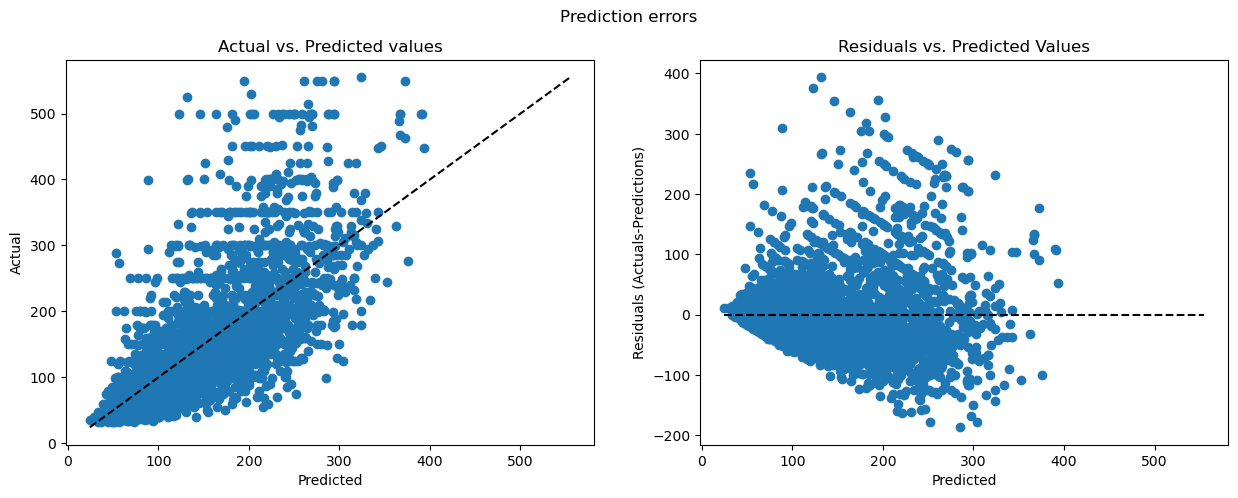

R²: 0.5648346043803275
MAE: 40.90479591232284
MSE: 3893.1037876720716
RMSE: 62.39474166684298
MAPE: 0.3169895341922205
error_ratio_rmse: 0.45112412163675525
error_ratio_mae: 0.29574832163274284


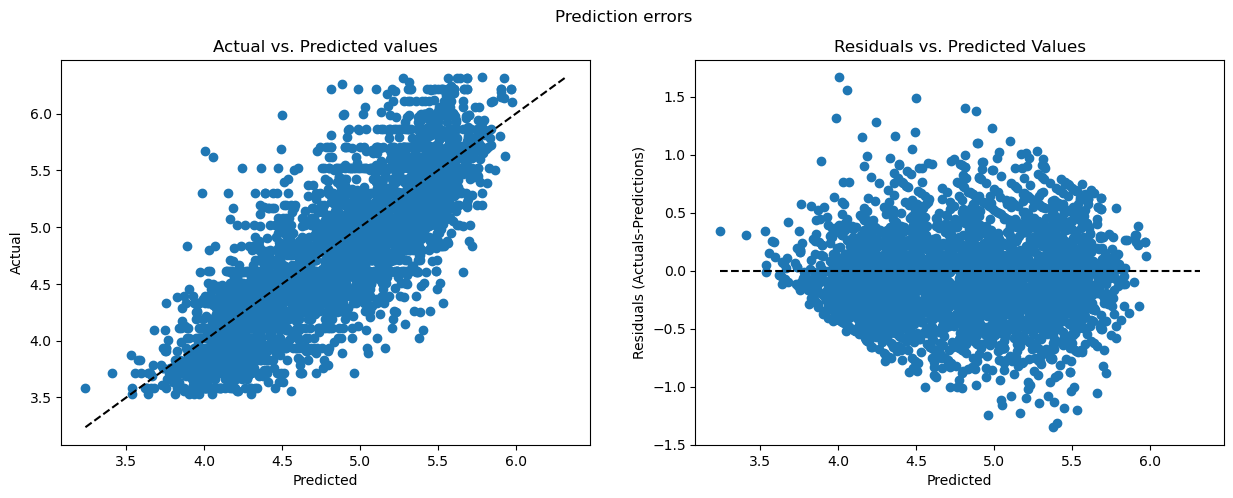

R²: 0.6546248319679526
MAE: 0.2854688686943232
MSE: 0.13422328195560718
RMSE: 0.36636495732480634
MAPE: 0.061311421658291516
error_ratio_rmse: 0.0773227364940038
error_ratio_mae: 0.0602493051531759


In [10]:
model_tuned = CatBoostRegressor(**best_hyperparams)

model_tuned.fit(X_train_np, y_train_np)

y_pred = np.maximum(0,model_tuned.predict(X_test_np))
model_tuned_score = scores(y_test_np,y_pred,plot=True)
model_tuned_logscore= scores(np.log(y_test_np+1),np.log(y_pred+1),plot= True)

# Save Model

In [11]:
catboost_params = model_tuned.get_params()

# Save the parameters as a JSON file
with open('saved_models/catboost_params.json', 'w') as f:
    json.dump(catboost_params, f)